# ML Models for HR Regression Problem

## Table of contents
---------------------------------------------
-  Import  Python Libraries 
-  Function Helper
-  Import Dataset & Data Description
-  Data Understanding
-  Select the Features
-  Data Pre-Processing
-  Exploratory Data Analysis
-  Data Transformation
-  Feature Engineering 
-  Feature Selection
-  Statistics Analysis
-  Data Splitting 
-  Machine Learning Models 
-  Machine Learning Optimization
-  Accuracy Score Summary 
-  Predication
-  Save The Machien Learning Models 

# Import Python Libraries 

In [1]:
import pandas as pd
import numpy as np 
np.iinfo(np.uint64).max

#   Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored 
import seaborn as sns  
from tabulate import tabulate

##      Importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

##      Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##      Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#   Feature Engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
le_orig = LabelEncoder()
ohe = OneHotEncoder()

#   Data Transformation 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer

#   Feature Selection
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest # Select features based on the k highest scores.
from sklearn.feature_selection import SelectPercentile # Select features based on percentile of the highest scores.
from sklearn.feature_selection import chi2 # Chi-squared stats of non-negative features for Regression tasks.
from sklearn.feature_selection import mutual_info_classif # Mutual information for a discrete target
from sklearn.feature_selection import f_classif # ANOVA F-value between label/feature for Regression tasks.

#   Data Splitting 
from sklearn.model_selection import train_test_split

#   sklearn Regressor Evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import accuracy_score # To get the accuracy score 

#   Supervised Machine Learning Models
##      Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

##      Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

##      Histogram-based Gradient Boosting Regression Tree
from sklearn.ensemble import HistGradientBoostingRegressor

##      AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

##      Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

##      K-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

##      Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##      Linear Regressor with stochastic gradient descent SGD training.
from sklearn.linear_model import SGDRegressor

##      XGBoost Regressor
from xgboost import XGBRegressor

##      Support Vector Machines Regressor
from sklearn.svm import SVR

##      Linear Support Vector Regression
from sklearn.svm import LinearSVR

##      Multilayer Perceptron Regressor
from sklearn.neural_network import MLPRegressor

#   Model Optmization
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Save and Load the Machine Learning Models 
import pickle

# Function Helper

In [2]:
'''
Read Dataset
'''
def CSV_File(path): 

    df_csv = pd.read_csv(path)

    return df_csv

'''
Drop Varibales
'''
def DropVariables(dfDrop, col):

    dfDrop = dfDrop.drop(col, axis=1)

    return dfDrop

'''
Convert Data Type
'''
def Convert_Data_Typt_to_str(Con_df_str, col):

    for colu in col :
        old_data_type = Con_df_str[colu].dtype
        Con_df_str[colu] = Con_df_str[colu].apply(str)
        print ('\nData Type for Variable:',[colu], ', Changed From',old_data_type, 'to',Con_df_str[colu].dtype)

    return Con_df_str

'''
Missong Value Information
'''
def missing_values(df_missing_value_per):

    missing_number = df_missing_value_per.isnull().sum().sort_values(ascending=False)
    missing_percent = (df_missing_value_per.isnull().sum()/df_missing_value_per.shape[0]).sort_values(ascending=False) 
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

    return missing_values[missing_values['Missing_Number']>=0]

def missing_values_info(df_missing_value):

    print(colored(f"Missing Values for Catuogirical Dataset:\n", attrs=['bold']), missing_values(df_missing_value),'\n',  
        colored('-'*79, 'red', attrs=['bold']), sep='')

def SelectRowsHavingMissing_Value(df_Missing_Rows):

    null_data = df_Missing_Rows[df_Missing_Rows.isnull().any(axis=1)]
    
    return null_data

'''
Split the Dataset Variables to Obj and Num
'''
def Data_Splitting_Num_Obj(df_split):

    Obj = df_split.select_dtypes(include = ['object'])
    Num = df_split.select_dtypes(include = np.number) 

    return Obj, Num

'''
Exploratory Data Analysis (EDA)
'''
def EDA_target(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):
            fig = px.histogram(df_EDA, x=target)
            fig.show()
            

def EDA_target2(df_EDA,target):

      if (df_EDA[target].dtype == 'float64' or df_EDA[target].dtype == 'int64'):

            df_EDA.boxplot(column=target, figsize=(30, 20))
            plt.show()

def obj_EDA(df_EDA, cols):

    for col in cols:
        table = pd.DataFrame(df_EDA[col].value_counts())
        print(tabulate(table, headers = 'keys', tablefmt = 'psql'))
        plt.figure(figsize = (30, 20))
        df_EDA[col].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
        plt.title(col)
        plt.show()

def EDA_obj(df_EDA, cols, Target):

    for col in cols:
        print('Variable Name: ', df_EDA[col].name)
        pd.crosstab(df_EDA[col], df_EDA[Target]).iplot(kind="bar")

def EDA_num(df_EDA, cols):

    for col in cols: 
        fig, ax = plt.subplots(figsize=(30, 20))
        df_EDA.hist(column=[col], ax=ax )

def EDA_num_2(df_EDA, cols):

    for col in cols: 
        df_EDA.boxplot(column=col, figsize=(30, 20))
        plt.show()
    
def EDA_num_with_DV(df_eda, NUMcols_eda, target): 

    for col in NUMcols_eda:
        sns.set_style('whitegrid')
        plt.figure(figsize=(20,10))
        sns.set_context('paper', font_scale=1.5)

        sns.histplot(x=col, data = df_eda, bins = 30, hue = target,palette="Blues", kde = True).set_title(col,fontsize=20)
        plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

'''
Data Transformation
'''
def NumStandardScaler(dataframe_series):

    for col in list(dataframe_series.columns):
        if (dataframe_series[col].dtype == 'float64' or dataframe_series[col].dtype == 'int64'): # and (col != target):
                print ('\nStandardization Applied On:', col)
                dataframe_series[col] = StandardScaler().fit_transform(dataframe_series[col].values.reshape(-1,1))

    return dataframe_series

'''
Feature Engineering 
'''
def AllObjLabelEncoder(dataframe_series):

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le_orig = preprocessing.LabelEncoder()

    df_old = dataframe_series.copy(deep = False)

    if dataframe_series.dtype=='object':
        col = dataframe_series.name

        dataframe_series = le.fit_transform(dataframe_series)
        print('\nLable Encoding Applied On:', col)

        le.fit(dataframe_series)
        print('New Value for',col,' Variable:', le.classes_)

        le_orig.fit(df_old)
        print('Old Value for',col,'Variable:', le_orig.classes_)

    return dataframe_series

'''
Feature Selection
'''
def Feature_selection_forward(df_forward, target):

    # Split the df into Obj and Num
    obj, num = Data_Splitting_Num_Obj(df_forward)

    list_df_num = list(num.columns)
    if target not in list_df_num: 
        list_df_num.append(target)
    print('All the Num Variables:',list_df_num)

    list_df_Obj = list(obj.columns)
    print('\nAll the obj Variables:',list_df_Obj)

    # Create New DataFrame Hvae only the Num Variables
    df_num = df_forward[list_df_num]

    # define dataset
    X = df_num.drop(target, axis=1)
    y = df_num[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    forward_FS = SequentialFeatureSelector(RandomForestRegressor(n_jobs= -1, ), # How many course you want to use. '-1 mwans all the course'
                                                                k_features= (1, X.shape[1]),
                                                                forward=True,
                                                                floating=False,
                                                                scoring = 'neg_mean_squared_error', # mean_squared_error, neg_mean_squared_error
                                                                verbose=2,
                                                                cv= 5
                ).fit(X_train, y_train)

    new_list_num = list(forward_FS.k_feature_names_)

    print ('\nMost Variables Can Effect The Target Variables: ',new_list_num)
    print ('\nWith Highest Score: ',forward_FS.k_score_)

    
    if target not in new_list_num: 
        new_list_num.append(target)
    print('\nAll the Variables Selected: ',new_list_num)

    new_df_list = new_list_num + list_df_Obj
    df_forward = df_forward[new_df_list]

    forward_FS = pd.DataFrame(forward_FS.get_metric_dict()).T

    return df_forward, forward_FS

def Save_ML(ML_Name, _ml):

    i = 0 

    for ML in ML_Name:

        with open(ML, "wb") as file:
            
            print(f'Create file name {ML}')

            pickle.dump(_ml[i], file)
            print('Model:', _ml[i], 'Saved\n')

        i += 1  

# Import Dataset & Data Description

## Import Dataset

In [3]:
Path = '/content/HRDataset_v14.csv'
file_type = 'C'

if file_type == 'C':
    df = CSV_File(Path)

In [4]:
pd.DataFrame(df.head(10))

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.000,LinkedIn,Exceeds,4.600,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.000,Indeed,Fully Meets,4.960,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.000,LinkedIn,Fully Meets,3.020,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.000,Indeed,Fully Meets,4.840,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.000,Google Search,Fully Meets,5.000,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.000,LinkedIn,Exceeds,5.000,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.000,LinkedIn,Fully Meets,3.040,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.000,Employee Referral,Fully Meets,5.000,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.000,Diversity Job Fair,Fully Meets,4.460,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.000,Indeed,Fully Meets,5.000,5,6,2/18/2019,0,16


## Data Description

# Data Understanding

In [5]:
print(df.info(), '\n', 
            colored('-'*79, 'red', attrs=['bold']), sep='')
missing_values_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
NUMcols = df.select_dtypes(np.number).columns
Objcols = df.select_dtypes(include = ['object']).columns

In [7]:
if len(NUMcols) != 0 :
    su_stat = pd.DataFrame(df.describe().T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+------------------------+---------+---------------+--------------+----------+----------+----------+---------+--------+
|                        |   count |          mean |          std |      min |      25% |      50% |     75% |    max |
|------------------------+---------+---------------+--------------+----------+----------+----------+---------+--------|
| EmpID                  |     311 | 10156         |    89.9222   | 10001    | 10078.5  | 10156    | 10233.5 |  10311 |
| MarriedID              |     311 |     0.398714  |     0.490423 |     0    |     0    |     0    |     1   |      1 |
| MaritalStatusID        |     311 |     0.810289  |     0.943239 |     0    |     0    |     1    |     1   |      4 |
| GenderID               |     311 |     0.434084  |     0.496435 |     0    |     0    |     0    |     1   |      1 |
| EmpStatusID            |     311 |     2.39228   |     1.79438  |     1    |     1    |     1    |     5   |      5 |
| DeptID                 |     311 |    

In [8]:
if len(Objcols) != 0 :
    su_stat = pd.DataFrame(df.describe(include=object).T)
    print(tabulate(su_stat, headers = 'keys', tablefmt = 'psql'))

+----------------------------+---------+----------+-------------------------+--------+
|                            |   count |   unique | top                     |   freq |
|----------------------------+---------+----------+-------------------------+--------|
| Employee_Name              |     311 |      311 | Adinolfi, Wilson  K     |      1 |
| Position                   |     311 |       32 | Production Technician I |    137 |
| State                      |     311 |       28 | MA                      |    276 |
| DOB                        |     311 |      307 | 09/09/65                |      2 |
| Sex                        |     311 |        2 | F                       |    176 |
| MaritalDesc                |     311 |        5 | Single                  |    137 |
| CitizenDesc                |     311 |        3 | US Citizen              |    295 |
| HispanicLatino             |     311 |        4 | No                      |    282 |
| RaceDesc                   |     311 |   

In [9]:
pd.DataFrame(df.var())

,0
EmpID,8086.000
MarriedID,0.241
MaritalStatusID,0.890
GenderID,0.246
EmpStatusID,3.220
DeptID,1.174
PerfScoreID,0.345
FromDiversityJobFairID,0.085
Salary,632856381.610
Termd,0.223


# Select the Features

In [10]:
'''
                1)        Target Varibale
'''
target = 'Salary'

'''
                2)        Drop Varibales 
'''
drop = 'Enable' # The Variable Need to Drop
col_drop = [ 
        
            'Employee_Name', 'EmpID', 'PositionID', 'Zip', 'DOB', 'DateofHire', 
            'DateofTermination', 'ManagerName', 'ManagerID', 'LastPerformanceReview_Date',
            
            'MarriedID', 'MaritalStatusID', 

        ]

'''
                3)        Convert Data Type 
'''
# to convert variable type to str
convert_to_str = 'Enable' 
col_convert_str = [  
                    
                    'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 
                    'FromDiversityJobFairID', 'Termd', 'EmpSatisfaction', 
                    'SpecialProjectsCount', 'DaysLateLast30', 'Absences'
                ]

'''
                7)        Data Transformation
'''
DT = 'StandardScaler' 


'''
                8)        Featuers Selection And Featuers Engineering
'''
# Featuers
FE = 'LableEncodeing'
FS = 'Forward'

'''
                10)        Data Splitting
'''
# Randomly
Random = 'Enable'
Split_size = 0.2 # Testing Size
Randon_state_size = 42
'''
                11)        Machine Learning Models 
'''
ML_ST = 'Enable'

'''  
                12)        Machine Learning Optimization 
'''
ML_OP = 'Enable'

# Data Pre-Processing

## Drop Varibales 

In [11]:
if drop == 'Enable': 
    df = DropVariables(df, col_drop)
    print(col_drop,'Droped\n')

print(tabulate(df.info(), headers = 'keys', tablefmt = 'psql'))

['Employee_Name', 'EmpID', 'PositionID', 'Zip', 'DOB', 'DateofHire', 'DateofTermination', 'ManagerName', 'ManagerID', 'LastPerformanceReview_Date', 'MarriedID', 'MaritalStatusID'] Droped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GenderID                311 non-null    int64  
 1   EmpStatusID             311 non-null    int64  
 2   DeptID                  311 non-null    int64  
 3   PerfScoreID             311 non-null    int64  
 4   FromDiversityJobFairID  311 non-null    int64  
 5   Salary                  311 non-null    int64  
 6   Termd                   311 non-null    int64  
 7   Position                311 non-null    object 
 8   State                   311 non-null    object 
 9   Sex                     311 non-null    object 
 10  MaritalDesc             311 non-null    object 
 11  CitizenDesc  

## Convert Data Type

In [12]:
if convert_to_str == 'Enable': 
    df = Convert_Data_Typt_to_str(df,col_convert_str)


Data Type for Variable: ['GenderID'] , Changed From int64 to object

Data Type for Variable: ['EmpStatusID'] , Changed From int64 to object

Data Type for Variable: ['DeptID'] , Changed From int64 to object

Data Type for Variable: ['PerfScoreID'] , Changed From int64 to object

Data Type for Variable: ['FromDiversityJobFairID'] , Changed From int64 to object

Data Type for Variable: ['Termd'] , Changed From int64 to object

Data Type for Variable: ['EmpSatisfaction'] , Changed From int64 to object

Data Type for Variable: ['SpecialProjectsCount'] , Changed From int64 to object

Data Type for Variable: ['DaysLateLast30'] , Changed From int64 to object

Data Type for Variable: ['Absences'] , Changed From int64 to object


# Exploratory Data Analysis (EDA)

In [13]:
NUMcols = df.select_dtypes(np.number).columns
NUMcols = NUMcols.drop(target)

Objcols = df.select_dtypes(include = ['object']).columns

## Dependent Variables

In [14]:
EDA_target(df, target)

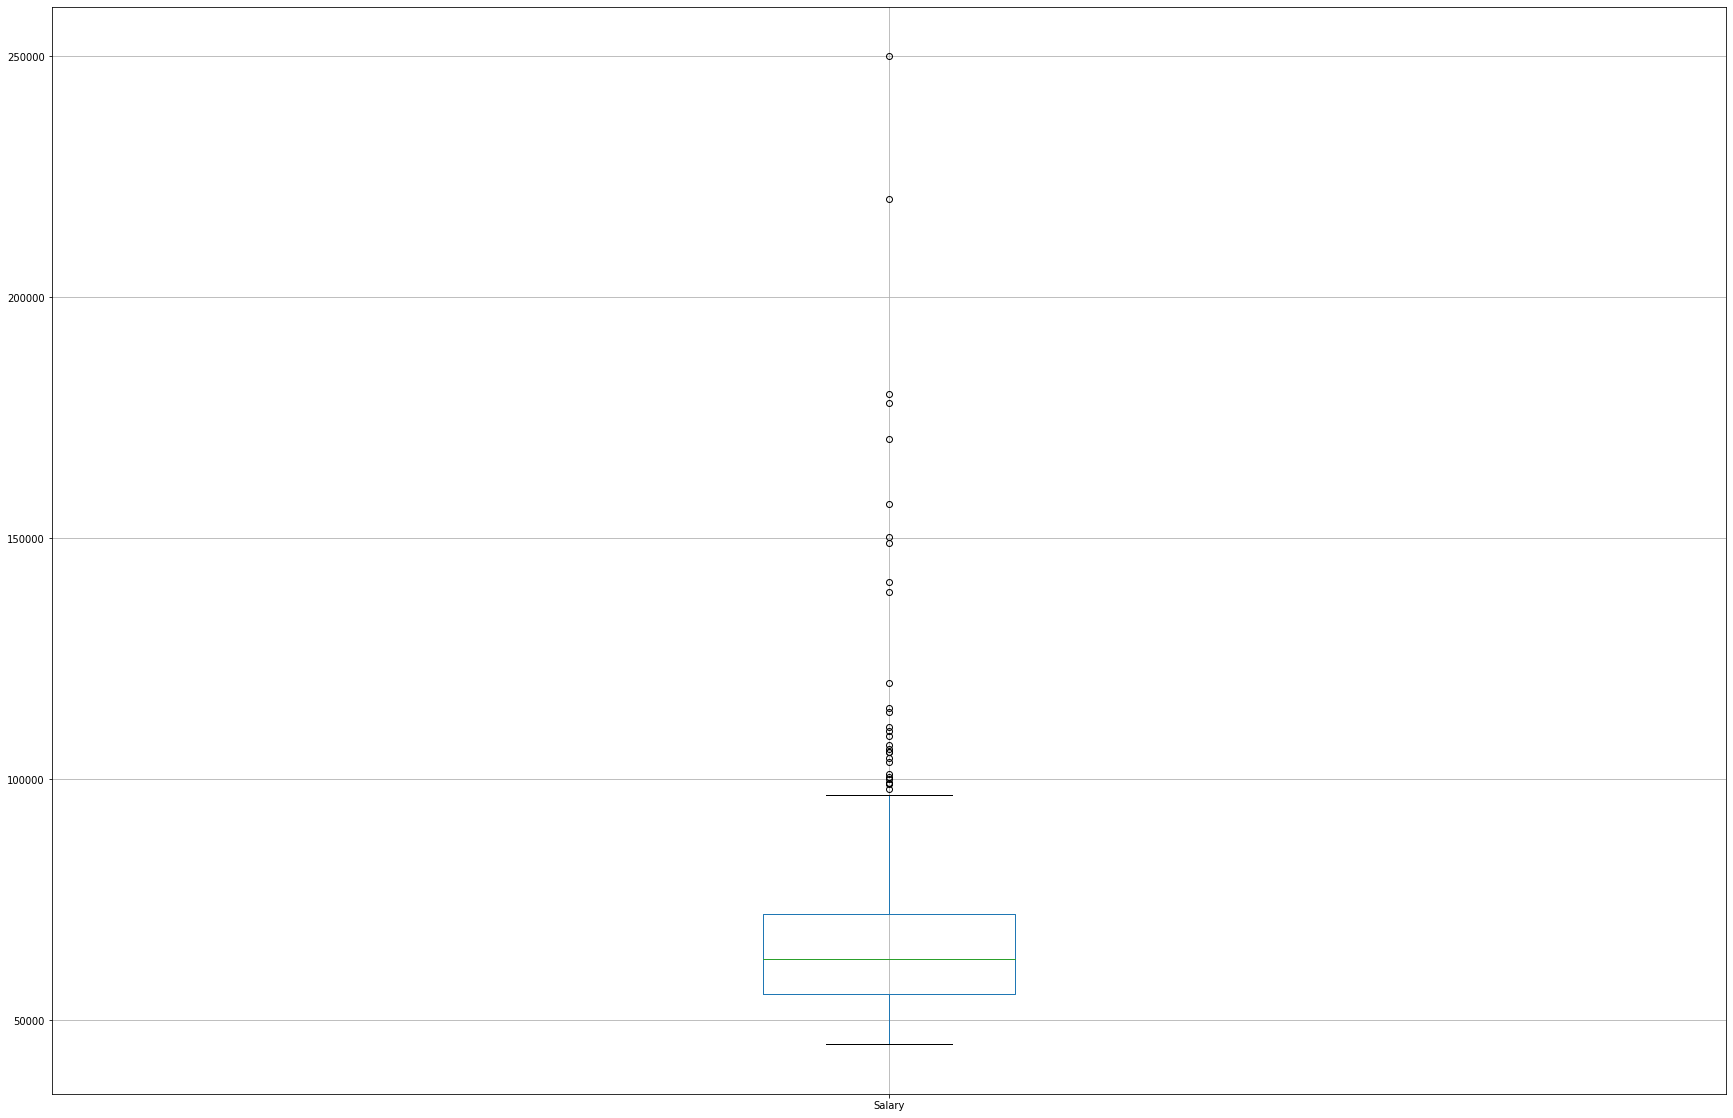

In [15]:
EDA_target2(df, target)

## Independent Dependent Variables

### Independent Dependent Variables (Object Variables) 

+----+------------+
|    |   GenderID |
|----+------------|
|  0 |        176 |
|  1 |        135 |
+----+------------+


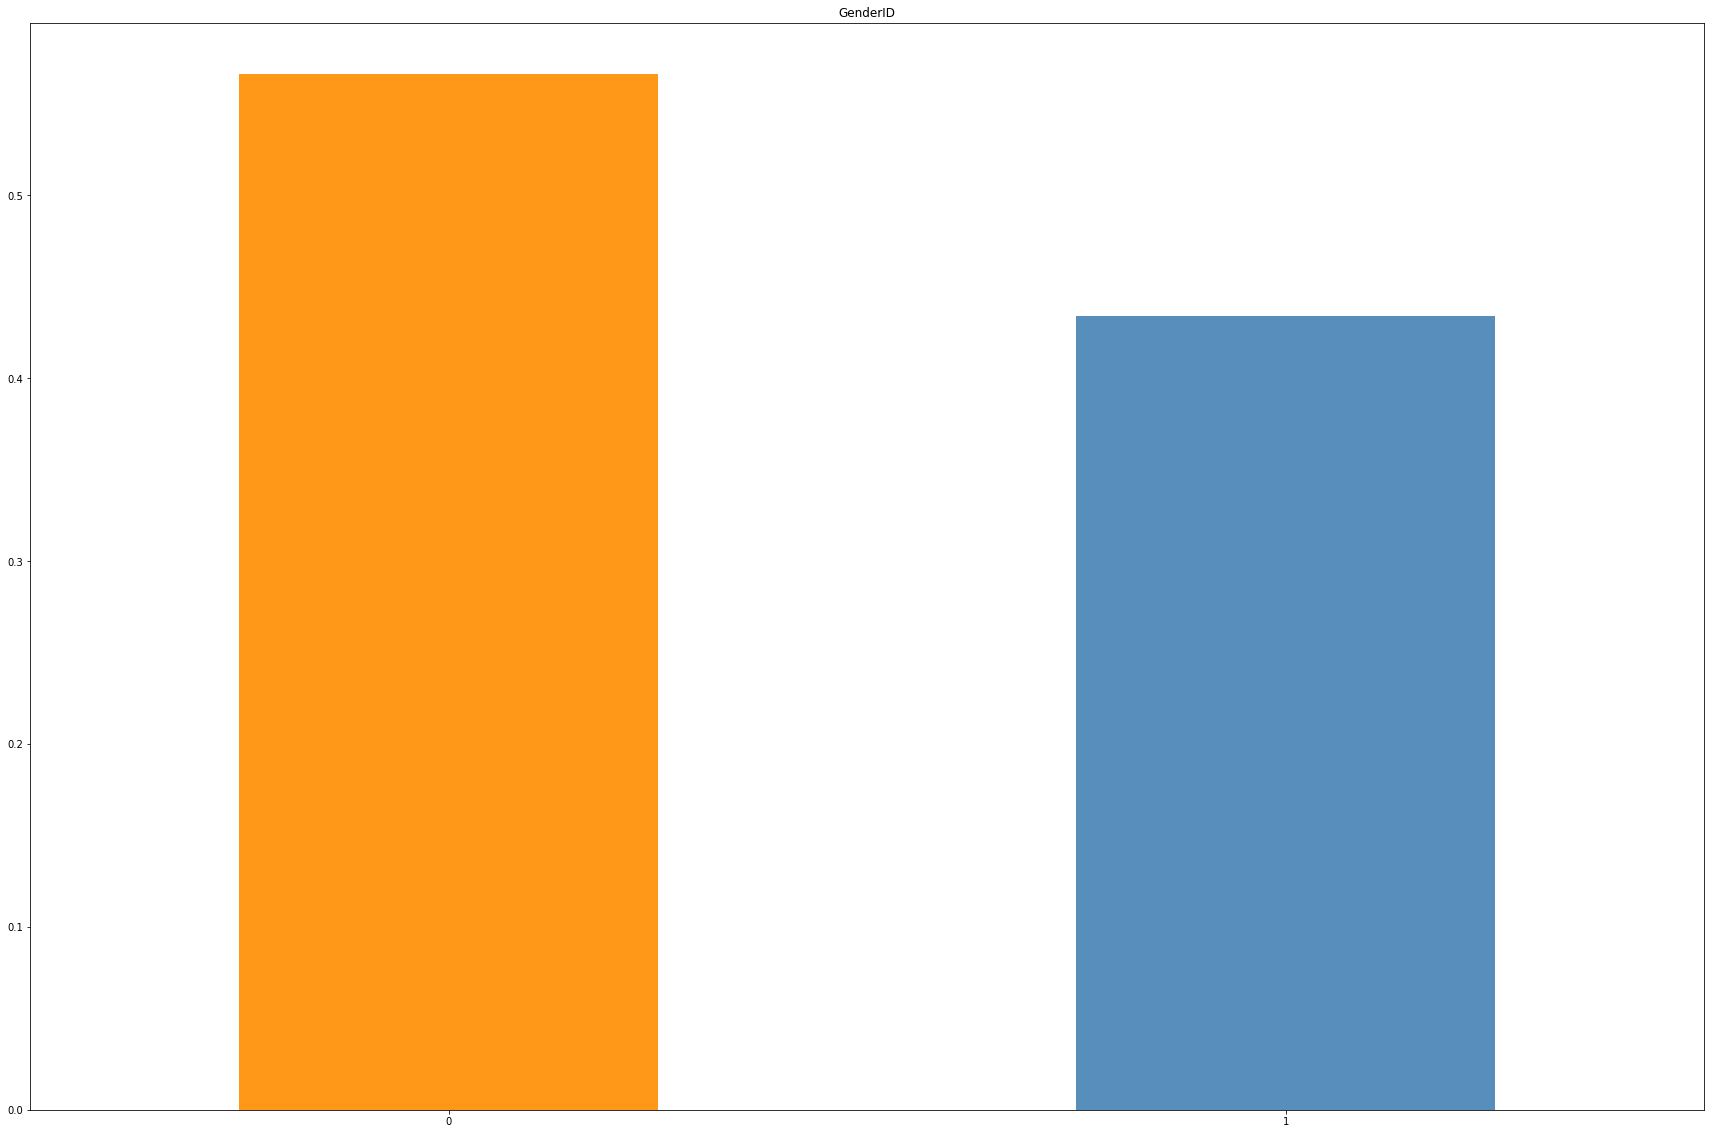

+----+---------------+
|    |   EmpStatusID |
|----+---------------|
|  1 |           184 |
|  5 |            88 |
|  3 |            14 |
|  4 |            14 |
|  2 |            11 |
+----+---------------+


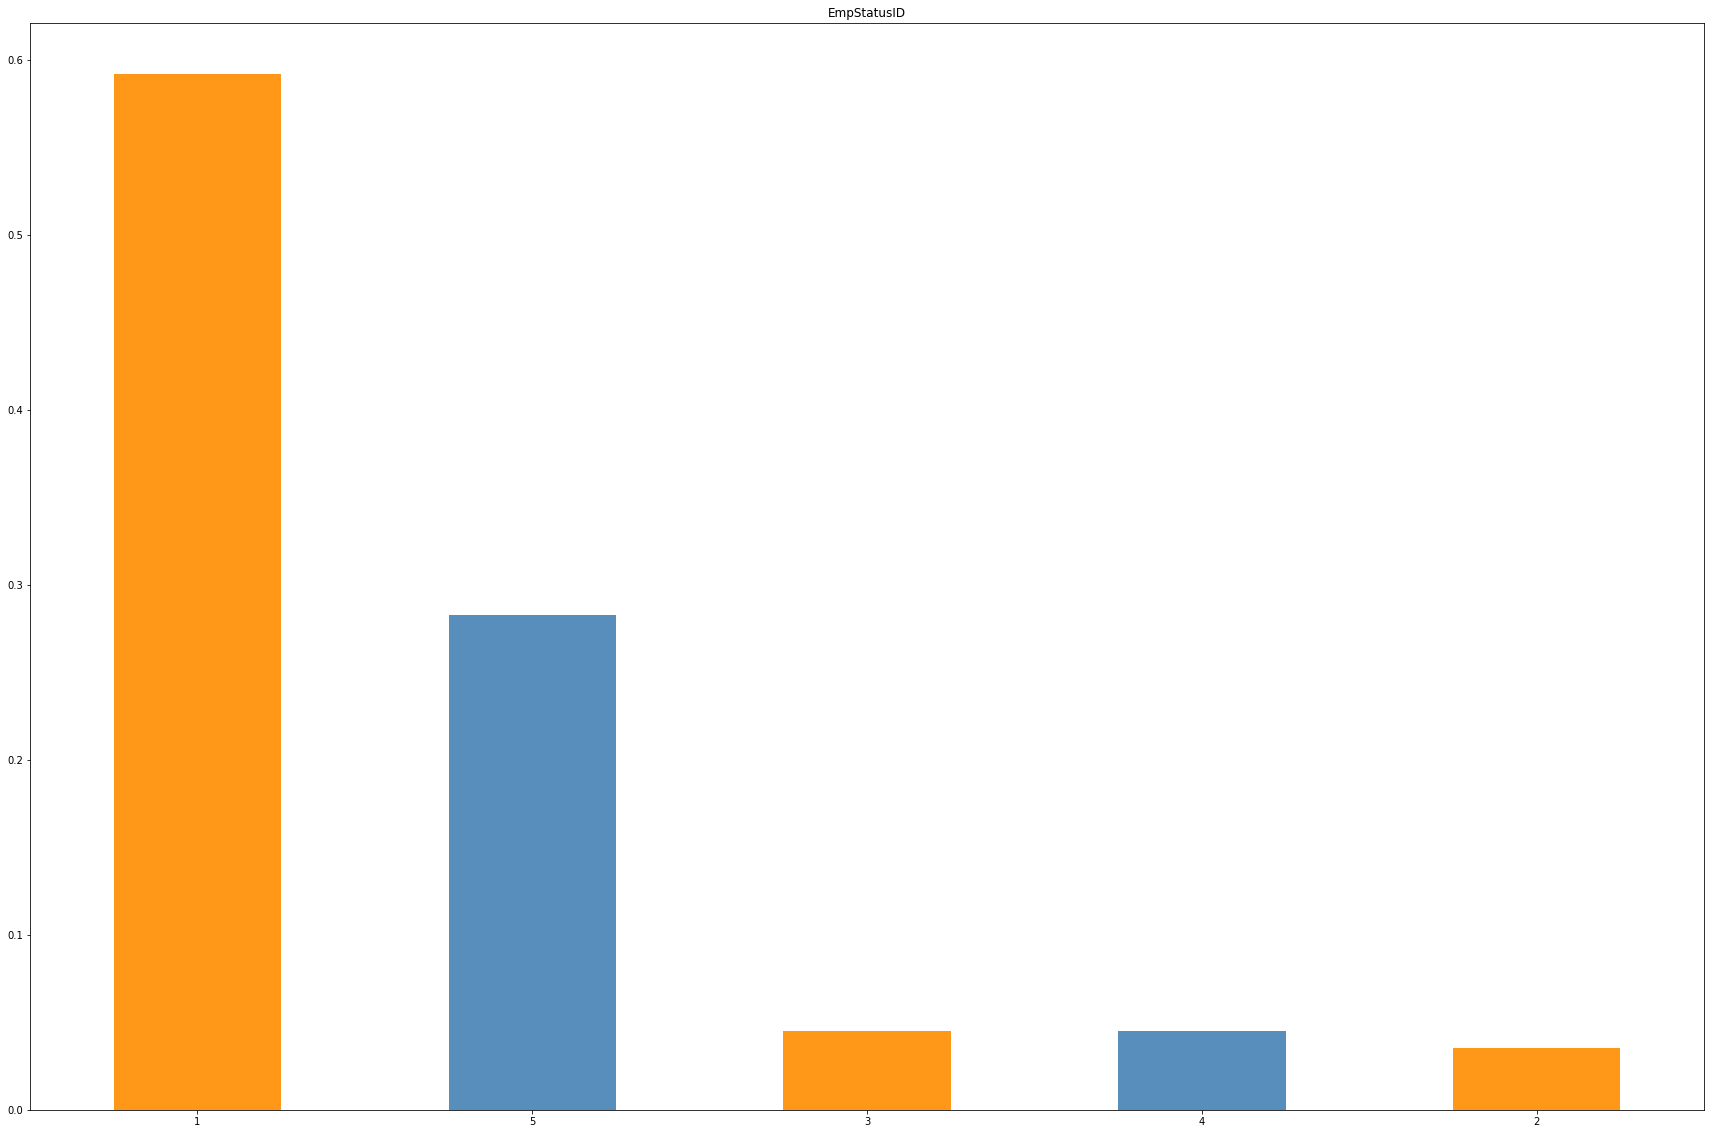

+----+----------+
|    |   DeptID |
|----+----------|
|  5 |      208 |
|  3 |       50 |
|  6 |       32 |
|  4 |       10 |
|  1 |       10 |
|  2 |        1 |
+----+----------+


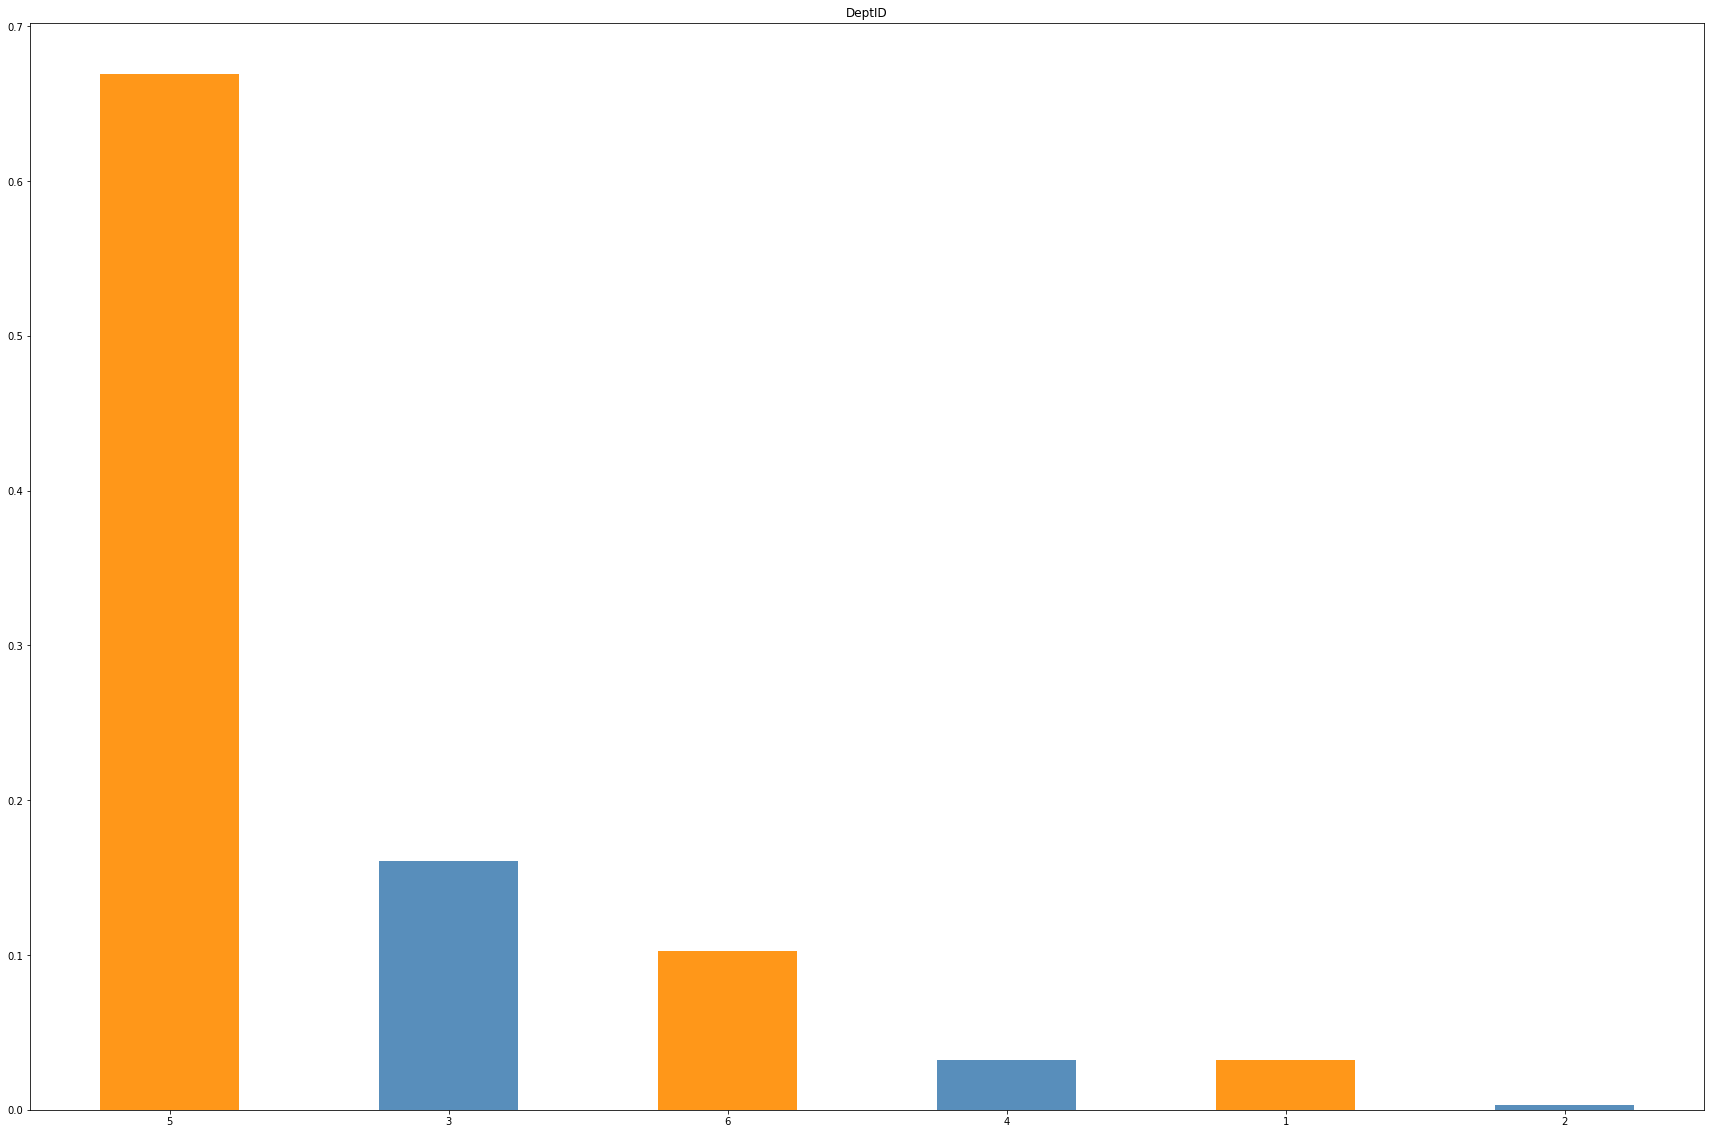

+----+---------------+
|    |   PerfScoreID |
|----+---------------|
|  3 |           243 |
|  4 |            37 |
|  2 |            18 |
|  1 |            13 |
+----+---------------+


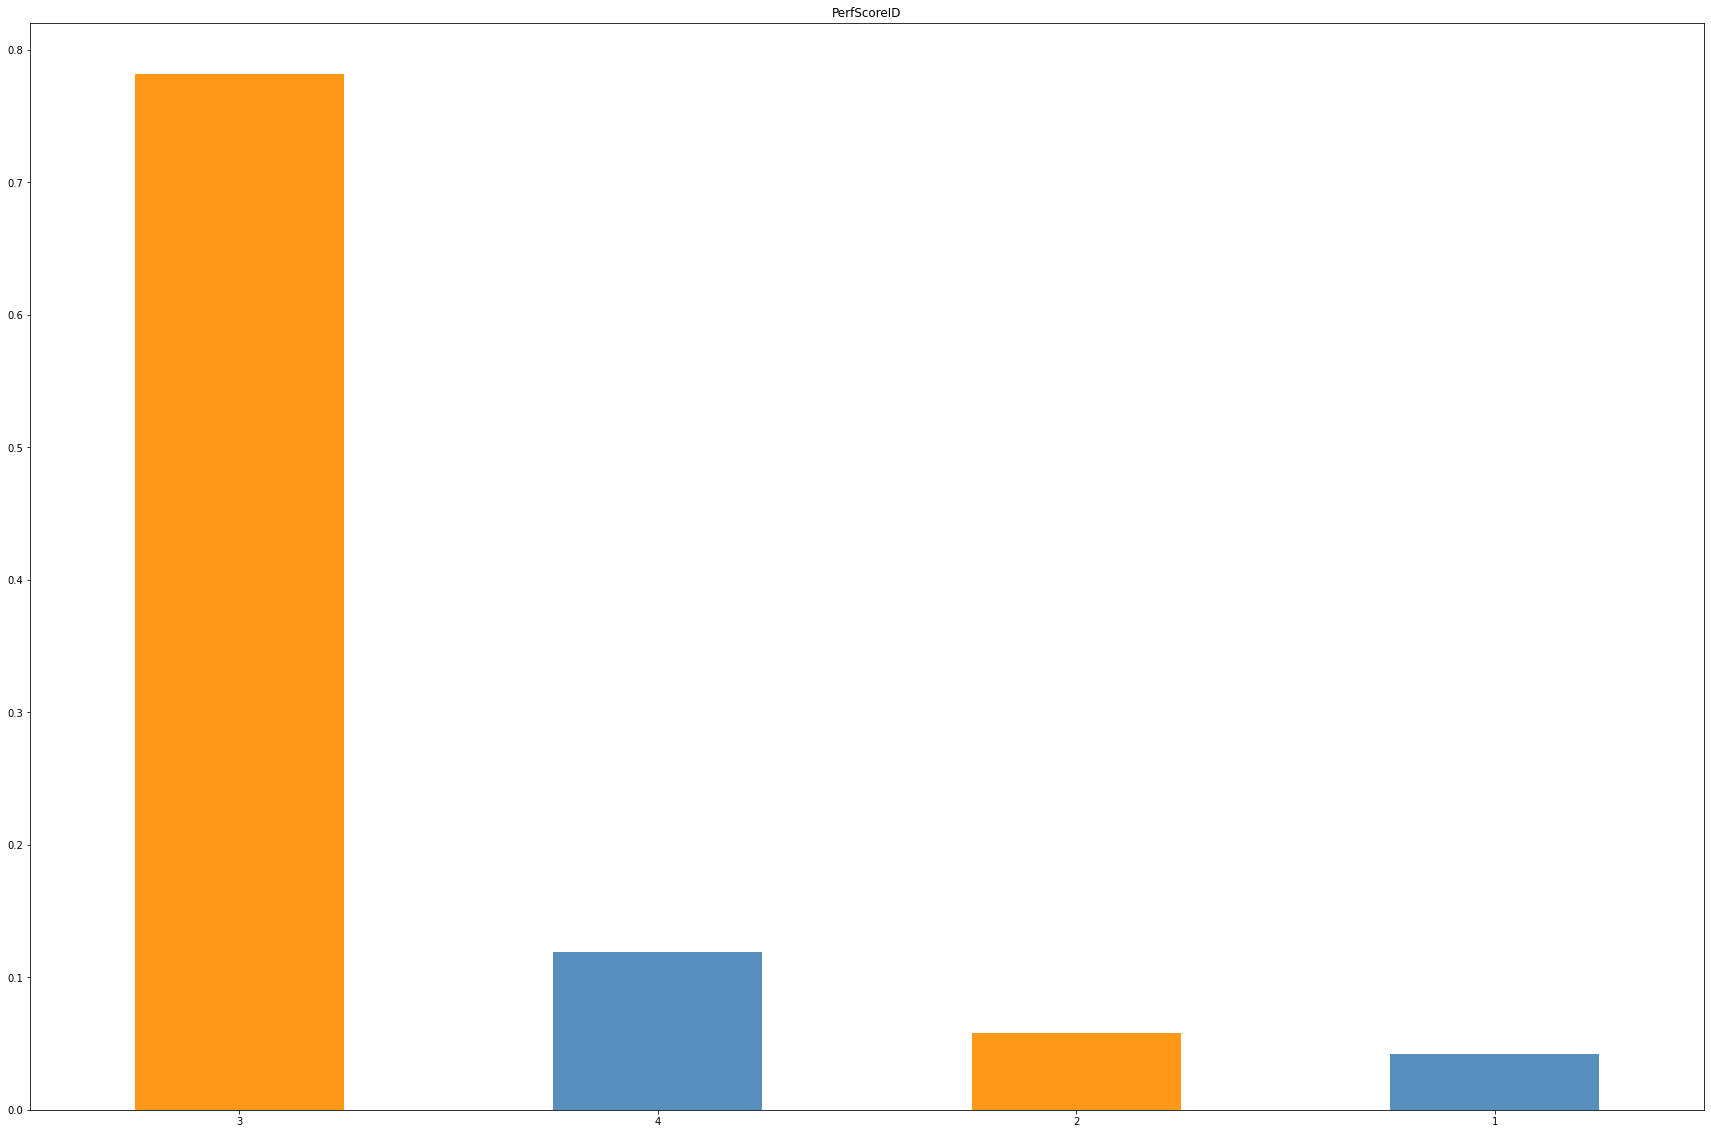

+----+--------------------------+
|    |   FromDiversityJobFairID |
|----+--------------------------|
|  0 |                      282 |
|  1 |                       29 |
+----+--------------------------+


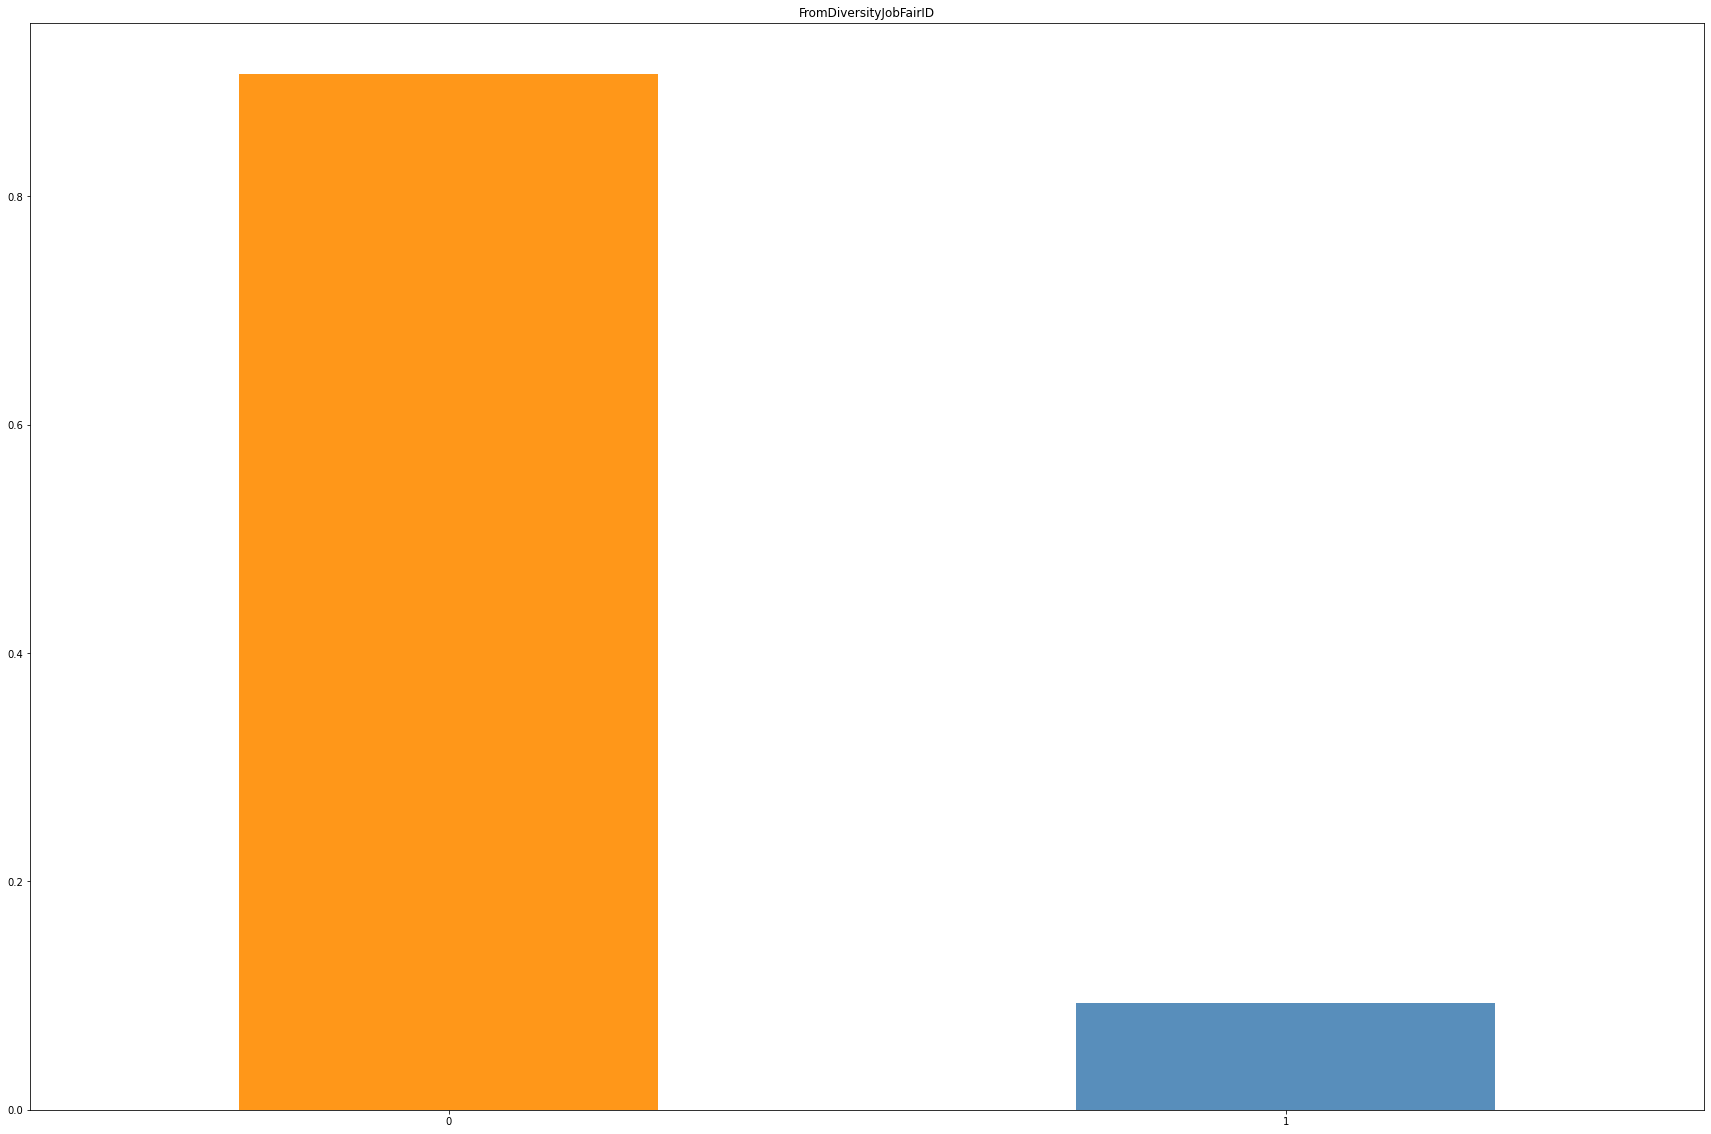

+----+---------+
|    |   Termd |
|----+---------|
|  0 |     207 |
|  1 |     104 |
+----+---------+


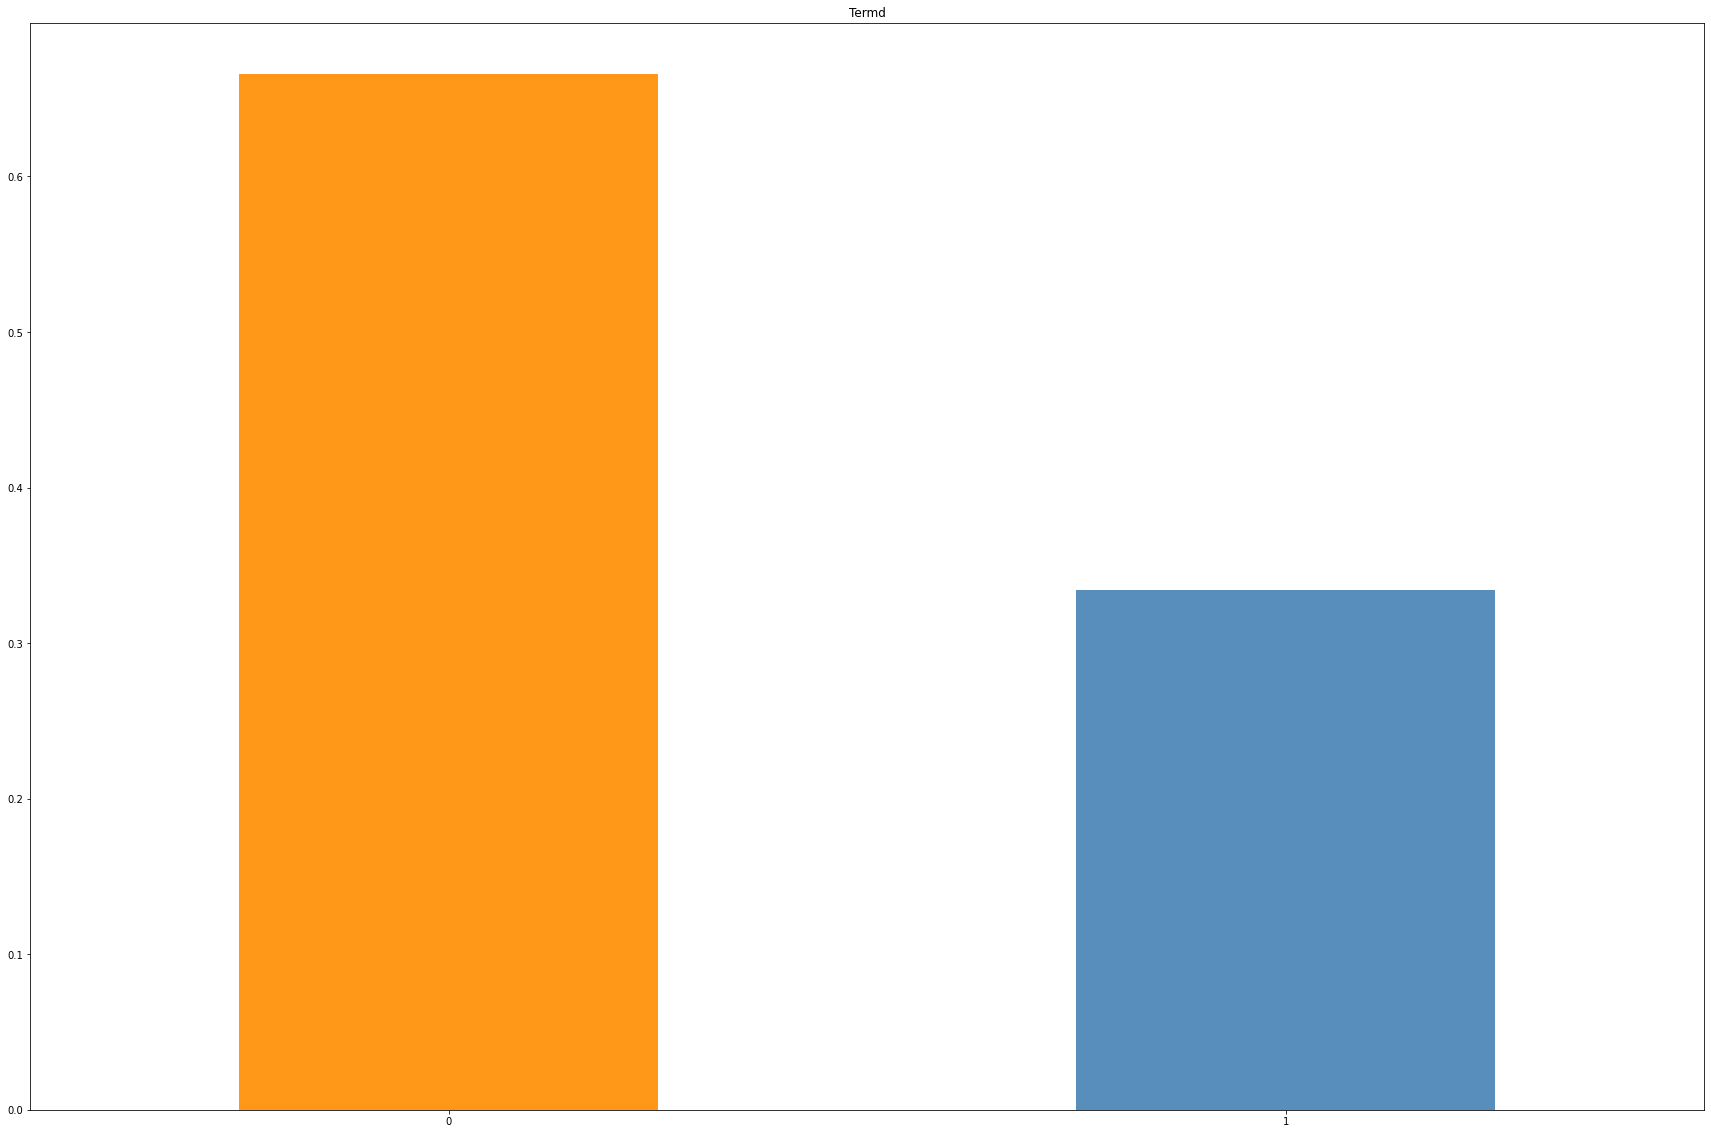

+------------------------------+------------+
|                              |   Position |
|------------------------------+------------|
| Production Technician I      |        137 |
| Production Technician II     |         57 |
| Area Sales Manager           |         27 |
| Production Manager           |         14 |
| Software Engineer            |         10 |
| IT Support                   |          8 |
| Data Analyst                 |          7 |
| Sr. Network Engineer         |          5 |
| Database Administrator       |          5 |
| Network Engineer             |          5 |
| BI Developer                 |          4 |
| Senior BI Developer          |          3 |
| Administrative Assistant     |          3 |
| Sales Manager                |          3 |
| Accountant I                 |          3 |
| Sr. DBA                      |          2 |
| IT Manager - DB              |          2 |
| Sr. Accountant               |          2 |
| Director of Operations       |  

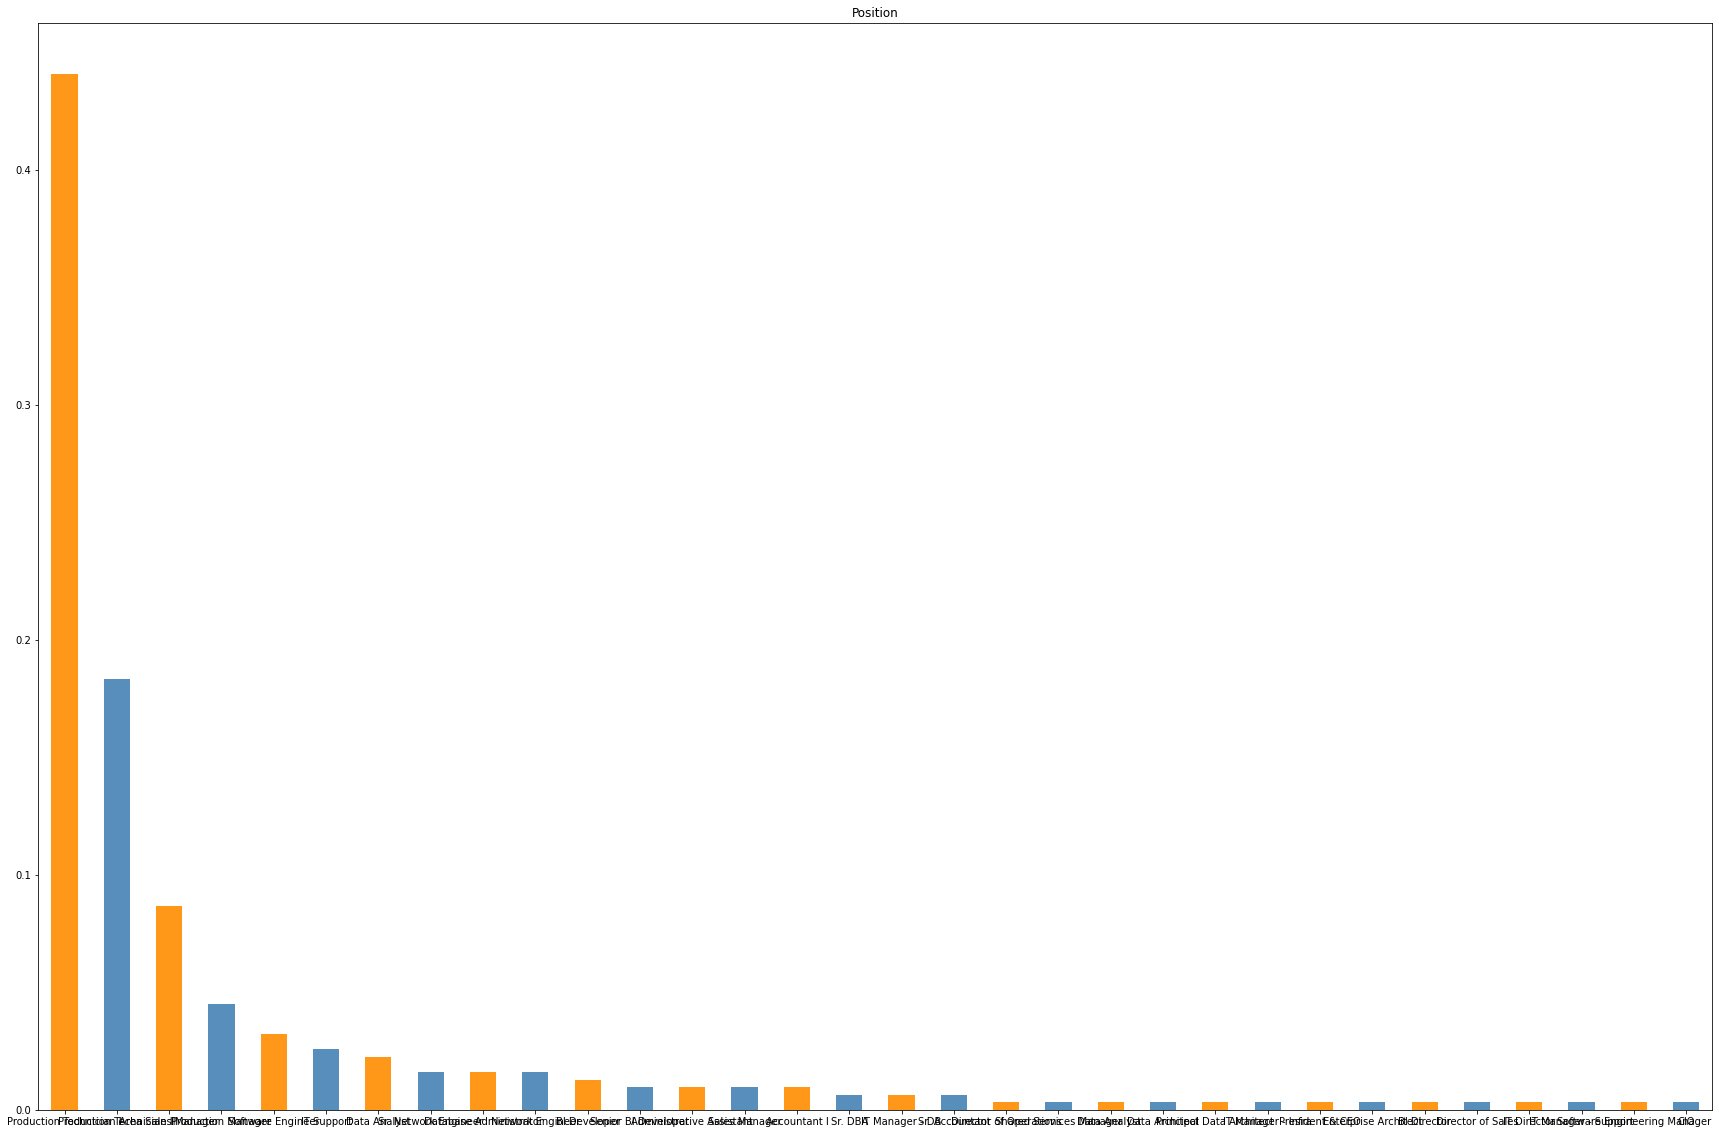

+----+---------+
|    |   State |
|----+---------|
| MA |     276 |
| CT |       6 |
| TX |       3 |
| VT |       2 |
| UT |       1 |
| AZ |       1 |
| ND |       1 |
| OR |       1 |
| MT |       1 |
| NV |       1 |
| ID |       1 |
| KY |       1 |
| NC |       1 |
| FL |       1 |
| GA |       1 |
| CO |       1 |
| NY |       1 |
| PA |       1 |
| RI |       1 |
| NH |       1 |
| TN |       1 |
| IN |       1 |
| OH |       1 |
| CA |       1 |
| WA |       1 |
| AL |       1 |
| VA |       1 |
| ME |       1 |
+----+---------+


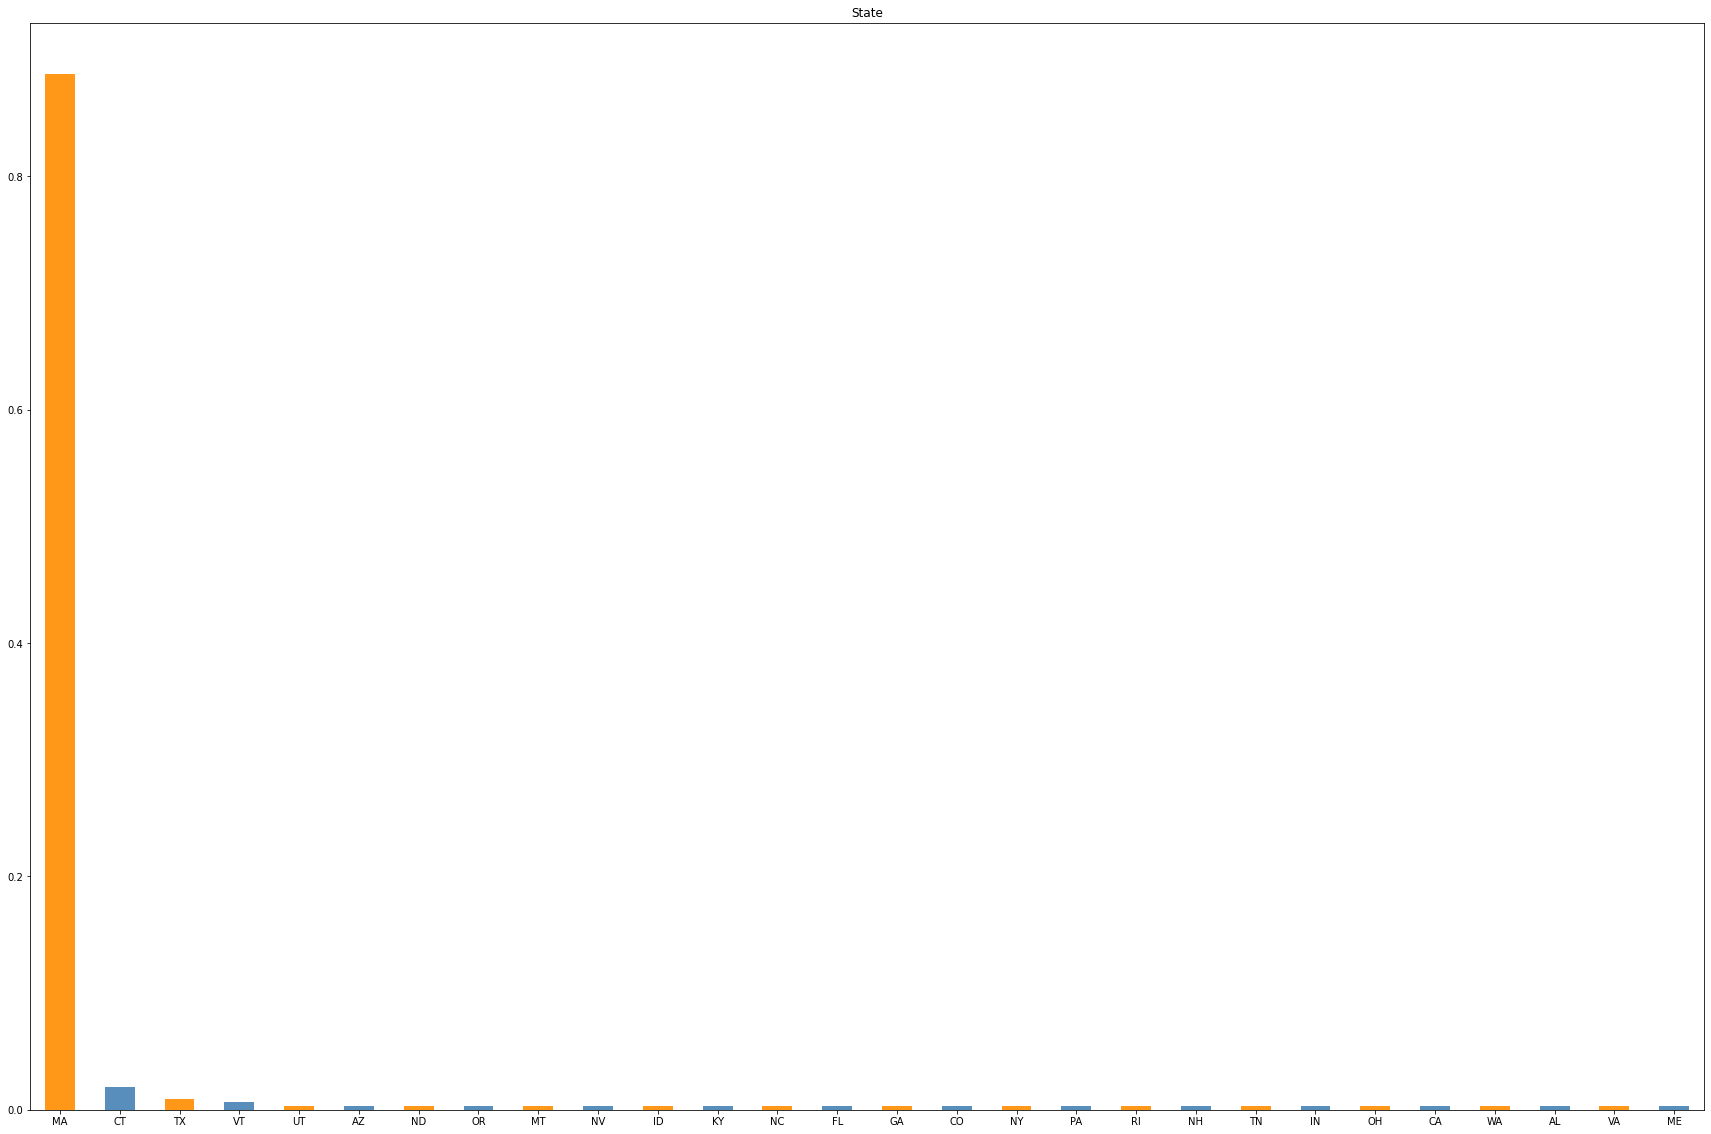

+----+-------+
|    |   Sex |
|----+-------|
| F  |   176 |
| M  |   135 |
+----+-------+


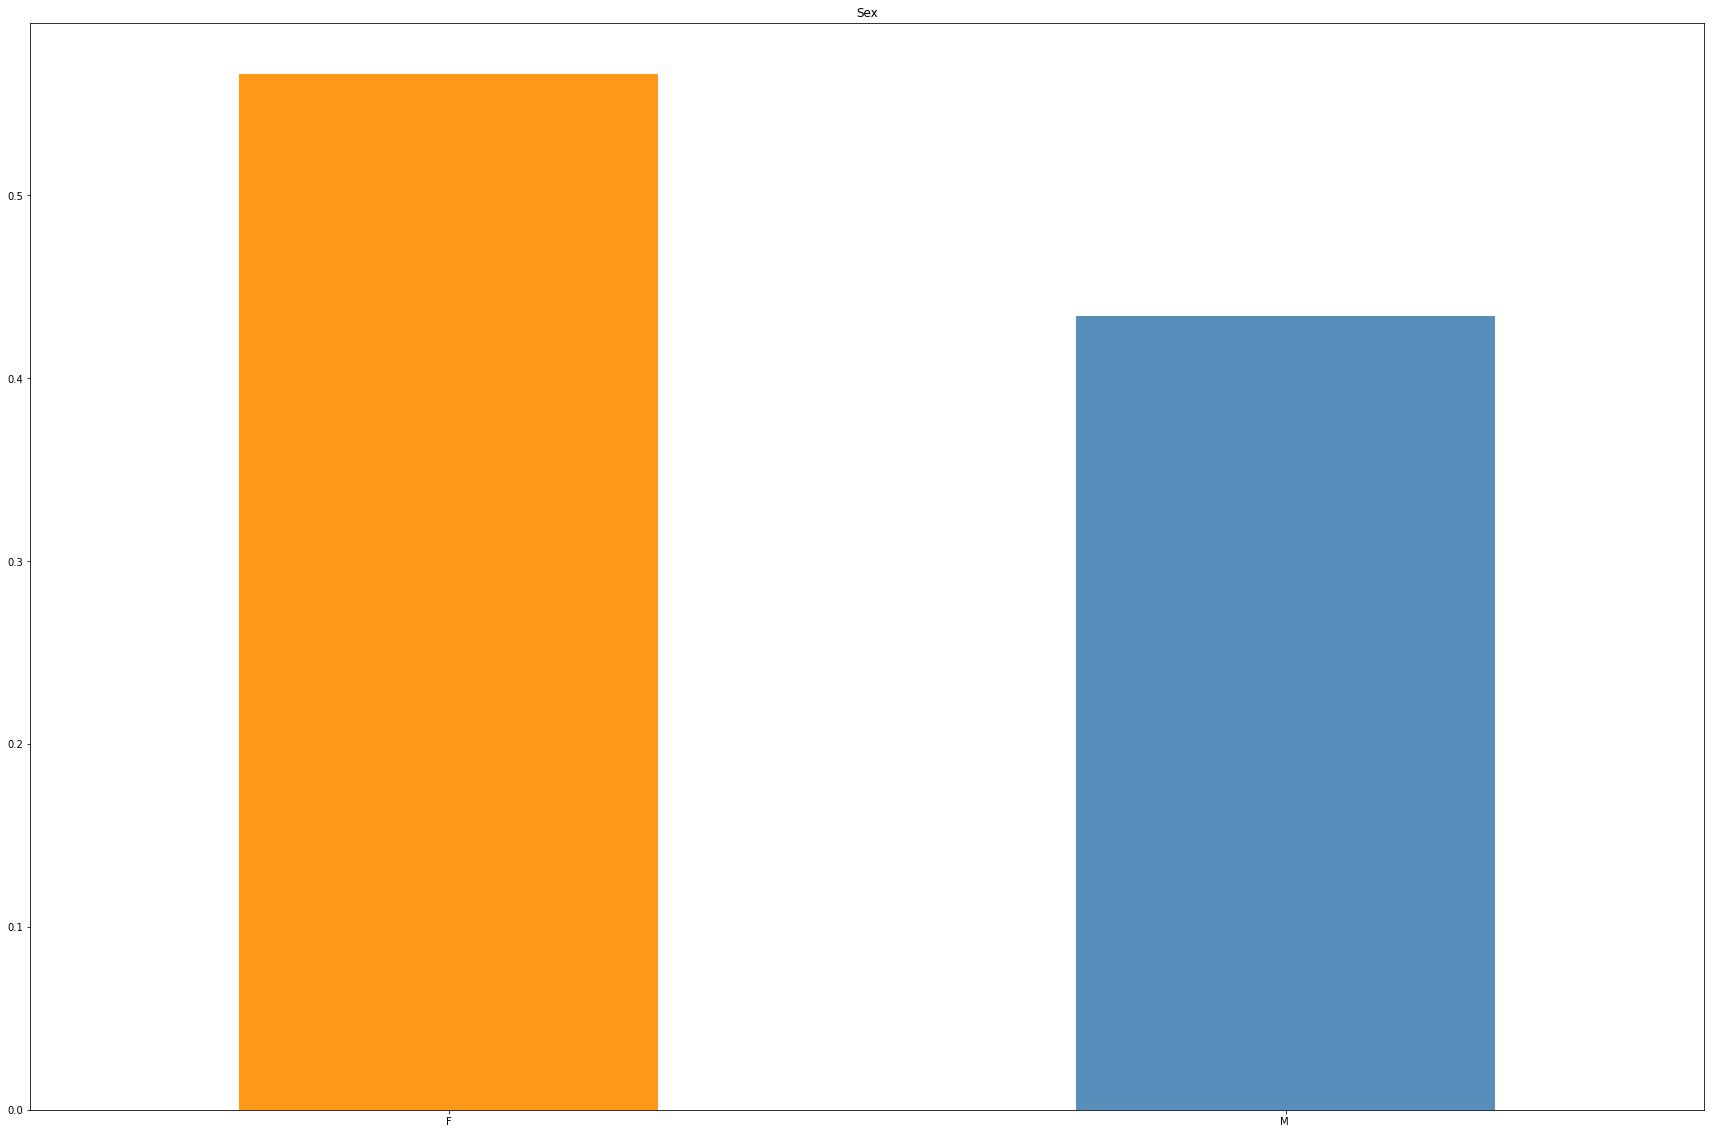

+-----------+---------------+
|           |   MaritalDesc |
|-----------+---------------|
| Single    |           137 |
| Married   |           124 |
| Divorced  |            30 |
| Separated |            12 |
| Widowed   |             8 |
+-----------+---------------+


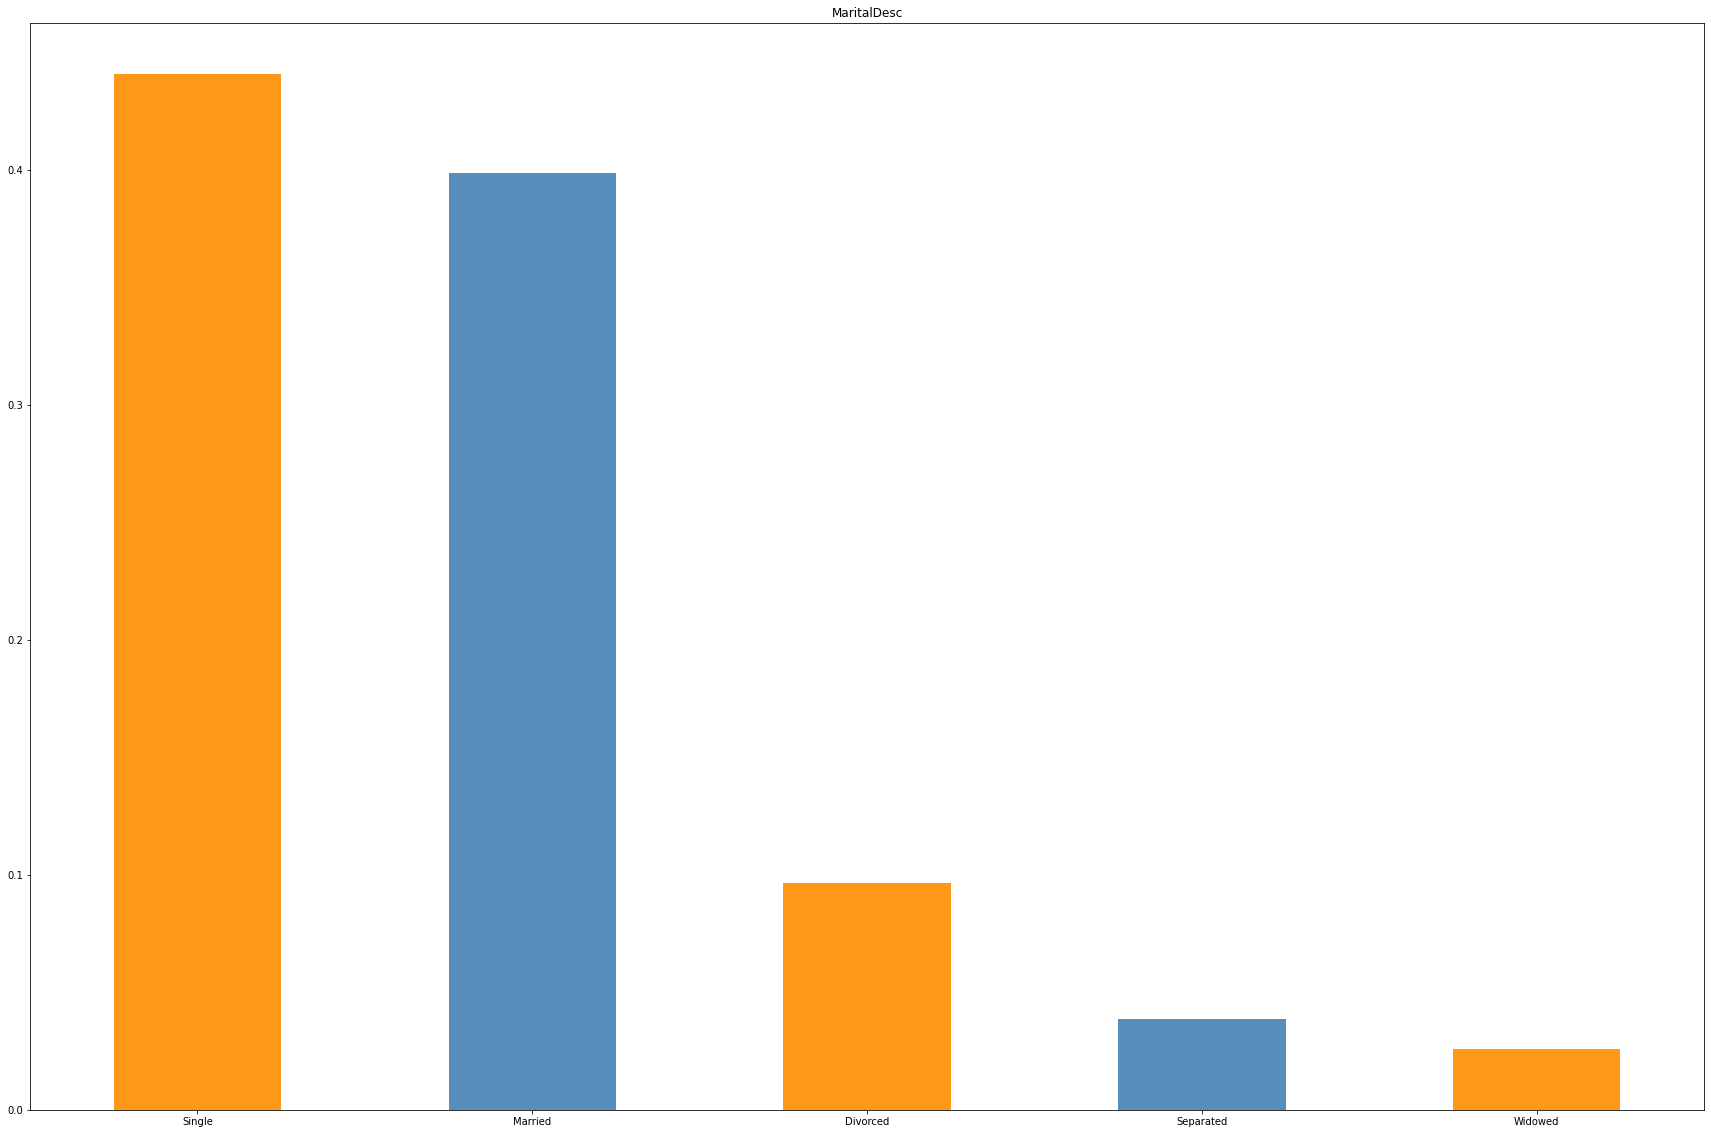

+---------------------+---------------+
|                     |   CitizenDesc |
|---------------------+---------------|
| US Citizen          |           295 |
| Eligible NonCitizen |            12 |
| Non-Citizen         |             4 |
+---------------------+---------------+


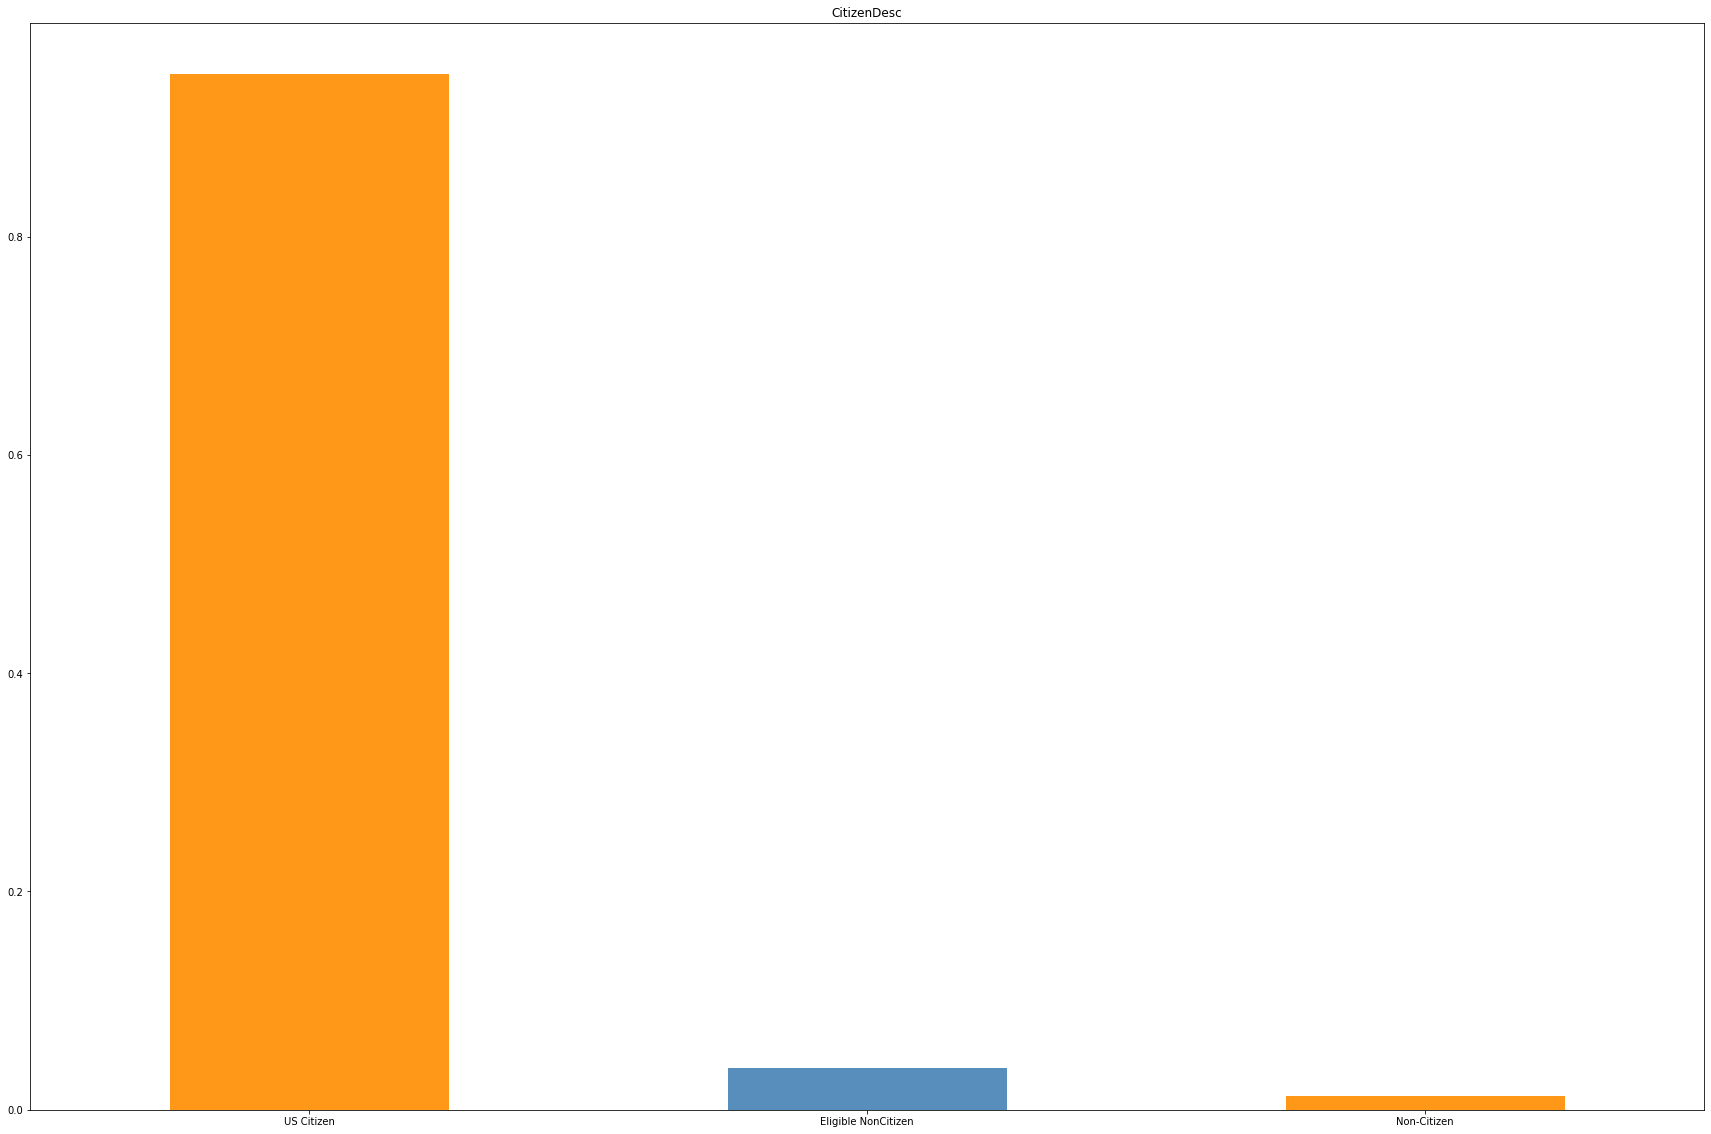

+-----+------------------+
|     |   HispanicLatino |
|-----+------------------|
| No  |              282 |
| Yes |               27 |
| no  |                1 |
| yes |                1 |
+-----+------------------+


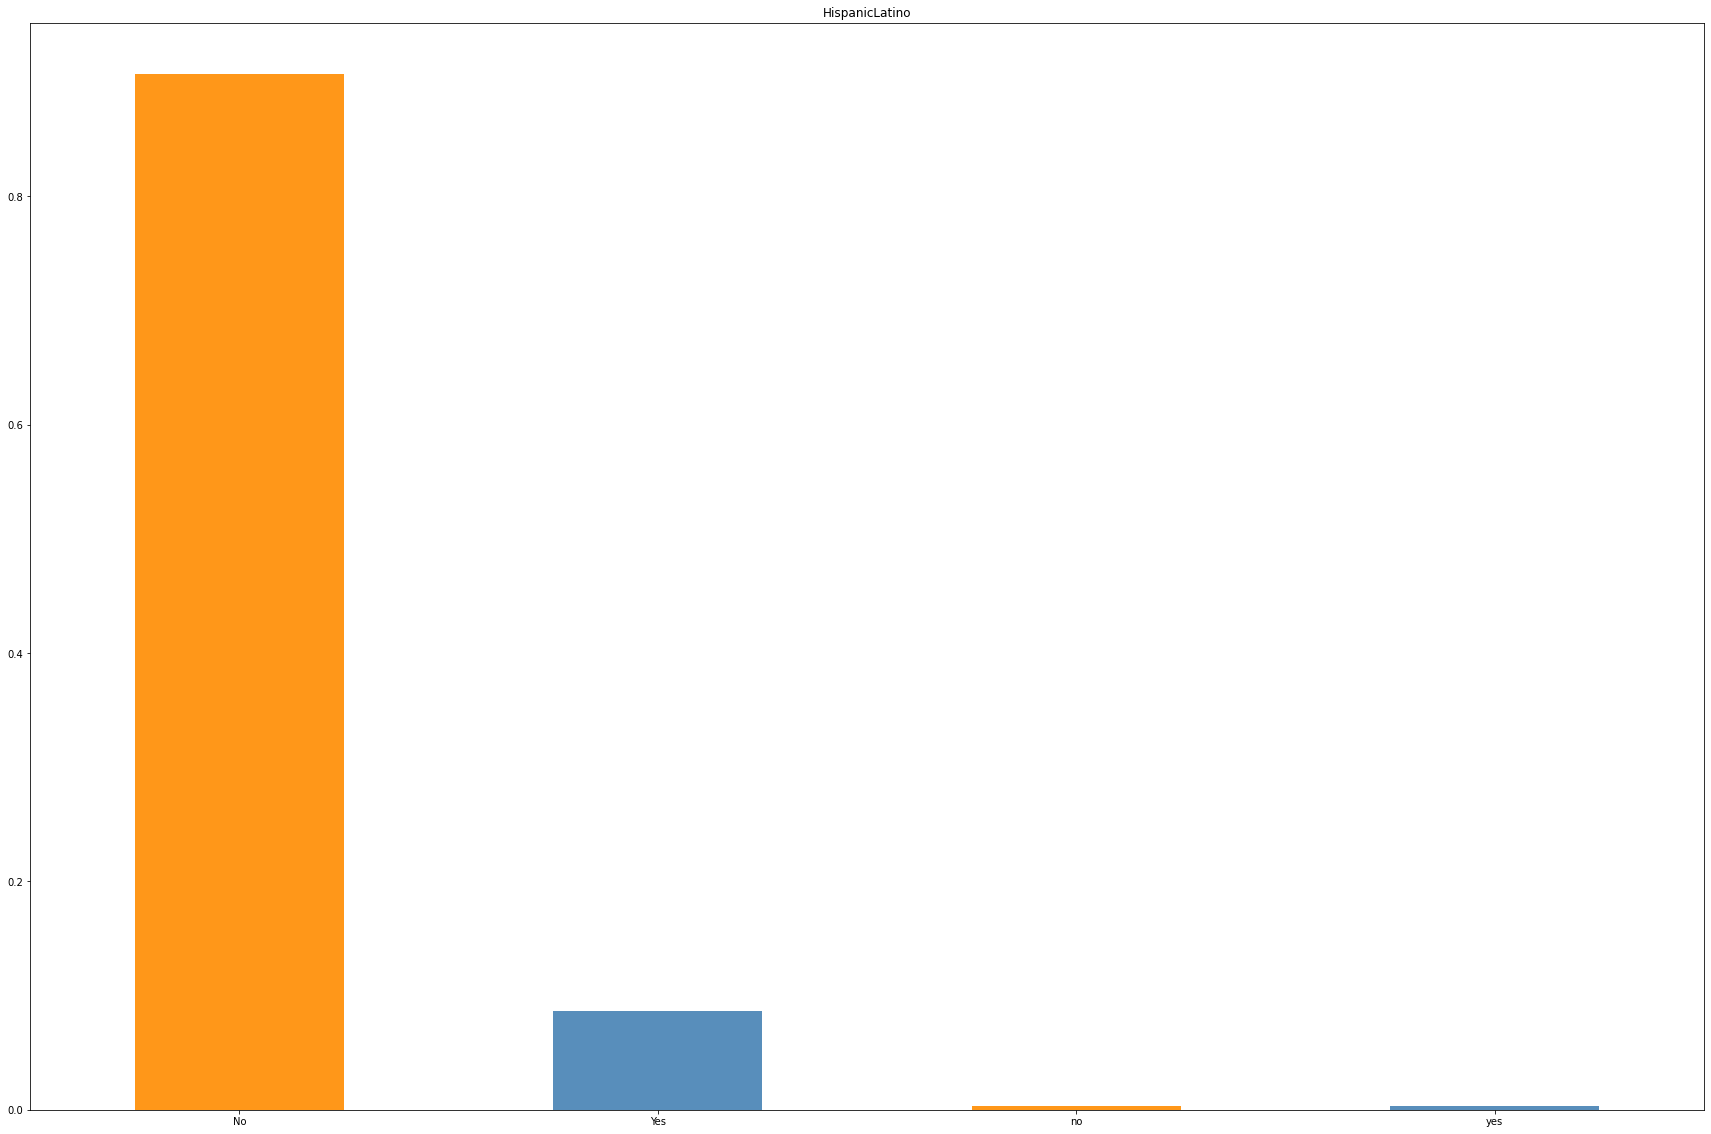

+----------------------------------+------------+
|                                  |   RaceDesc |
|----------------------------------+------------|
| White                            |        187 |
| Black or African American        |         80 |
| Asian                            |         29 |
| Two or more races                |         11 |
| American Indian or Alaska Native |          3 |
| Hispanic                         |          1 |
+----------------------------------+------------+


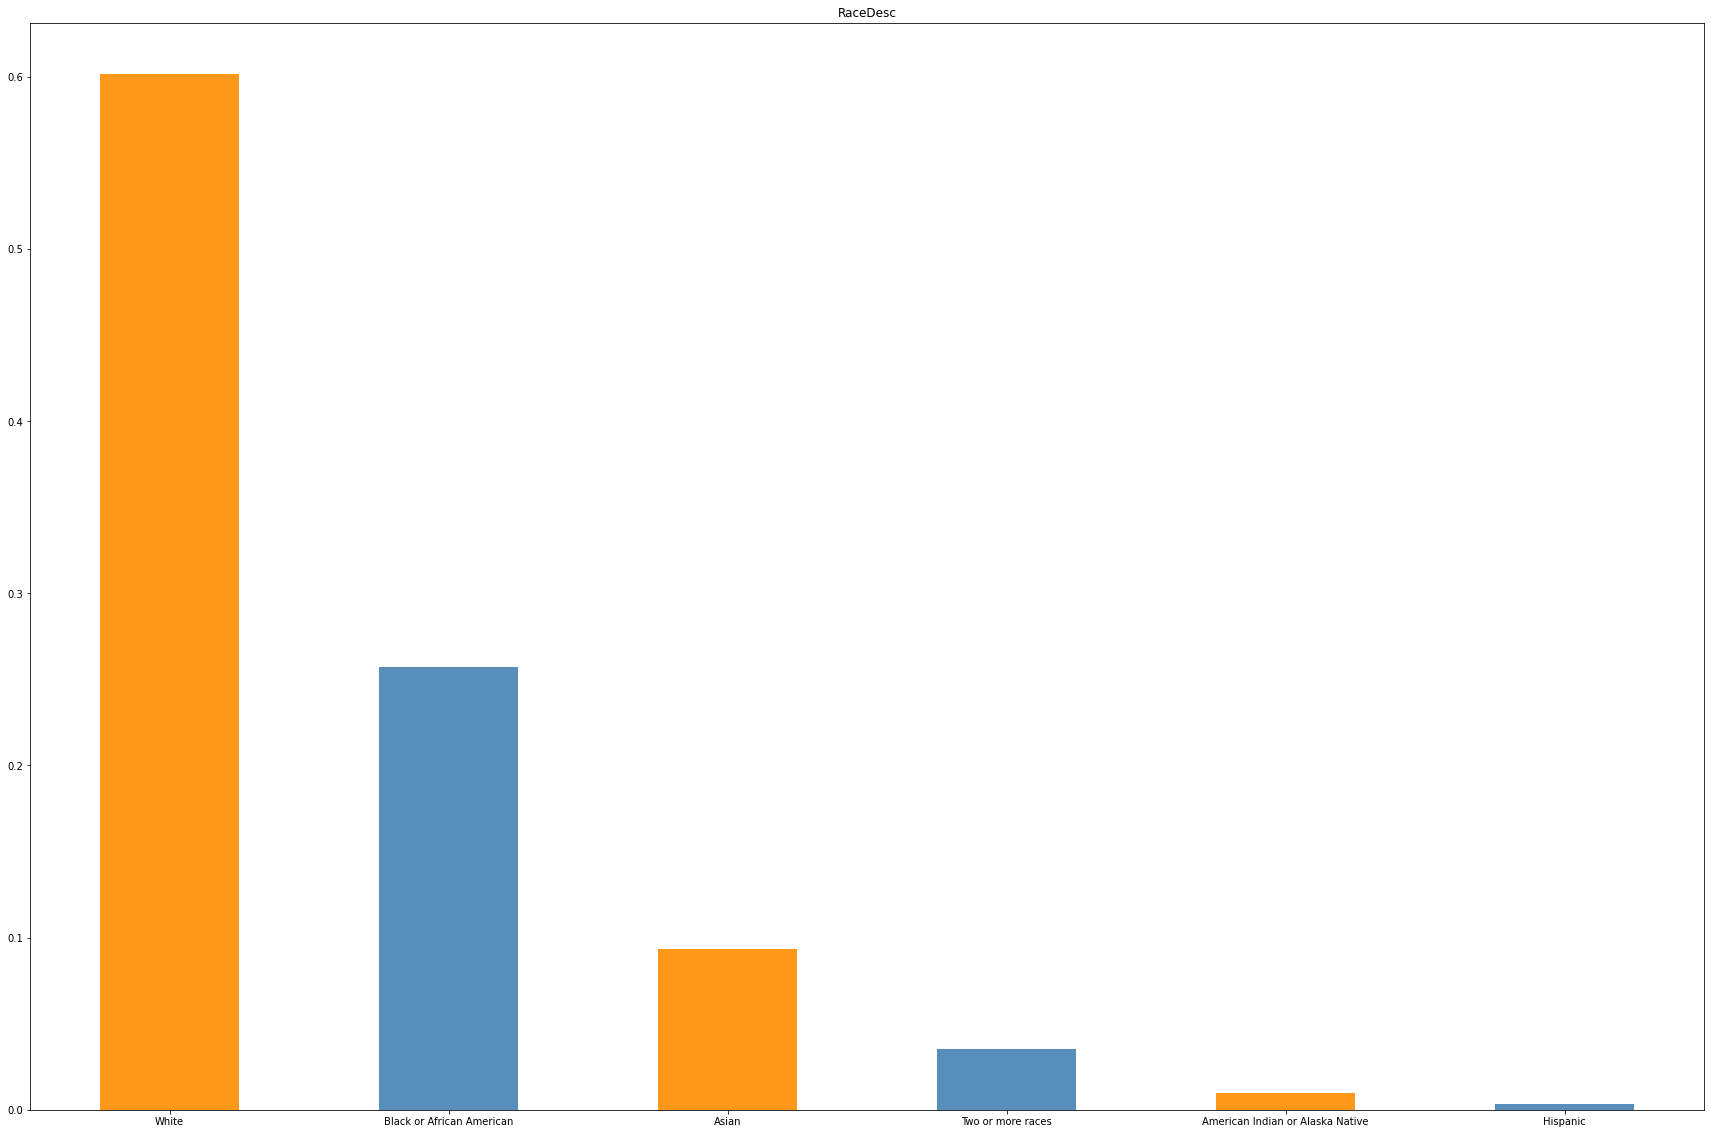

+----------------------------------+--------------+
|                                  |   TermReason |
|----------------------------------+--------------|
| N/A-StillEmployed                |          207 |
| Another position                 |           20 |
| unhappy                          |           14 |
| more money                       |           11 |
| career change                    |            9 |
| hours                            |            8 |
| attendance                       |            7 |
| return to school                 |            5 |
| relocation out of area           |            5 |
| no-call, no-show                 |            4 |
| military                         |            4 |
| retiring                         |            4 |
| performance                      |            4 |
| maternity leave - did not return |            3 |
| medical issues                   |            3 |
| Learned that he is a gangster    |            1 |
| Fatal attr

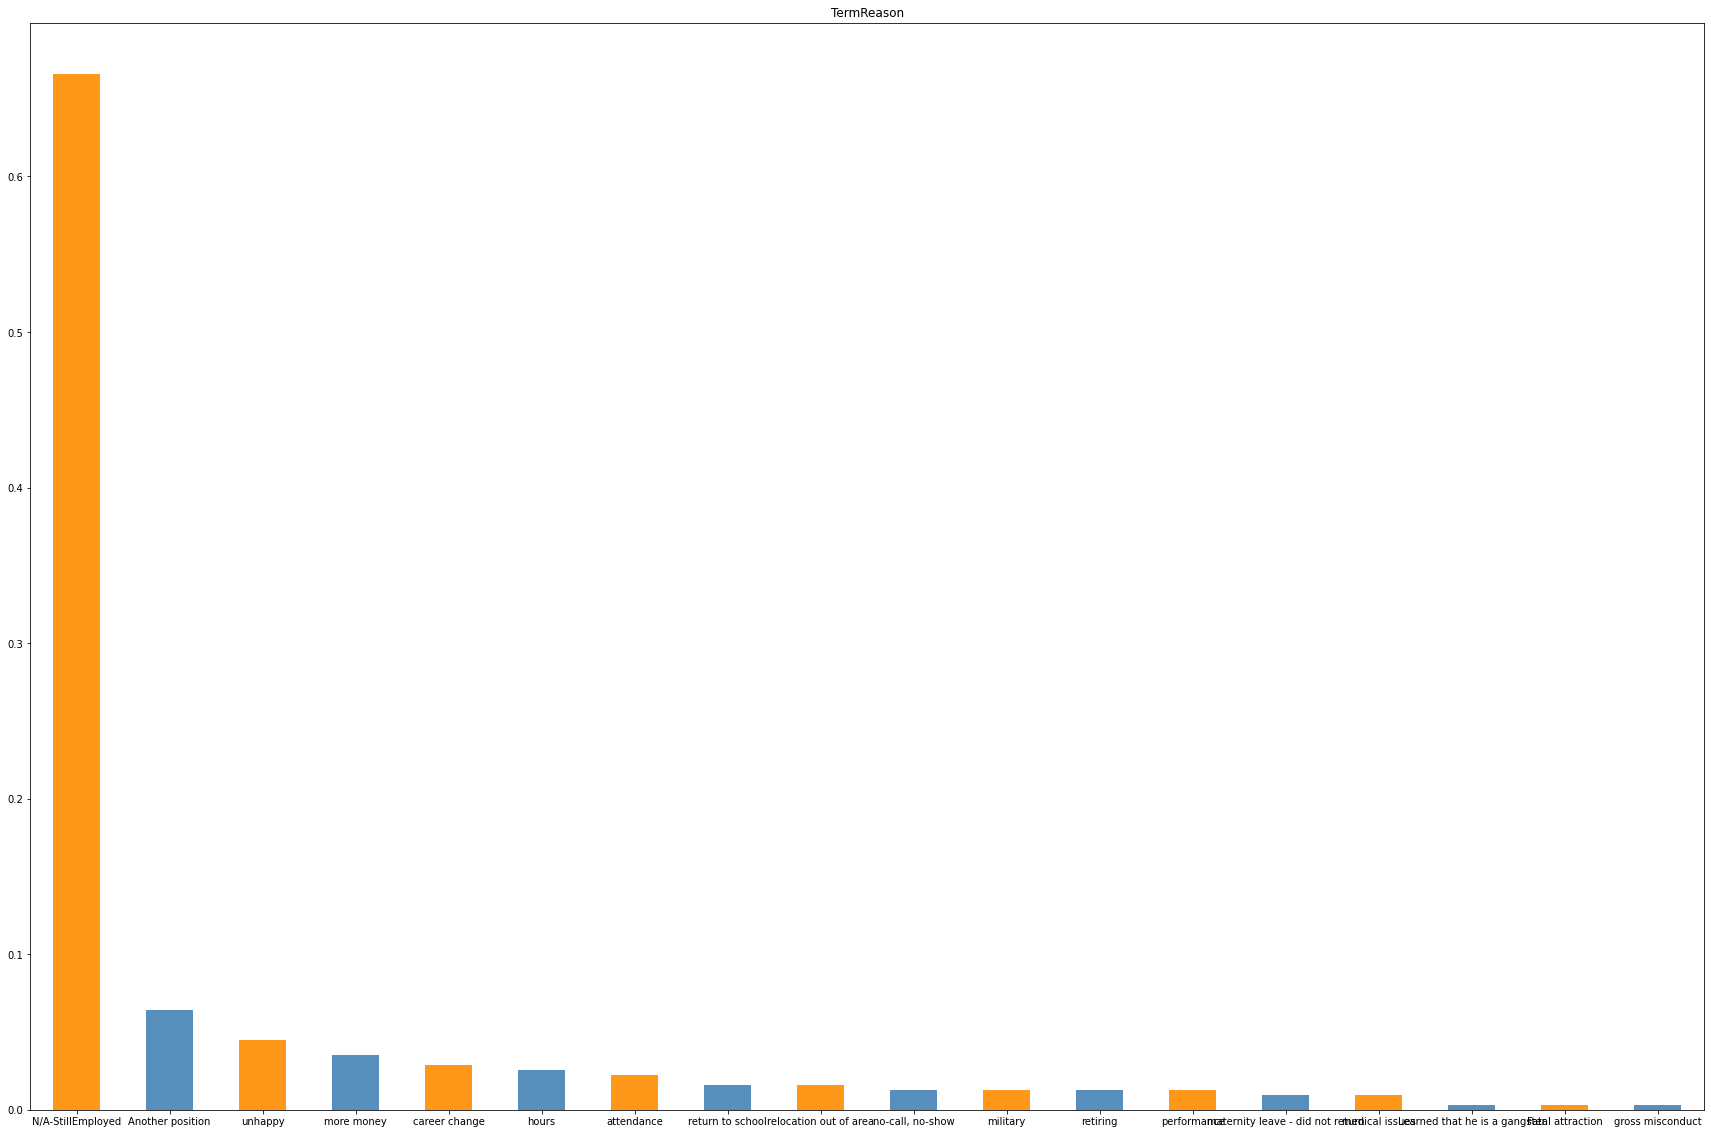

+------------------------+--------------------+
|                        |   EmploymentStatus |
|------------------------+--------------------|
| Active                 |                207 |
| Voluntarily Terminated |                 88 |
| Terminated for Cause   |                 16 |
+------------------------+--------------------+


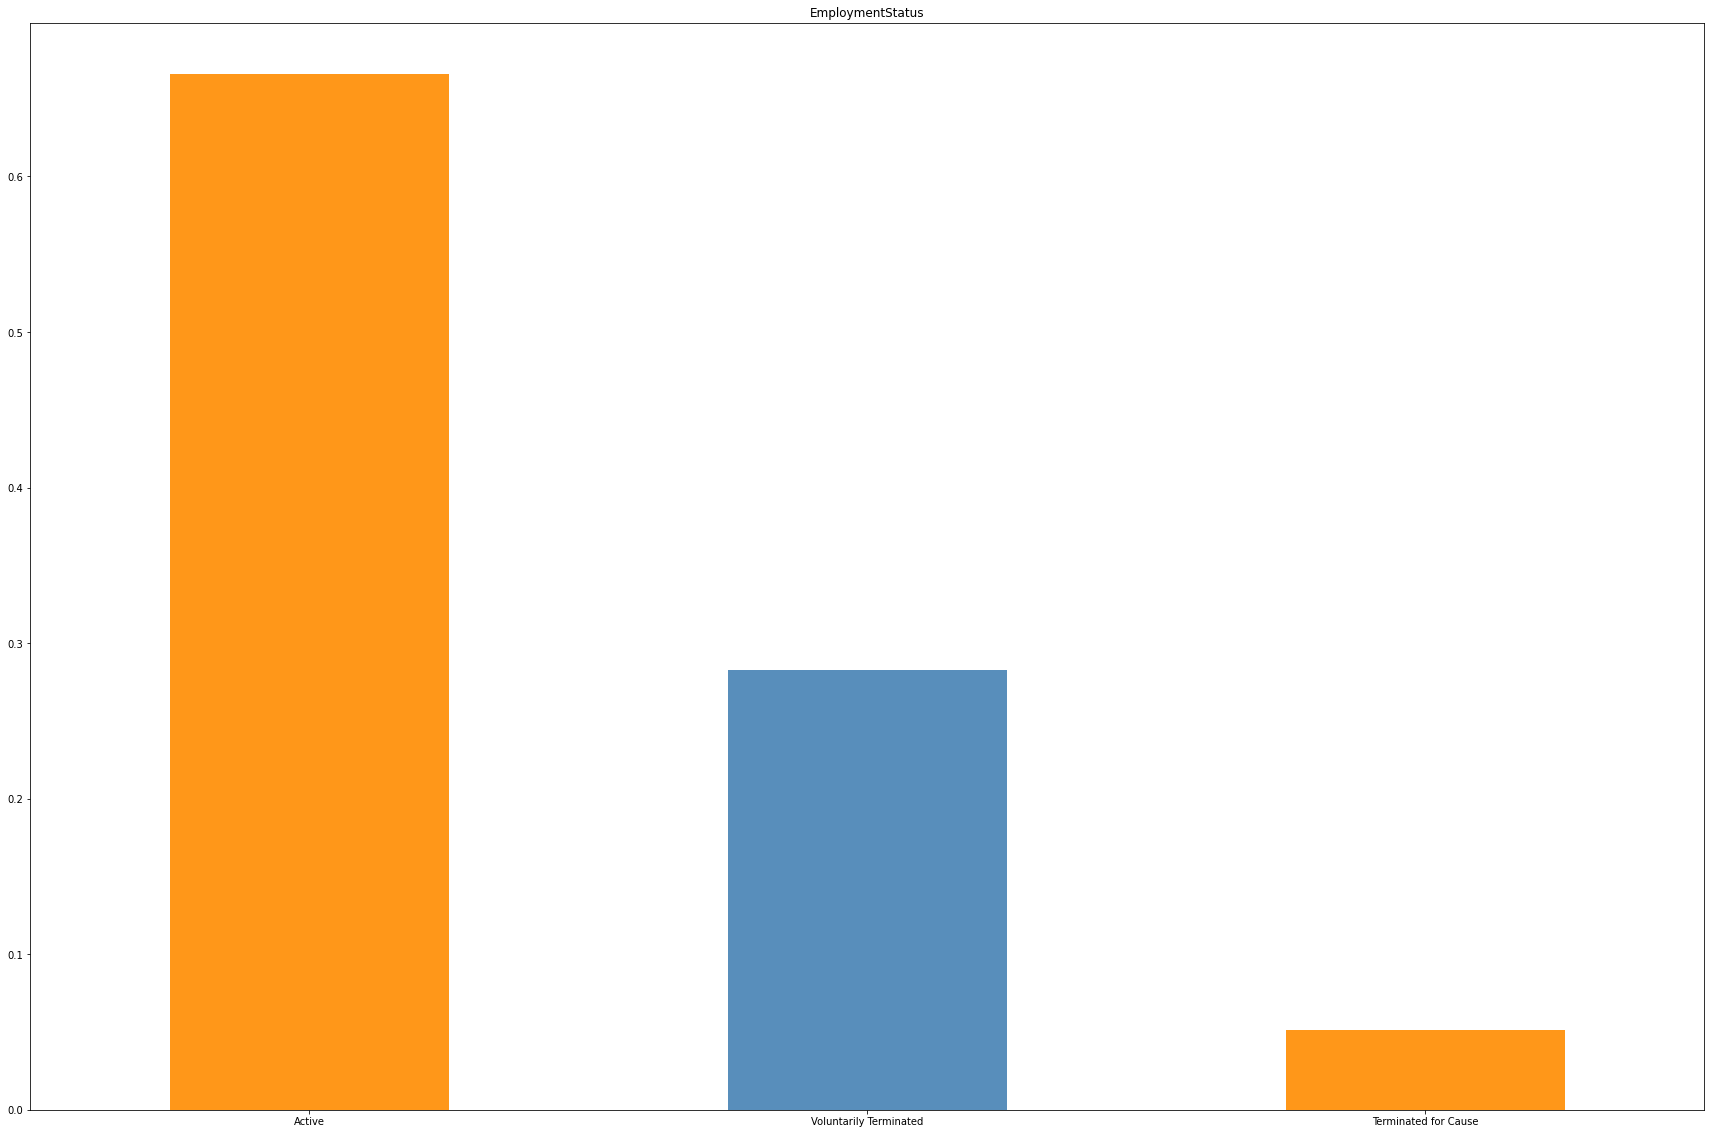

+----------------------+--------------+
|                      |   Department |
|----------------------+--------------|
| Production           |          209 |
| IT/IS                |           50 |
| Sales                |           31 |
| Software Engineering |           11 |
| Admin Offices        |            9 |
| Executive Office     |            1 |
+----------------------+--------------+


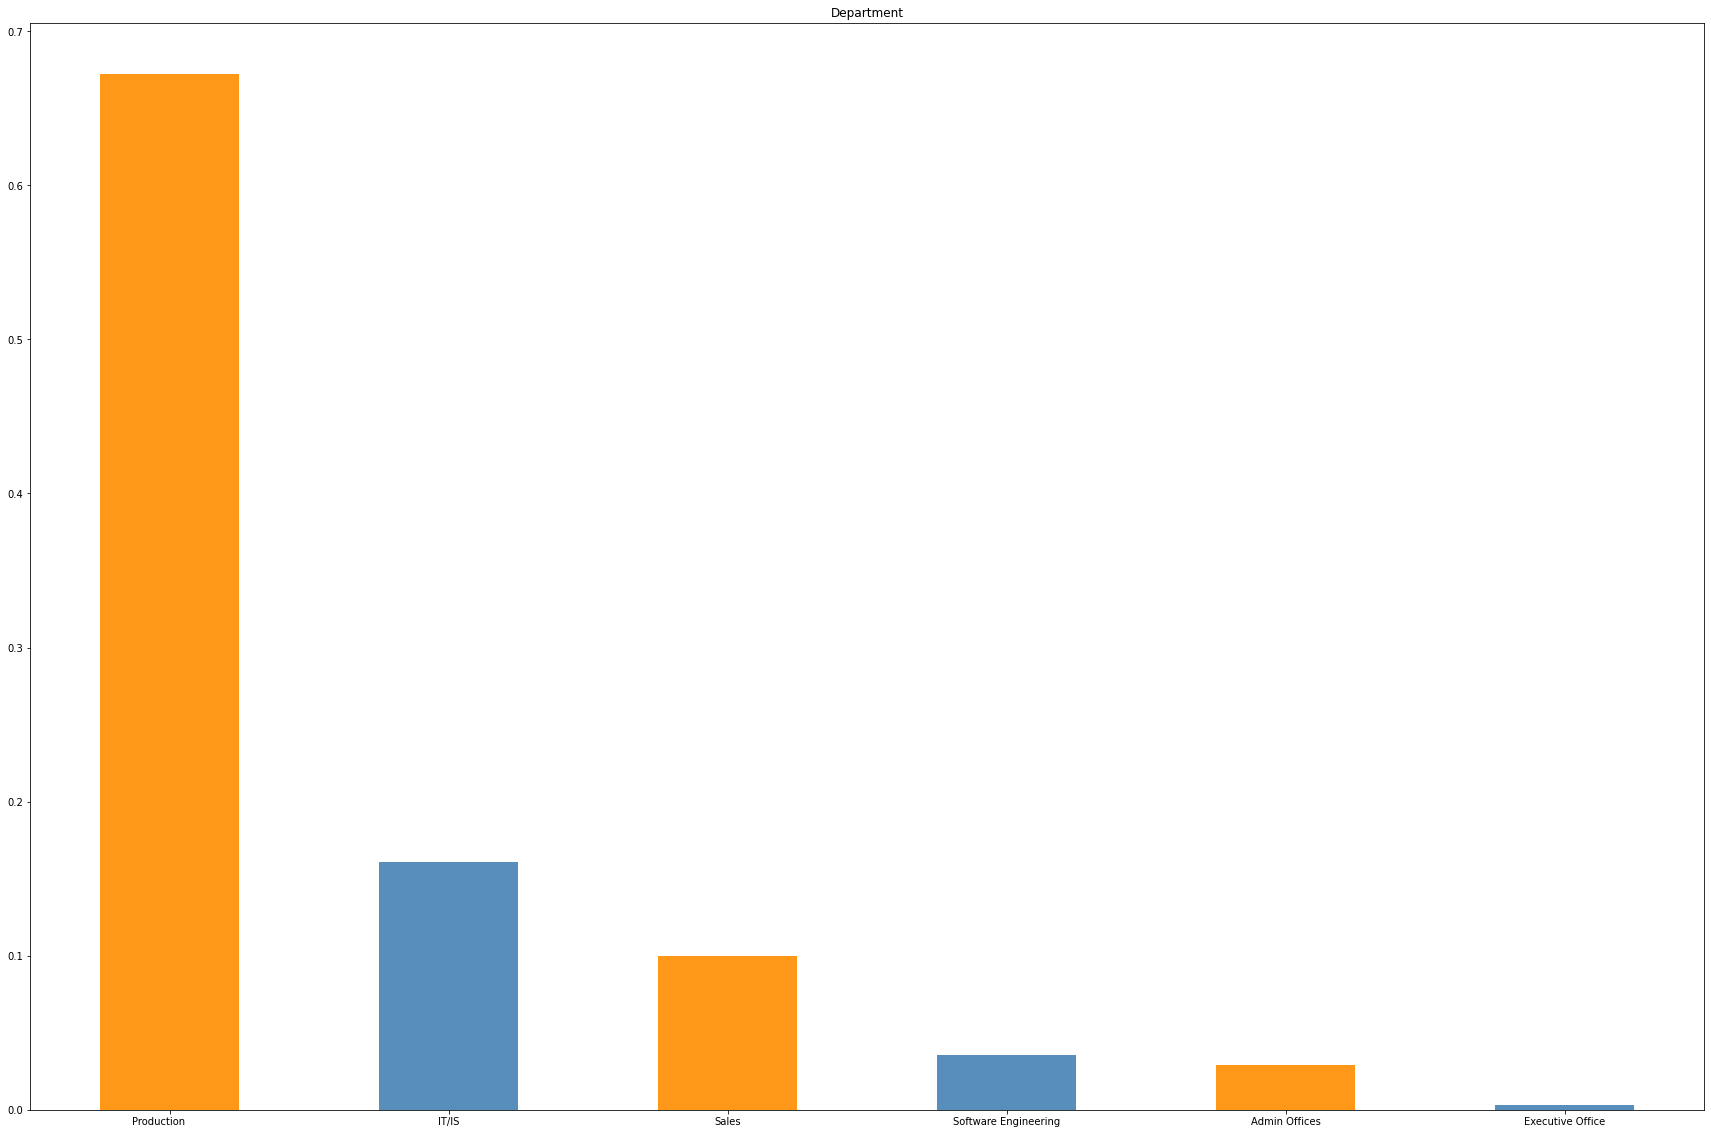

+-------------------------+---------------------+
|                         |   RecruitmentSource |
|-------------------------+---------------------|
| Indeed                  |                  87 |
| LinkedIn                |                  76 |
| Google Search           |                  49 |
| Employee Referral       |                  31 |
| Diversity Job Fair      |                  29 |
| CareerBuilder           |                  23 |
| Website                 |                  13 |
| Other                   |                   2 |
| On-line Web application |                   1 |
+-------------------------+---------------------+


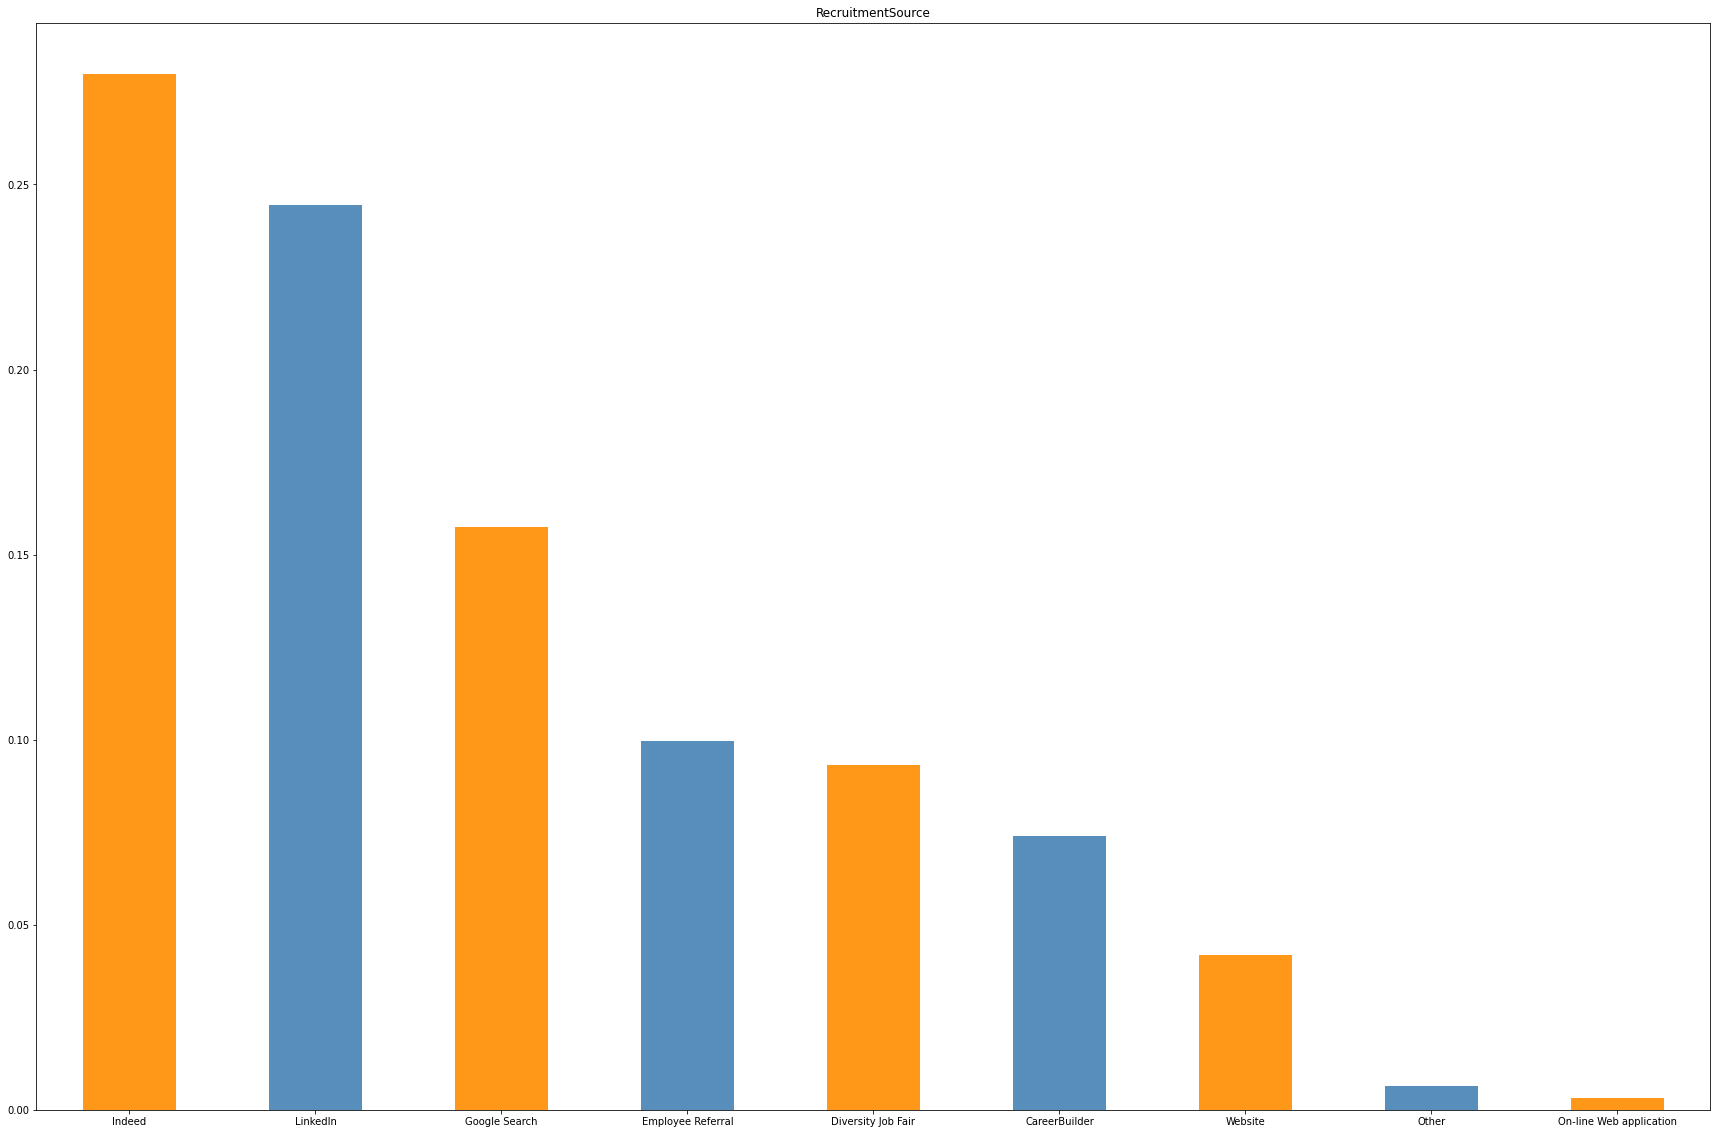

+-------------------+--------------------+
|                   |   PerformanceScore |
|-------------------+--------------------|
| Fully Meets       |                243 |
| Exceeds           |                 37 |
| Needs Improvement |                 18 |
| PIP               |                 13 |
+-------------------+--------------------+


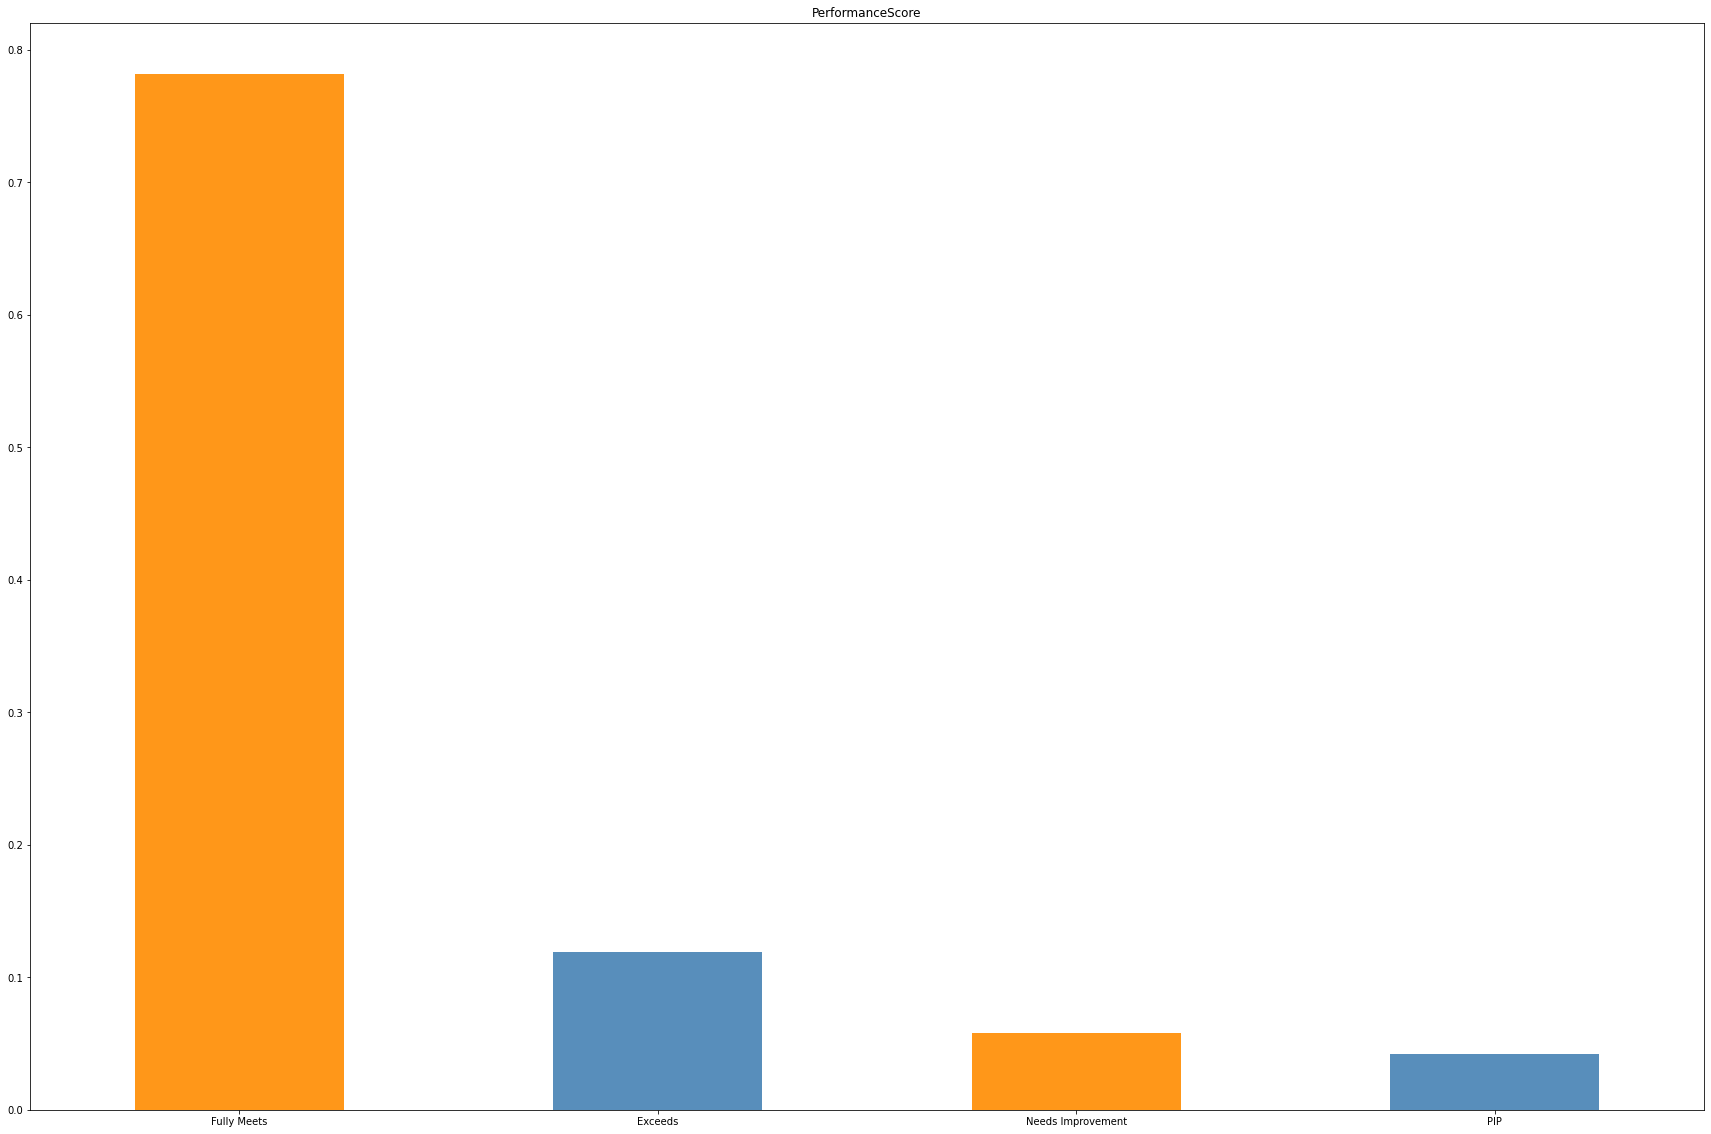

+----+-------------------+
|    |   EmpSatisfaction |
|----+-------------------|
|  3 |               108 |
|  5 |                98 |
|  4 |                94 |
|  2 |                 9 |
|  1 |                 2 |
+----+-------------------+


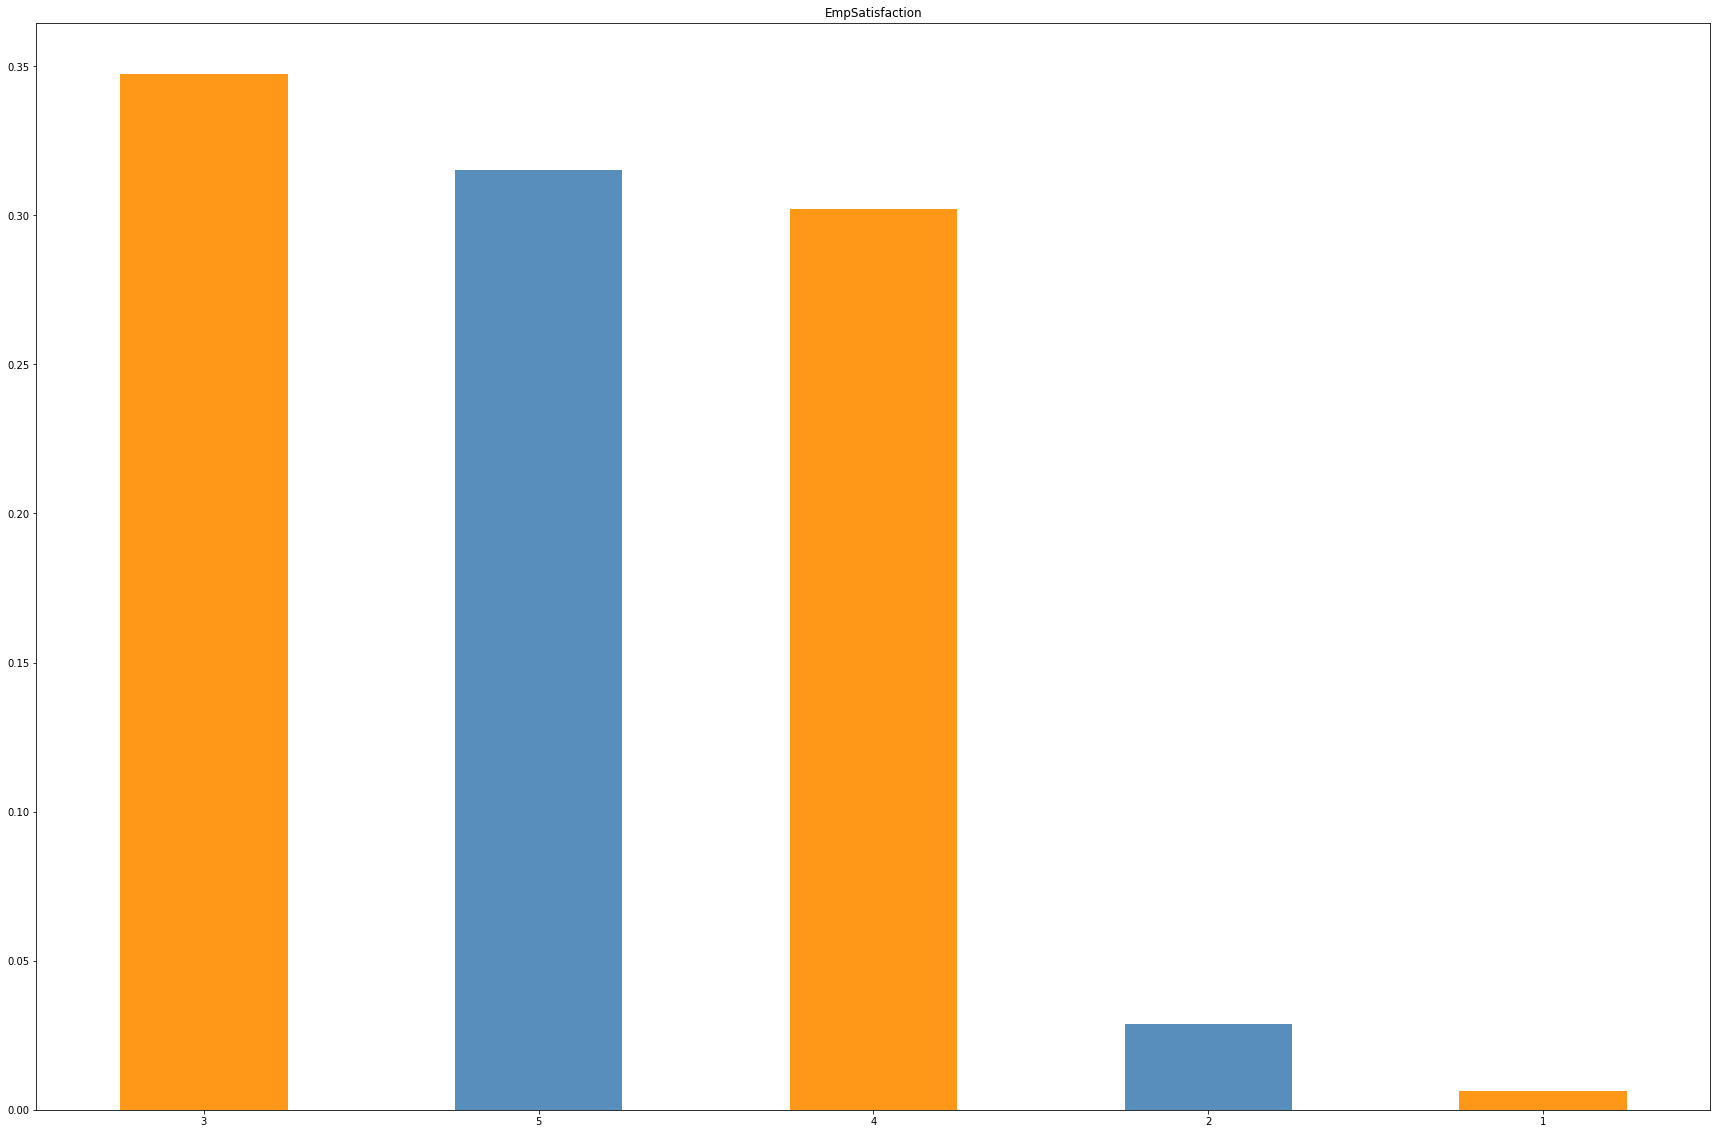

+----+------------------------+
|    |   SpecialProjectsCount |
|----+------------------------|
|  0 |                    241 |
|  6 |                     21 |
|  5 |                     21 |
|  7 |                     12 |
|  4 |                      9 |
|  3 |                      3 |
|  8 |                      2 |
|  2 |                      1 |
|  1 |                      1 |
+----+------------------------+


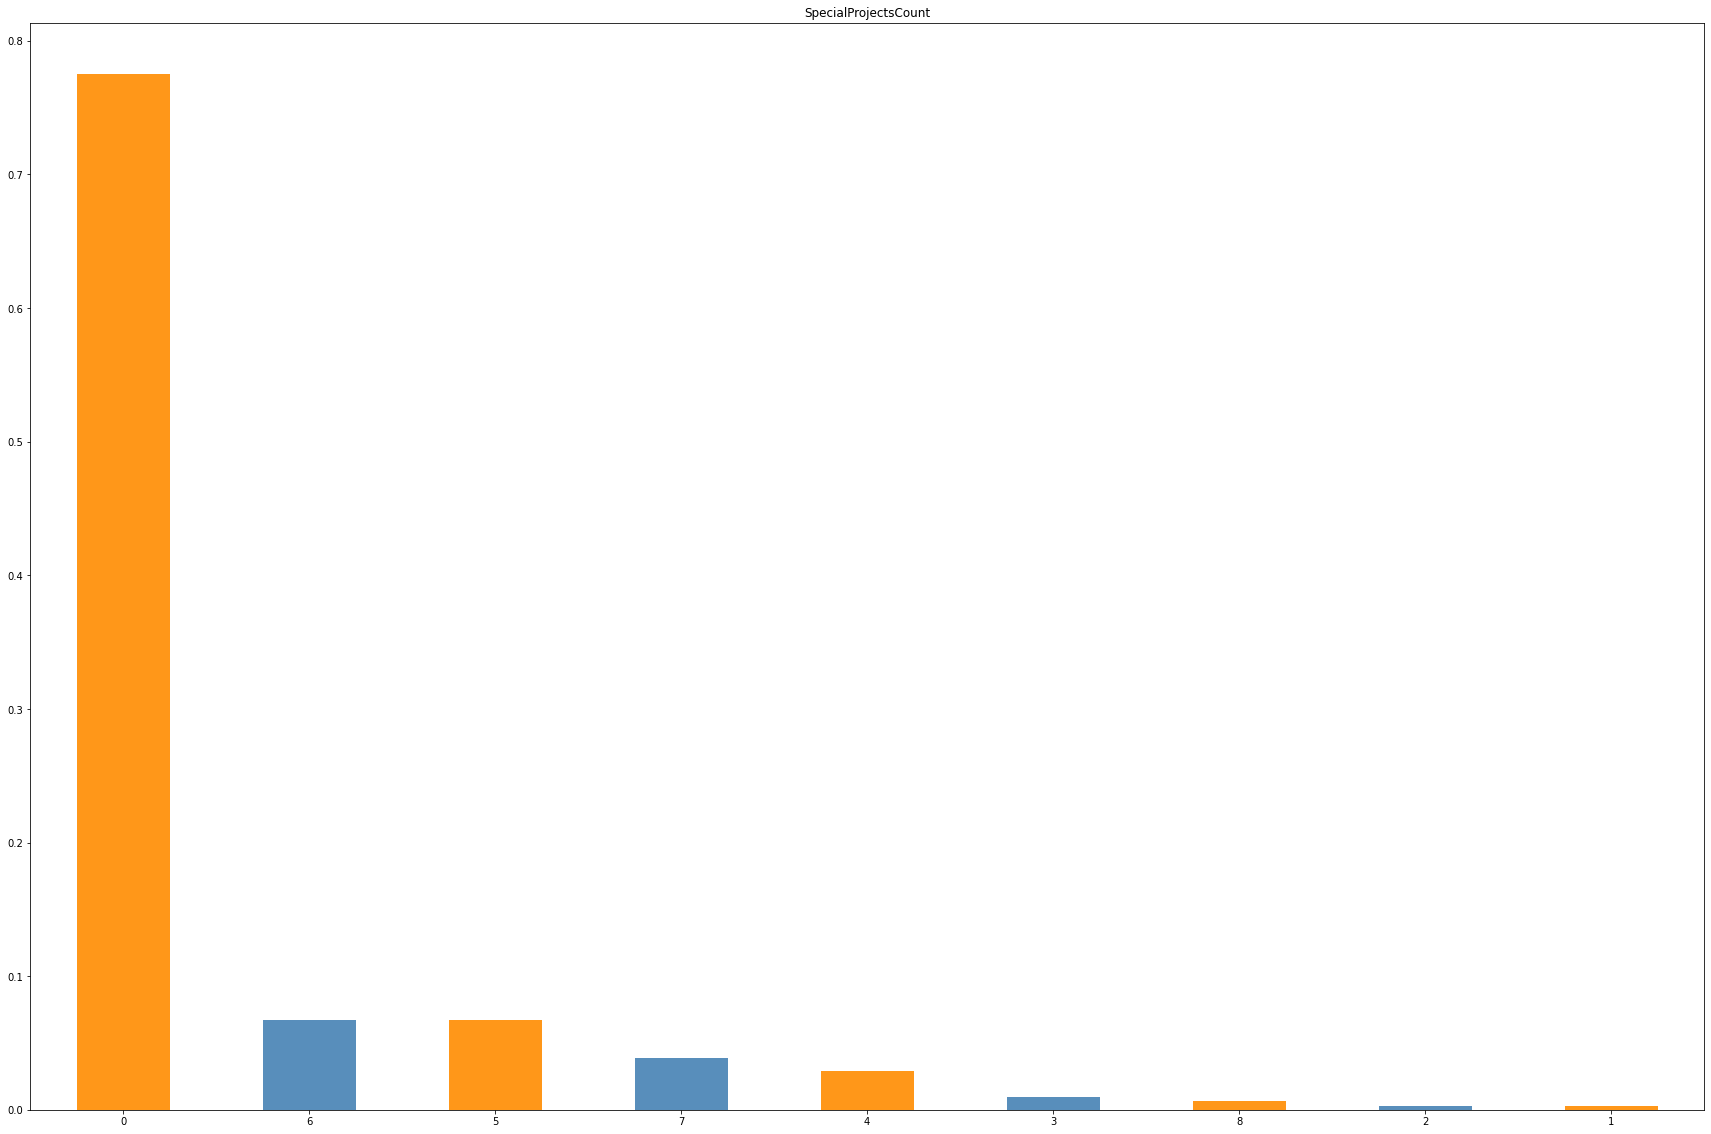

+----+------------------+
|    |   DaysLateLast30 |
|----+------------------|
|  0 |              278 |
|  4 |                8 |
|  2 |                6 |
|  5 |                6 |
|  3 |                6 |
|  6 |                6 |
|  1 |                1 |
+----+------------------+


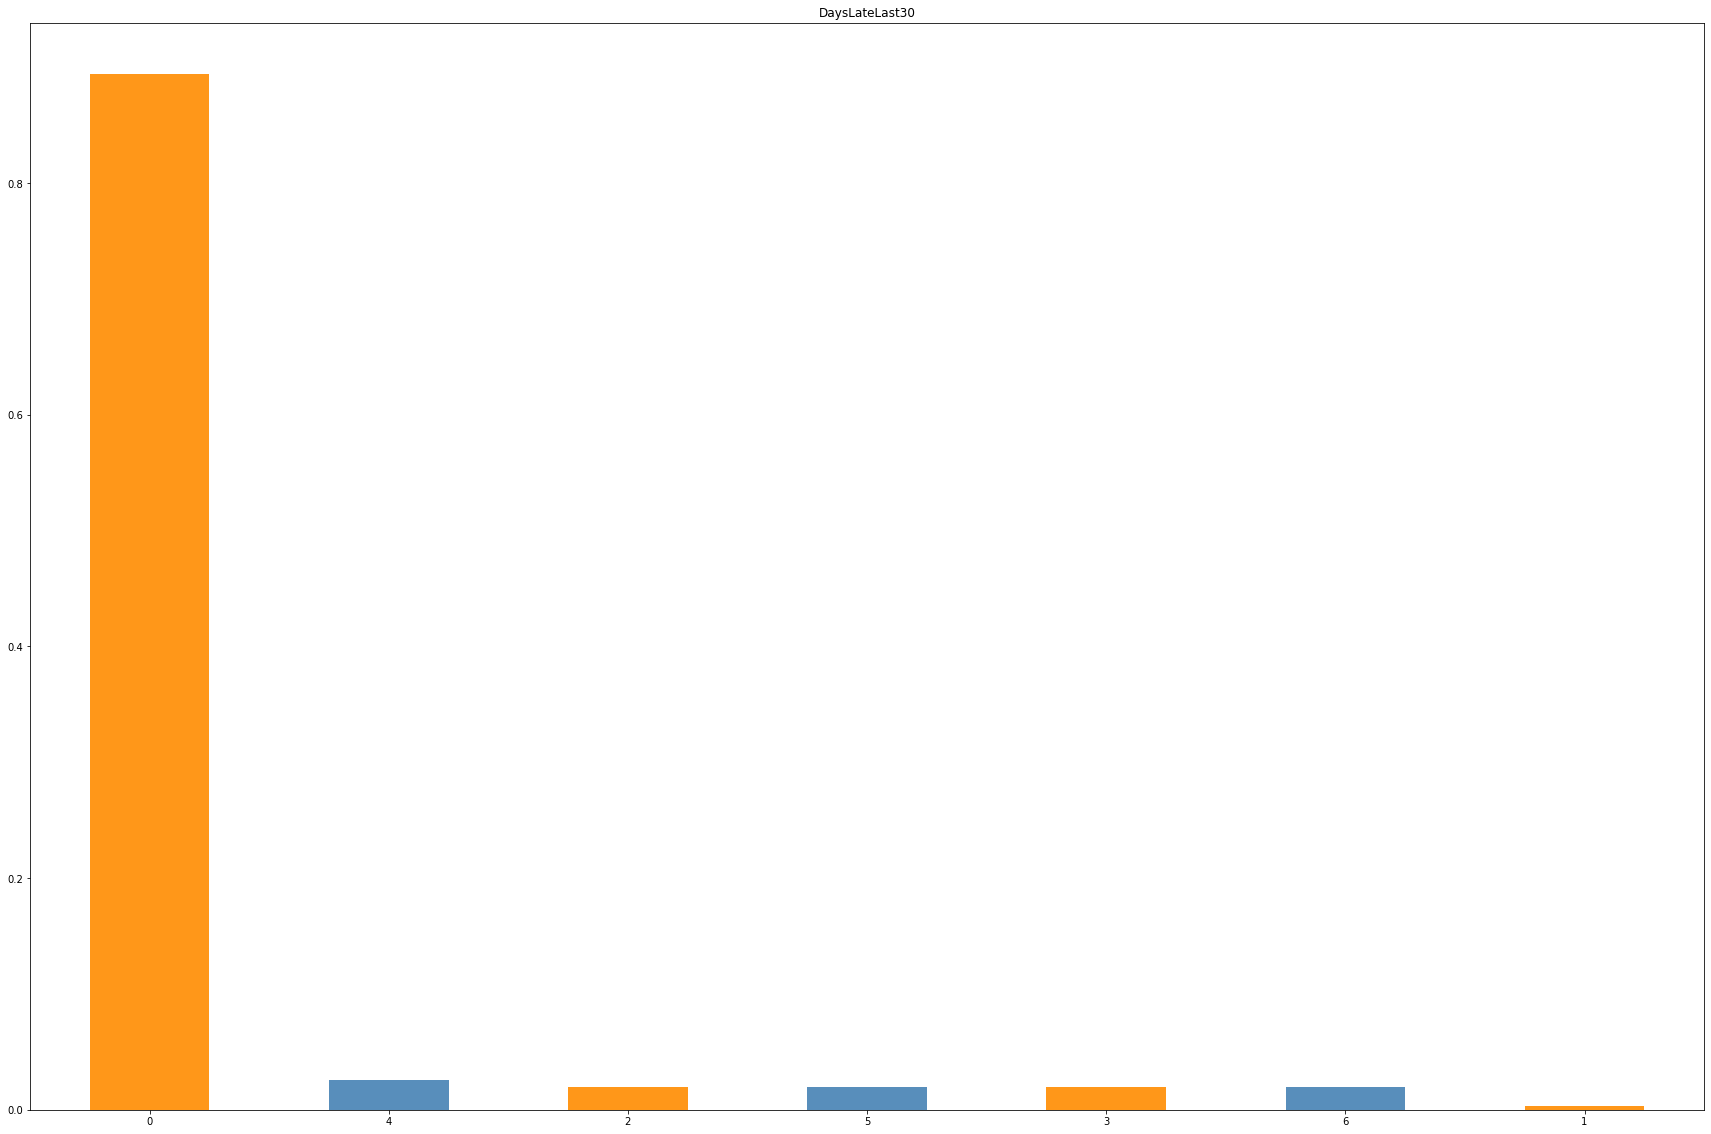

+----+------------+
|    |   Absences |
|----+------------|
|  4 |         23 |
| 16 |         23 |
|  7 |         21 |
|  2 |         21 |
| 15 |         20 |
| 13 |         17 |
| 14 |         17 |
|  3 |         16 |
| 19 |         16 |
|  6 |         16 |
| 11 |         15 |
| 17 |         15 |
|  1 |         14 |
| 20 |         14 |
|  9 |         14 |
|  5 |         12 |
|  8 |         11 |
| 10 |         10 |
| 12 |          8 |
| 18 |          8 |
+----+------------+


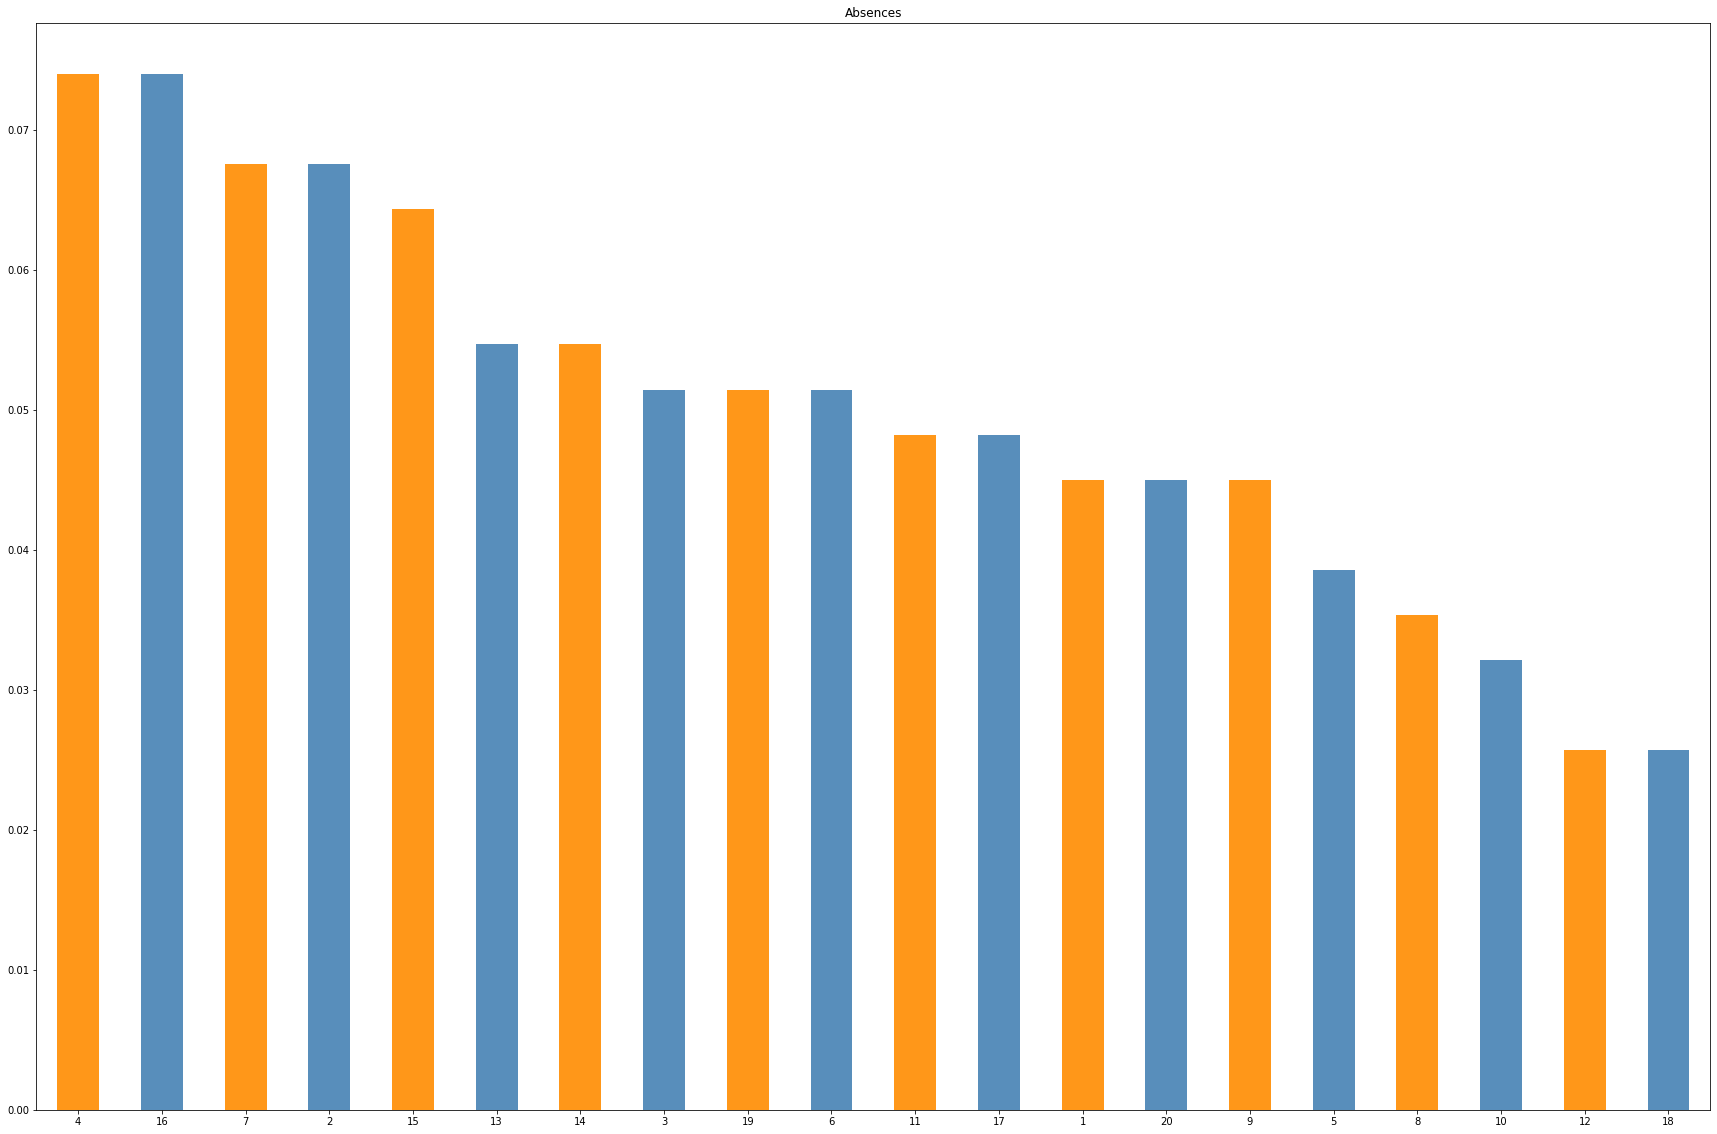

In [16]:
obj_EDA(df, Objcols)

### Independent Dependent Variables (Numerical)

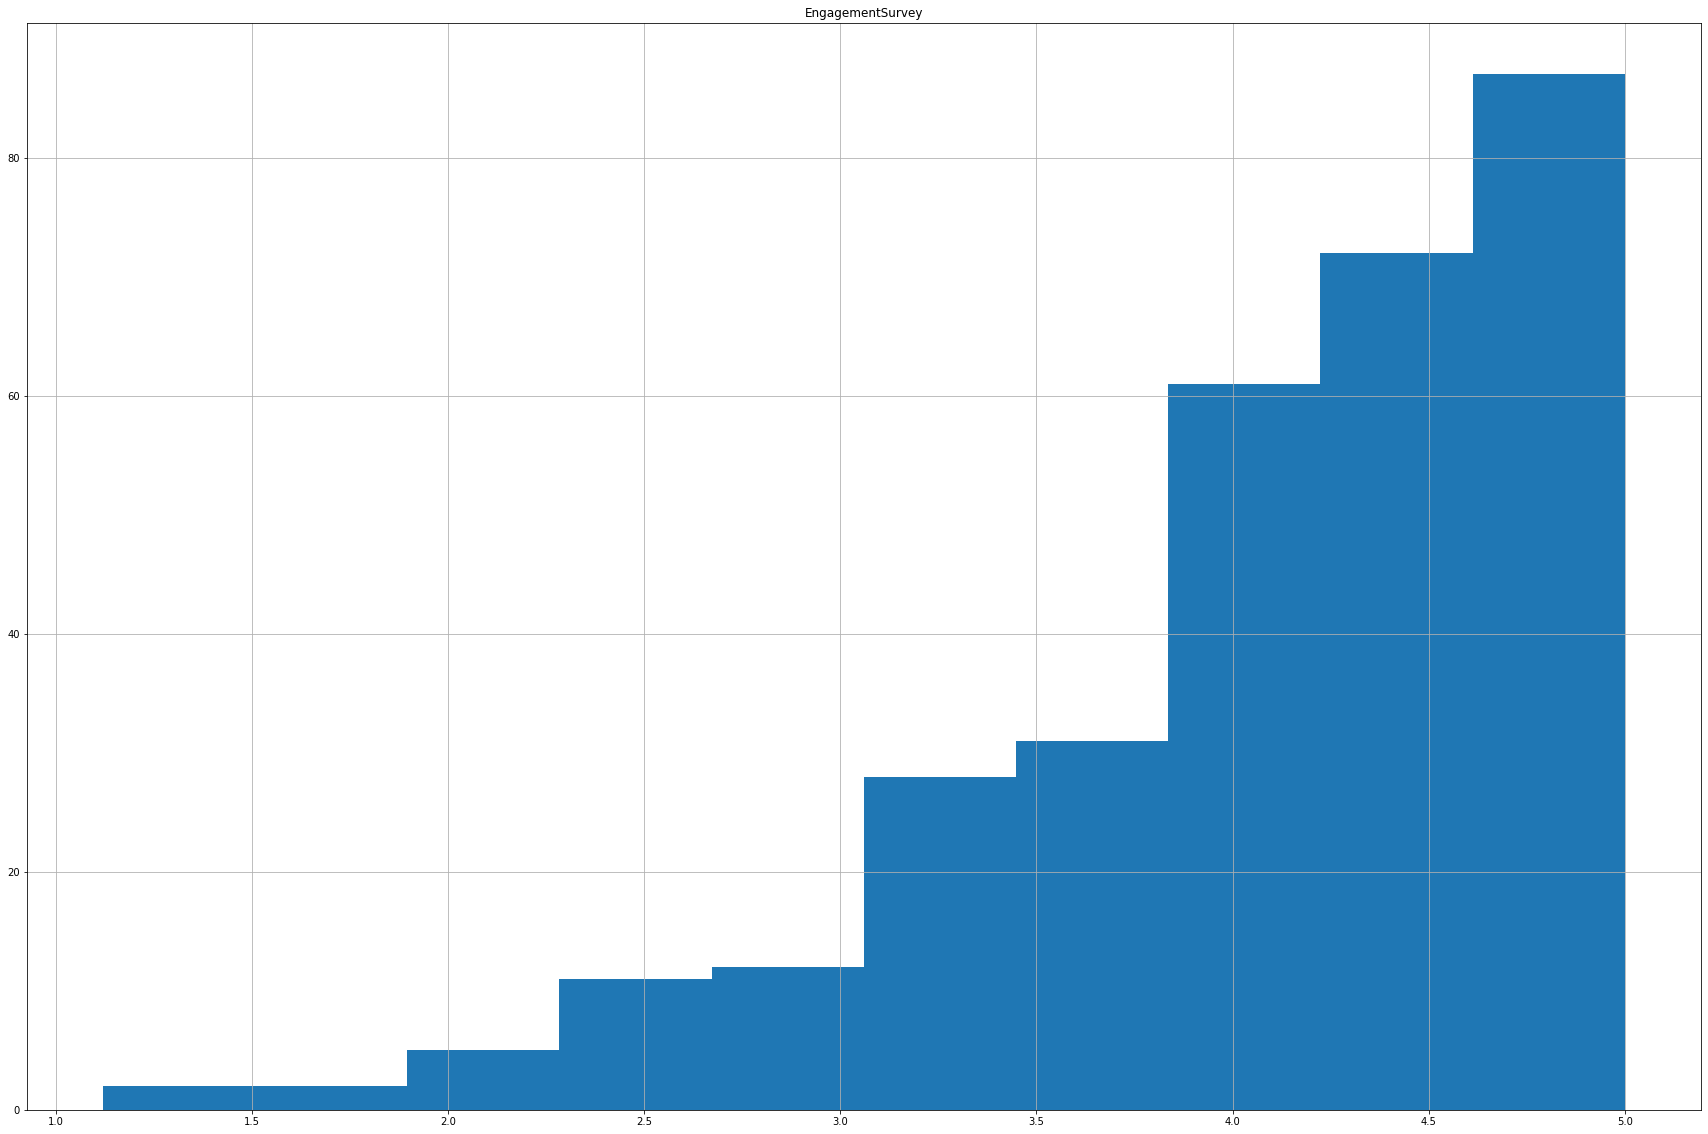

In [17]:
EDA_num(df, NUMcols)

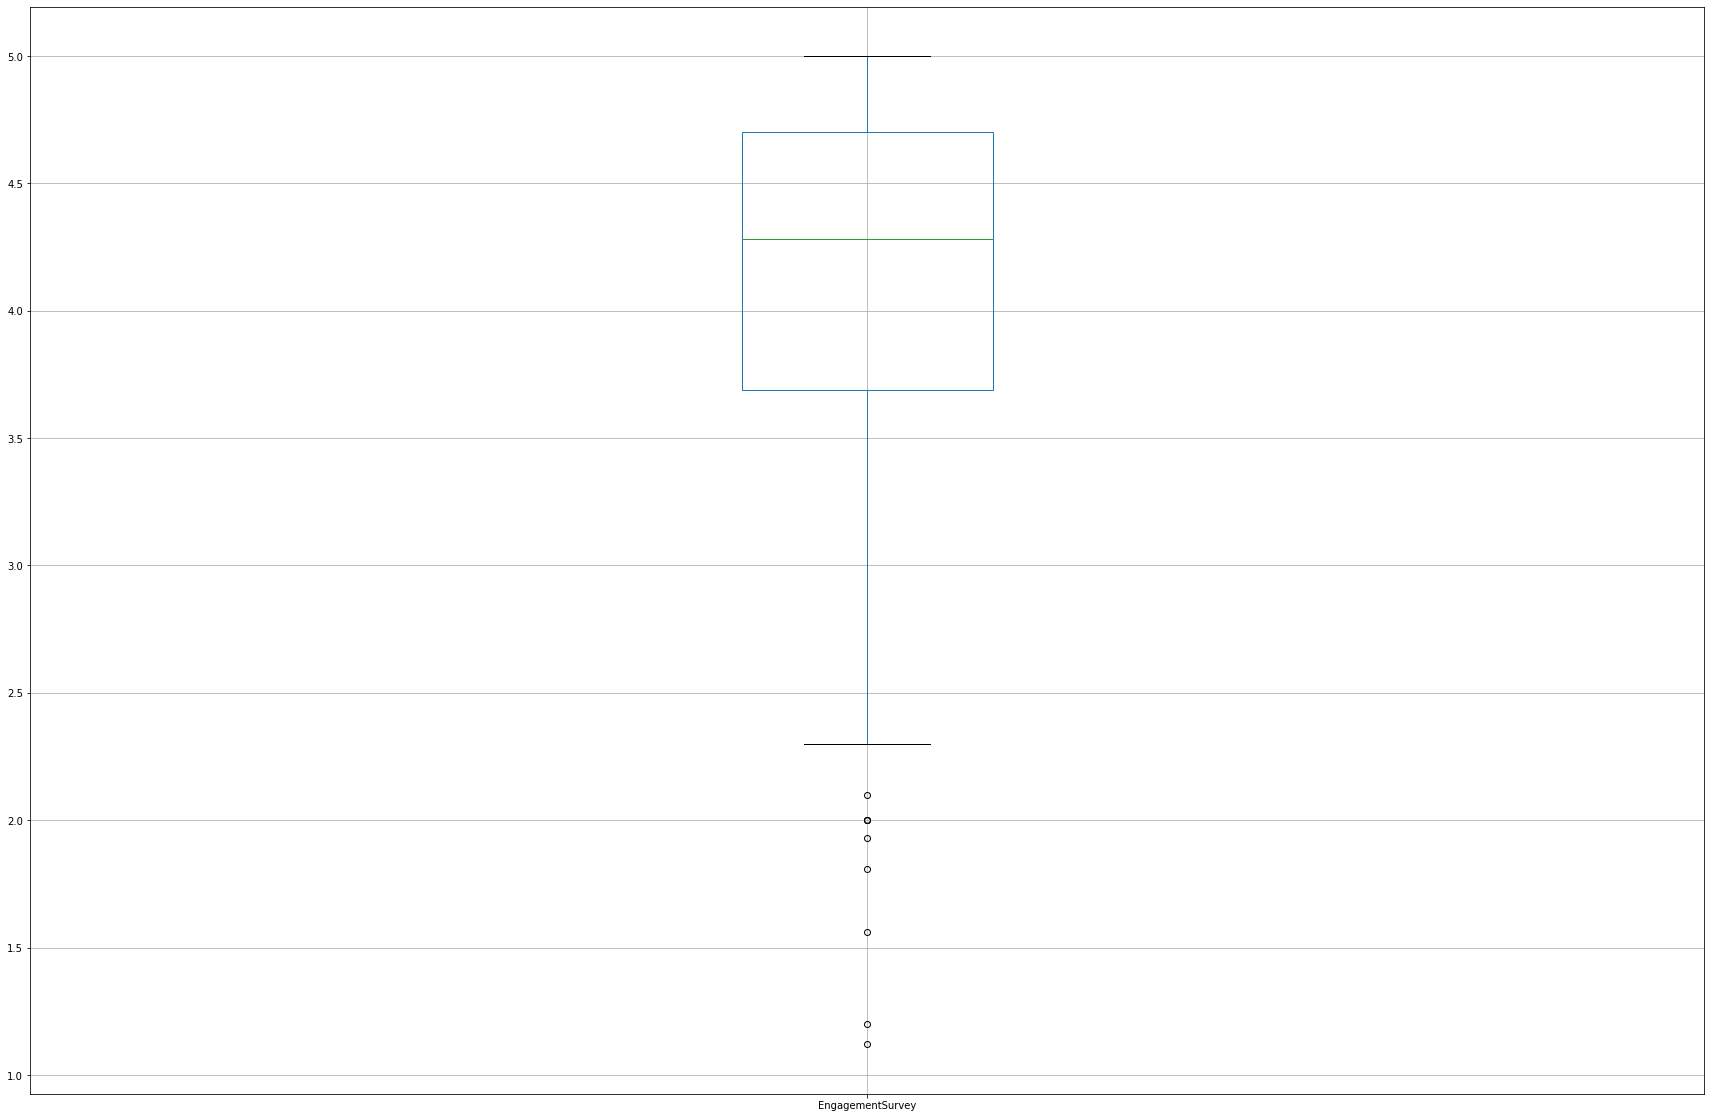

In [18]:
EDA_num_2(df, NUMcols)

# Data Transformation

In [19]:
if DT == 'StandardScaler' : 
    # StandardScaler
    df = NumStandardScaler(df)


Standardization Applied On: Salary

Standardization Applied On: EngagementSurvey


In [20]:
pd.DataFrame(df.head())

,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,1,1,5,4,0,-0.259,0,Production Technician I,MA,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,LinkedIn,Exceeds,0.621,5,0,0,1
1,1,5,3,3,0,1.410,1,Sr. DBA,MA,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,1.078,3,6,0,17
2,0,5,5,3,0,-0.162,1,Production Technician II,MA,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Production,LinkedIn,Fully Meets,-1.382,3,0,0,3
3,0,1,5,3,0,-0.160,0,Production Technician I,MA,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Indeed,Fully Meets,0.926,5,0,0,15
4,0,5,5,3,0,-0.724,1,Production Technician I,MA,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Production,Google Search,Fully Meets,1.128,4,0,0,2


# Feature Engineering 

In [21]:
if FE == 'LableEncodeing':
    df = df.apply(lambda x: AllObjLabelEncoder(x))


Lable Encoding Applied On: GenderID
New Value for GenderID  Variable: [0 1]
Old Value for GenderID Variable: ['0' '1']

Lable Encoding Applied On: EmpStatusID
New Value for EmpStatusID  Variable: [0 1 2 3 4]
Old Value for EmpStatusID Variable: ['1' '2' '3' '4' '5']

Lable Encoding Applied On: DeptID
New Value for DeptID  Variable: [0 1 2 3 4 5]
Old Value for DeptID Variable: ['1' '2' '3' '4' '5' '6']

Lable Encoding Applied On: PerfScoreID
New Value for PerfScoreID  Variable: [0 1 2 3]
Old Value for PerfScoreID Variable: ['1' '2' '3' '4']

Lable Encoding Applied On: FromDiversityJobFairID
New Value for FromDiversityJobFairID  Variable: [0 1]
Old Value for FromDiversityJobFairID Variable: ['0' '1']

Lable Encoding Applied On: Termd
New Value for Termd  Variable: [0 1]
Old Value for Termd Variable: ['0' '1']

Lable Encoding Applied On: Position
New Value for Position  Variable: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Old Value f

In [22]:
pd.DataFrame(df.head())

,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
0,1,0,4,3,0,-0.259,0,22,10,1,3,2,0,5,3,0,3,5,0,0.621,4,0,0,0
1,1,4,2,2,0,1.410,1,30,10,1,1,2,0,5,5,2,2,4,1,1.078,2,6,0,8
2,0,4,4,2,0,-0.162,1,23,10,0,1,2,0,5,7,2,3,5,1,-1.382,2,0,0,13
3,0,0,4,2,0,-0.160,0,22,10,0,1,2,0,5,3,0,3,4,1,0.926,4,0,0,6
4,0,4,4,2,0,-0.724,1,22,10,0,0,2,0,5,16,2,3,3,1,1.128,3,0,0,11


# Feature Selection

In [23]:
fs = None

if FS == 'Forward':
    df, fs = Feature_selection_forward(df, target)

All the Num Variables: ['GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd', 'Position', 'State', 'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason', 'EmploymentStatus', 'Department', 'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences']

All the obj Variables: []


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   29.9s finished

[2022-07-20 05:27:47] Features: 1/23 -- score: -0.35494236536607787[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   29.3s finished

[2022-07-20 05:28:16] Features: 2/23 -- score: -0.3285207412644687[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   27.4s finished

[2022-07-20 05:28:44] Features: 3/23 -- score: -0.32429112892790246[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D


Most Variables Can Effect The Target Variables:  ['GenderID', 'Position', 'EmpSatisfaction', 'SpecialProjectsCount']

With Highest Score:  -0.32158720352391323

All the Variables Selected:  ['GenderID', 'Position', 'EmpSatisfaction', 'SpecialProjectsCount', 'Salary']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished

[2022-07-20 05:33:30] Features: 23/23 -- score: -0.6435850367969191

In [24]:
pd.DataFrame(fs)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[-0.278972115195286, -0.08297471382569623, -1.2457024859659247, -0.07804804168150087, -0.08901447016198175]",-0.355,"(Position,)",0.581,0.452,0.226
2,"(6, 20)","[-0.25283039743035135, -0.1030746475425236, -1.141573430707151, -0.08193304599359279, -0.0631921846487246]",-0.329,"(Position, SpecialProjectsCount)",0.530,0.412,0.206
3,"(6, 19, 20)","[-0.21915456848356296, -0.11417691631453247, -1.098599948284532, -0.10854643967274728, -0.08097777188413753]",-0.324,"(Position, EmpSatisfaction, SpecialProjectsCount)",0.501,0.390,0.195
4,"(0, 6, 19, 20)","[-0.21710282129962752, -0.11275452250109075, -1.0994090191371744, -0.09882984645445968, -0.07983980822721366]",-0.322,"(GenderID, Position, EmpSatisfaction, SpecialProjectsCount)",0.504,0.392,0.196
5,"(0, 6, 8, 19, 20)","[-0.21756736818512676, -0.1148005093933853, -1.098785923408138, -0.11168281869715245, -0.08810769626021879]",-0.326,"(GenderID, Position, Sex, EmpSatisfaction, SpecialProjectsCount)",0.500,0.389,0.194
6,"(0, 6, 7, 8, 19, 20)","[-0.2604118150744897, -0.11921009216470355, -1.115434653536898, -0.10101055981246196, -0.08748152753485676]",-0.337,"(GenderID, Position, State, Sex, EmpSatisfaction, SpecialProjectsCount)",0.507,0.394,0.197
7,"(0, 4, 6, 7, 8, 19, 20)","[-0.27674716111477965, -0.12602959166584696, -1.1442155056615795, -0.10748278156901646, -0.08129123749018972]",-0.347,"(GenderID, FromDiversityJobFairID, Position, State, Sex, EmpSatisfaction, SpecialProjectsCount)",0.520,0.404,0.202
8,"(0, 4, 6, 7, 8, 10, 19, 20)","[-0.3163407888192998, -0.1393734479089405, -1.157796879926292, -0.08731626289646713, -0.08340748786170432]",-0.357,"(GenderID, FromDiversityJobFairID, Position, State, Sex, CitizenDesc, EmpSatisfaction, SpecialProjectsCount)",0.526,0.409,0.205
9,"(0, 1, 4, 6, 7, 8, 10, 19, 20)","[-0.28770587656433977, -0.1474769353666114, -1.1398808403523295, -0.09177560429168184, -0.0975112986439117]",-0.353,"(GenderID, EmpStatusID, FromDiversityJobFairID, Position, State, Sex, CitizenDesc, EmpSatisfaction, SpecialProjectsCount)",0.514,0.400,0.200
10,"(0, 1, 4, 5, 6, 7, 8, 10, 19, 20)","[-0.29800340112674417, -0.156519072407604, -1.1796911495561424, -0.10166131002352306, -0.08933910981496991]",-0.365,"(GenderID, EmpStatusID, FromDiversityJobFairID, Termd, Position, State, Sex, CitizenDesc, EmpSatisfaction, SpecialProjectsCount)",0.532,0.414,0.207


In [25]:
pd.DataFrame(df.head())

,GenderID,Position,EmpSatisfaction,SpecialProjectsCount,Salary
0,1,22,4,0,-0.259
1,1,30,2,6,1.410
2,0,23,2,0,-0.162
3,0,22,4,0,-0.160
4,0,22,3,0,-0.724


# Statistics Analytics

## Correlation between Independent Dependent Variables and Dependent Variables

In [26]:
pd.DataFrame(df.corr()[target].sort_values(ascending = False).reset_index())

,index,Salary
0,Salary,1.000
1,SpecialProjectsCount,0.508
2,EmpSatisfaction,0.063
3,GenderID,0.056
4,Position,-0.184


## Correlation between all the Variables

In [27]:
pd.DataFrame(df.corr())

,GenderID,Position,EmpSatisfaction,SpecialProjectsCount,Salary
GenderID,1.000,-0.094,-0.045,0.087,0.056
Position,-0.094,1.000,-0.022,-0.226,-0.184
EmpSatisfaction,-0.045,-0.022,1.000,0.034,0.063
SpecialProjectsCount,0.087,-0.226,0.034,1.000,0.508
Salary,0.056,-0.184,0.063,0.508,1.000


In [28]:
df.corr().style.background_gradient(cmap="Blues") # YlOrBr Greys GnBu

,GenderID,Position,EmpSatisfaction,SpecialProjectsCount,Salary
GenderID,1.000000,-0.093812,-0.044603,0.087073,0.056097
Position,-0.093812,1.000000,-0.022200,-0.226137,-0.184032
EmpSatisfaction,-0.044603,-0.022200,1.000000,0.033877,0.062718
SpecialProjectsCount,0.087073,-0.226137,0.033877,1.000000,0.508333
Salary,0.056097,-0.184032,0.062718,0.508333,1.000000


# Data Splitting 

In [29]:
X = df.drop(target, axis=1)
y = df[target]

if Random == 'Enable': 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Split_size, random_state=Randon_state_size)

print('X_train Rows size: ', X_train.shape[0])
print('X_train Columns size: ', X_train.shape[1])
print('\ny_train Rows size: ', y_train.shape[0])
print('\nX_test Rows size: ', X_test.shape[0])
print('X_test Columns size: ', X_test.shape[1])
print('\ny_test Rows size: ', y_test.shape[0])

X_train Rows size:  248
X_train Columns size:  4

y_train Rows size:  248

X_test Rows size:  63
X_test Columns size:  4

y_test Rows size:  63


# Machine Learning Models 

## Build the Machine Learning Models on 

In [30]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST = RandomForestRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nRandom Forest Regressor model trained')

    # Gradient Boosting Regressor
    gb_ST = GradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nGradient Boosting Regressor model trained')

    # Histogram-based Gradient Boosting Regression
    hgb_ST = HistGradientBoostingRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nHistogram-based Gradient Boosting Regression model trained')

    # AdaBoost Regressor
    ad_ST = AdaBoostRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nAdaBoost Regressor model trained')

    # Extra Trees Regressor
    et_ST = ExtraTreesRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nExtra Trees Regressor model trained')

    # K Neighbors Regressor
    knn_ST = KNeighborsRegressor().fit(X_train, y_train)
    print ('\nK Neighbors Regressor model trained')

    # Decision Tree Regressor
    dt_ST = DecisionTreeRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nDecision Tree Regressor model trained')

    # XGBoost Regressors
    xgb_ST = XGBRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nXGBoost Regressors model trained')

    # Support Vector Machines Regressors
    svm_ST = SVR().fit(X_train, y_train)
    print ('\nSupport Vector Machines Regressors model trained')

    # Linear Support Vector Regression
    lsvm_ST = LinearSVR(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nLinear Support Vector Regression model trained')

    # Multilayer Perceptron Regressor
    mlp_ST = MLPRegressor(random_state = Randon_state_size).fit(X_train, y_train)
    print ('\nMultilayer Perceptron Regressor model trained')


Random Forest Regressor model trained

Gradient Boosting Regressor model trained

Histogram-based Gradient Boosting Regression model trained

AdaBoost Regressor model trained

Extra Trees Regressor model trained

K Neighbors Regressor model trained

Decision Tree Regressor model trained
[05:33:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

XGBoost Regressors model trained

Support Vector Machines Regressors model trained

Linear Support Vector Regression model trained

Multilayer Perceptron Regressor model trained


## Predict y_test Using Machine Learning  Models

In [31]:
if ML_ST == 'Enable':

    # Random Forest Regressor
    rf_ST_pred = rf_ST.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model')

    # Gradient Boosting Regressor
    gb_ST_pred = gb_ST.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')

    # Histogram-based Gradient Boosting Regression Tree
    hgb_ST_pred = hgb_ST.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')

    # AdaBoost Regressor
    ad_ST_pred = ad_ST.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')

    # Extra Trees Regressor
    et_ST_pred = et_ST.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')

    # K Neighbors Regressor
    knn_ST_pred = knn_ST.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')

    # Decision Tree Regressor
    dt_ST_pred = dt_ST.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')

    # XGBoost Regressors
    xgb_ST_pred = xgb_ST.predict(X_test)
    print ('\nPredict y_test using XGBoost Regressors model done')

    # Support Vector Machines Regressors
    svm_ST_pred = svm_ST.predict(X_test)
    print ('\nPredict y_test using Support Vector Machines Regressors model done')

    # Linear Support Vector Regression
    lsvm_ST_pred = lsvm_ST.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regression model done')

    # Multilayer Perceptron Regressor
    mlp_ST_pred = mlp_ST.predict(X_test)
    print ('\nPredict y_test using Multilayer Perceptron Regressor model done')


Predict y_test using Random Forest Regressor model

Predict y_test using Gradient Boosting Regressor model done

Predict y_test using Histogram-based Gradient Boosting Regression model done

Predict y_test using AdaBoost Regressor model done

Predict y_test using Extra Trees Regressor model done

Predict y_test using K Neighbors Regressor model done

Predict y_test using Decision Tree Regressor model done

Predict y_test using XGBoost Regressors model done

Predict y_test using Support Vector Machines Regressors model done

Predict y_test using Linear Support Vector Regression model done

Predict y_test using Multilayer Perceptron Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [32]:
if ML_ST == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_ST = mean_absolute_error(y_test, rf_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_ST = mean_squared_error(y_test, rf_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_ST = explained_variance_score(y_test, rf_ST_pred)

    # Max Error
    max_error_rf_ST = max_error(y_test, rf_ST_pred)

    # Median Absolute Error
    median_absolute_error_rf_ST = median_absolute_error(y_test, rf_ST_pred)

    # R^2
    r2_score_rf_ST = r2_score(y_test, rf_ST_pred)

    _rf_ST_valid_compare = pd.DataFrame({"Random Forest Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_ST, 
                                                mean_squared_error_rf_ST,
                                                Root_mean_squared_error_rf_ST,
                                                explained_variance_score_rf_ST,
                                                max_error_rf_ST,
                                                median_absolute_error_rf_ST,
                                                r2_score_rf_ST,
                                                ],
                                        })  
    print(tabulate(_rf_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Random Forest Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |   0.358649 |
|  1 | Mean Squared Error (MSE)                   |   0.576828 |
|  2 | Root Mean Squared Error (RMSE)             |   0.759492 |
|  3 | Explained Variance Score                   |   0.564326 |
|  4 | Max Error                                  |   5.09523  |
|  5 | Median Absolute Error                      |   0.22122  |
|  6 | R^2                                        |   0.550452 |
+----+--------------------------------------------+------------+


### Gradient Boosting Regressor

In [33]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_ST = mean_absolute_error(y_test, gb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_ST = mean_squared_error(y_test, gb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_ST = explained_variance_score(y_test, gb_ST_pred)

    # Max Error
    max_error_gb_ST = max_error(y_test, gb_ST_pred)

    # Median Absolute Error
    median_absolute_error_gb_ST = median_absolute_error(y_test, gb_ST_pred)

    # R^2
    r2_score_gb_ST = r2_score(y_test, gb_ST_pred)

    _gb_ST_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_ST, 
                                                mean_squared_error_gb_ST,
                                                Root_mean_squared_error_gb_ST,
                                                explained_variance_score_gb_ST,
                                                max_error_gb_ST,
                                                median_absolute_error_gb_ST,
                                                r2_score_gb_ST,
                                                ],
                                        })  
    print(tabulate(_gb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |   0.372649 |
|  1 | Mean Squared Error (MSE)                       |   0.597936 |
|  2 | Root Mean Squared Error (RMSE)                 |   0.773263 |
|  3 | Explained Variance Score                       |   0.539179 |
|  4 | Max Error                                      |   5.17118  |
|  5 | Median Absolute Error                          |   0.219218 |
|  6 | R^2                                            |   0.534002 |
+----+------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [34]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_ST = mean_absolute_error(y_test, hgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_ST = mean_squared_error(y_test, hgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_ST = explained_variance_score(y_test, hgb_ST_pred)

    # Max Error
    max_error_hgb_ST = max_error(y_test, hgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_hgb_ST = median_absolute_error(y_test, hgb_ST_pred)

    # R^2
    r2_score_hgb_ST = r2_score(y_test, hgb_ST_pred)

    _hgb_ST_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_ST, 
                                                mean_squared_error_hgb_ST,
                                                Root_mean_squared_error_hgb_ST,
                                                explained_variance_score_hgb_ST,
                                                max_error_hgb_ST,
                                                median_absolute_error_hgb_ST,
                                                r2_score_hgb_ST,
                                                ],
                                        })  
    print(tabulate(_hgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                      |   0.369254 |
|  1 | Mean Squared Error (MSE)                                       |   0.572405 |
|  2 | Root Mean Squared Error (RMSE)                                 |   0.756574 |
|  3 | Explained Variance Score                                       |   0.559513 |
|  4 | Max Error                                                      |   5.03331  |
|  5 | Median Absolute Error                                          |   0.239566 |
|  6 | R^2                                                            |   0.553899 |
+----+----------------------------------------------------------------+------------+


### AdaBoost Regressor

In [35]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_ST = mean_absolute_error(y_test, ad_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_ST = mean_squared_error(y_test, ad_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_ST = explained_variance_score(y_test, ad_ST_pred)

    # Max Error
    max_error_ad_ST = max_error(y_test, ad_ST_pred)

    # Median Absolute Error
    median_absolute_error_ad_ST = median_absolute_error(y_test, ad_ST_pred)

    # R^2
    r2_score_ad_ST = r2_score(y_test, ad_ST_pred)

    _ad_ST_valid_compare = pd.DataFrame({"AdaBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_ST, 
                                                mean_squared_error_ad_ST,
                                                Root_mean_squared_error_ad_ST,
                                                explained_variance_score_ad_ST,
                                                max_error_ad_ST,
                                                median_absolute_error_ad_ST,
                                                r2_score_ad_ST,
                                                ],
                                        })  
    print(tabulate(_ad_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------+------------+
|    | AdaBoost Regressor Standered Models   |   Accuracy |
|----+---------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)             |   0.389067 |
|  1 | Mean Squared Error (MSE)              |   0.590159 |
|  2 | Root Mean Squared Error (RMSE)        |   0.768218 |
|  3 | Explained Variance Score              |   0.555248 |
|  4 | Max Error                             |   5.03804  |
|  5 | Median Absolute Error                 |   0.233831 |
|  6 | R^2                                   |   0.540063 |
+----+---------------------------------------+------------+


### Extra Trees Regressor

In [36]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_ST = mean_absolute_error(y_test, et_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_ST = mean_squared_error(y_test, et_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_ST = explained_variance_score(y_test, et_ST_pred)

    # Max Error
    max_error_et_ST = max_error(y_test, et_ST_pred)

    # Median Absolute Error
    median_absolute_error_et_ST = median_absolute_error(y_test, et_ST_pred)

    # R^2
    r2_score_et_ST = r2_score(y_test, et_ST_pred)

    _et_ST_valid_compare = pd.DataFrame({"Extra Trees Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_ST, 
                                                mean_squared_error_et_ST,
                                                Root_mean_squared_error_et_ST,
                                                explained_variance_score_et_ST,
                                                max_error_et_ST,
                                                median_absolute_error_et_ST,
                                                r2_score_et_ST,
                                                ],
                                        })  
    print(tabulate(_et_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | Extra Trees Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.409654 |
|  1 | Mean Squared Error (MSE)                 |   0.675898 |
|  2 | Root Mean Squared Error (RMSE)           |   0.82213  |
|  3 | Explained Variance Score                 |   0.497949 |
|  4 | Max Error                                |   5.16322  |
|  5 | Median Absolute Error                    |   0.242931 |
|  6 | R^2                                      |   0.473243 |
+----+------------------------------------------+------------+


### K Neighbors Regressor

In [37]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_ST = mean_absolute_error(y_test, knn_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_ST = mean_squared_error(y_test, knn_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_ST = explained_variance_score(y_test, knn_ST_pred)

    # Max Error
    max_error_knn_ST = max_error(y_test, knn_ST_pred)

    # Median Absolute Error
    median_absolute_error_knn_ST = median_absolute_error(y_test, knn_ST_pred)

    # R^2
    r2_score_knn_ST = r2_score(y_test, knn_ST_pred)

    _knn_ST_valid_compare = pd.DataFrame({"K Neighbors Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_ST, 
                                                mean_squared_error_knn_ST,
                                                Root_mean_squared_error_knn_ST,
                                                explained_variance_score_knn_ST,
                                                max_error_knn_ST,
                                                median_absolute_error_knn_ST,
                                                r2_score_knn_ST,
                                                ],
                                        })  
    print(tabulate(_knn_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | K Neighbors Regressor Standered Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.431833 |
|  1 | Mean Squared Error (MSE)                 |   0.721291 |
|  2 | Root Mean Squared Error (RMSE)           |   0.849289 |
|  3 | Explained Variance Score                 |   0.468868 |
|  4 | Max Error                                |   5.07619  |
|  5 | Median Absolute Error                    |   0.251002 |
|  6 | R^2                                      |   0.437866 |
+----+------------------------------------------+------------+


### Decision Tree Regressor

In [38]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_ST = mean_absolute_error(y_test, dt_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_ST = mean_squared_error(y_test, dt_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_ST = explained_variance_score(y_test, dt_ST_pred)

    # Max Error
    max_error_dt_ST = max_error(y_test, dt_ST_pred)

    # Median Absolute Error
    median_absolute_error_dt_ST = median_absolute_error(y_test, dt_ST_pred)

    # R^2
    r2_score_dt_ST = r2_score(y_test, dt_ST_pred)

    _dt_ST_valid_compare = pd.DataFrame({"Decision Tree Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_ST, 
                                                mean_squared_error_dt_ST,
                                                Root_mean_squared_error_dt_ST,
                                                explained_variance_score_dt_ST,
                                                max_error_dt_ST,
                                                median_absolute_error_dt_ST,
                                                r2_score_dt_ST,
                                                ],
                                        })  
    print(tabulate(_dt_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------------+------------+
|    | Decision Tree Regressor Standered Models   |   Accuracy |
|----+--------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                  |   0.395636 |
|  1 | Mean Squared Error (MSE)                   |   0.713976 |
|  2 | Root Mean Squared Error (RMSE)             |   0.844971 |
|  3 | Explained Variance Score                   |   0.452163 |
|  4 | Max Error                                  |   5.19853  |
|  5 | Median Absolute Error                      |   0.214486 |
|  6 | R^2                                        |   0.443567 |
+----+--------------------------------------------+------------+


### XGBoost Regressor

In [39]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_xgb_ST = mean_absolute_error(y_test, xgb_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_xgb_ST = mean_squared_error(y_test, xgb_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_xgb_ST = explained_variance_score(y_test, xgb_ST_pred)

    # Max Error
    max_error_xgb_ST = max_error(y_test, xgb_ST_pred)

    # Median Absolute Error
    median_absolute_error_xgb_ST = median_absolute_error(y_test, xgb_ST_pred)

    # R^2
    r2_score_xgb_ST = r2_score(y_test, xgb_ST_pred)

    _xgb_ST_valid_compare = pd.DataFrame({"XGBoost Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_xgb_ST, 
                                                mean_squared_error_xgb_ST,
                                                Root_mean_squared_error_xgb_ST,
                                                explained_variance_score_xgb_ST,
                                                max_error_xgb_ST,
                                                median_absolute_error_xgb_ST,
                                                r2_score_xgb_ST,
                                                ],
                                        })  
    print(tabulate(_xgb_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+------------+
|    | XGBoost Regressor Standered Models   |   Accuracy |
|----+--------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)            |   0.404242 |
|  1 | Mean Squared Error (MSE)             |   0.747316 |
|  2 | Root Mean Squared Error (RMSE)       |   0.864474 |
|  3 | Explained Variance Score             |   0.440227 |
|  4 | Max Error                            |   5.13766  |
|  5 | Median Absolute Error                |   0.193005 |
|  6 | R^2                                  |   0.417583 |
+----+--------------------------------------+------------+


### Support Vector Regressor

In [40]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_ST = mean_absolute_error(y_test, svm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_ST = mean_squared_error(y_test, svm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_ST = explained_variance_score(y_test, svm_ST_pred)

    # Max Error
    max_error_svm_ST = max_error(y_test, svm_ST_pred)

    # Median Absolute Error
    median_absolute_error_svm_ST = median_absolute_error(y_test, svm_ST_pred)

    # R^2
    r2_score_svm_ST = r2_score(y_test, svm_ST_pred)

    _svm_ST_valid_compare = pd.DataFrame({"Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_ST, 
                                                mean_squared_error_svm_ST,
                                                Root_mean_squared_error_svm_ST,
                                                explained_variance_score_svm_ST,
                                                max_error_svm_ST,
                                                median_absolute_error_svm_ST,
                                                r2_score_svm_ST,
                                                ],
                                        })  
    print(tabulate(_svm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Support Vector Regressor Standered Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.481356 |
|  1 | Mean Squared Error (MSE)                    |   0.848635 |
|  2 | Root Mean Squared Error (RMSE)              |   0.921214 |
|  3 | Explained Variance Score                    |   0.380387 |
|  4 | Max Error                                   |   5.14661  |
|  5 | Median Absolute Error                       |   0.252801 |
|  6 | R^2                                         |   0.338621 |
+----+---------------------------------------------+------------+


### Linear Support Vector Regressor

In [41]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_ST = mean_absolute_error(y_test, lsvm_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_ST = mean_squared_error(y_test, lsvm_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_ST = explained_variance_score(y_test, lsvm_ST_pred)

    # Max Error
    max_error_lsvm_ST = max_error(y_test, lsvm_ST_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_ST = median_absolute_error(y_test, lsvm_ST_pred)

    # R^2
    r2_score_lsvm_ST = r2_score(y_test, lsvm_ST_pred)

    _lsvm_ST_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_ST, 
                                                mean_squared_error_lsvm_ST,
                                                Root_mean_squared_error_lsvm_ST,
                                                explained_variance_score_lsvm_ST,
                                                max_error_lsvm_ST,
                                                median_absolute_error_lsvm_ST,
                                                r2_score_lsvm_ST,
                                                ],
                                        })  
    print(tabulate(_lsvm_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Linear Support Vector Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |   0.496125 |
|  1 | Mean Squared Error (MSE)                           |   0.809691 |
|  2 | Root Mean Squared Error (RMSE)                     |   0.899828 |
|  3 | Explained Variance Score                           |   0.406882 |
|  4 | Max Error                                          |   5.04455  |
|  5 | Median Absolute Error                              |   0.264178 |
|  6 | R^2                                                |   0.368972 |
+----+----------------------------------------------------+------------+


### Multilayer Perceptron Regressor

In [42]:
if ML_ST == 'Enable':
    
    # Mean Absolute Error (MAE)
    mean_absolute_error_mlp_ST = mean_absolute_error(y_test, mlp_ST_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_mlp_ST = mean_squared_error(y_test, mlp_ST_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_mlp_ST = explained_variance_score(y_test, mlp_ST_pred)

    # Max Error
    max_error_mlp_ST = max_error(y_test, mlp_ST_pred)

    # Median Absolute Error
    median_absolute_error_mlp_ST = median_absolute_error(y_test, mlp_ST_pred)

    # R^2
    r2_score_mlp_ST = r2_score(y_test, mlp_ST_pred)

    _mlp_ST_valid_compare = pd.DataFrame({"Multilayer Perceptron Regressor Standered Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_mlp_ST, 
                                                mean_squared_error_mlp_ST,
                                                Root_mean_squared_error_mlp_ST,
                                                explained_variance_score_mlp_ST,
                                                max_error_mlp_ST,
                                                median_absolute_error_mlp_ST,
                                                r2_score_mlp_ST,
                                                ],
                                        })  
    print(tabulate(_mlp_ST_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+----------------------------------------------------+------------+
|    | Multilayer Perceptron Regressor Standered Models   |   Accuracy |
|----+----------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                          |   0.516289 |
|  1 | Mean Squared Error (MSE)                           |   0.822606 |
|  2 | Root Mean Squared Error (RMSE)                     |   0.906976 |
|  3 | Explained Variance Score                           |   0.37008  |
|  4 | Max Error                                          |   5.17387  |
|  5 | Median Absolute Error                              |   0.297651 |
|  6 | R^2                                                |   0.358907 |
+----+----------------------------------------------------+------------+


# Machine Learning Models Optimization

##  random grid for  Models

### Random Forest Regressor

In [43]:
if ML_OP == 'Enable':

    n_estimators = [int(x) for x in np.linspace(50, 500, num = 30)] # int, default=100 (The number of trees in the forest)
    criterion = ['squared_error', 'absolute_error', 'poisson'] # {“squared_error”, “absolute_error”, “poisson”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 20)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 20)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'log2', 'auto'] # {“sqrt”, “log2”, 'auto' ,None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease = [0.0, 0.2, 0.5, 0.75] # float, default=0.0
    bootstrap = [True, False] # bool, default=True
    oob_score = [False, True] # bool, default=False
    n_jobs = [-1] # int, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    verbose = [0] # int, default=0
    warm_start = [False] # bool, default=False
    ccp_alpha = [0.0] # non-negative float, default=0.0
    max_samples = [None] # int or float, default=None

    # Create the random grid
    random_grid_rf = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_features': max_features,
                'max_leaf_nodes' : max_leaf_nodes, 
                'min_impurity_decrease' : min_impurity_decrease,
                'bootstrap' : bootstrap,
                'oob_score' : oob_score,
                'n_jobs' : n_jobs, 
                'random_state' : random_state,
                'verbose' : verbose,
                'warm_start' : warm_start, 
                'ccp_alpha' : ccp_alpha,
                'max_samples' : max_samples
                }
                
    for key, value in random_grid_rf.items():
        print(key, ' : ', value)

n_estimators  :  [50, 65, 81, 96, 112, 127, 143, 158, 174, 189, 205, 220, 236, 251, 267, 282, 298, 313, 329, 344, 360, 375, 391, 406, 422, 437, 453, 468, 484, 500]
criterion  :  ['squared_error', 'absolute_error', 'poisson']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
min_samples_leaf  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'log2', 'auto']
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0, 0.2, 0.5, 0.75]
bootstrap  :  [True, False]
oob_score  :  [False, True]
n_jobs  :  [-1]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [None]


### Gradient Boosting Regressor

In [44]:
if ML_OP == 'Enable':
    
    loss = ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}, default=’squared_error’
    learning_rate = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.1 (Values must be in the range (0.0, inf))
    n_estimators = [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=100 (Values must be in the range [1, inf))
    subsample = [0.5, 1.0] # float, default=1.0 (Values must be in the range (0.0, 1.0])
    criterion = ['friedman_mse', 'friedman_mse', 'squared_error', 'mse'] # {‘friedman_mse’, ‘squared_error’, ‘mse’}, default=’friedman_mse’
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [2, inf))
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1 (If float, values must be in the range (0.0, 1.0] and If int, values must be in the range [1, inf))
    min_weight_fraction_leaf = [0.0, 0.1, 0.2, 0.5] # float, default=0.0 (Values must be in the range [0.0, 0.5])
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=3
    min_impurity_decrease = [0.0, 0.1, 0.2, 0.5, 0.75] # float, default=0.0
    init = [None] # estimator or ‘zero’, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_features = ['sqrt', 'log2', 'auto'] # {‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    alpha = [0.9] # float, default=0.9 (Values must be in the range (0.0, 1.0))
    verbose = [0] # int, default=0
    max_leaf_nodes = [None] # int, default=None
    warm_start = [False] # bool, default=False
    validation_fraction = [0.1] # float, default=0.1 (Values must be in the range (0.0, 1.0))
    n_iter_no_change = [None] # int, default=None
    tol = [0.0001] # float, default=1e-4
    ccp_alpha = [0.0] # non-negative float, default=0.0

    # Create the random grid
    random_grid_gb = {'loss': loss,
                'learning_rate': learning_rate,
                'n_estimators': n_estimators,
                'subsample': subsample,
                'criterion': criterion,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf, 
                'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                'max_depth' : max_depth,
                'min_impurity_decrease' : min_impurity_decrease,
                'init' : init, 
                'random_state' : random_state,
                'max_features' : max_features,
                'alpha' : alpha,
                'verbose' : verbose, 
                'max_leaf_nodes' : max_leaf_nodes,
                'warm_start' : warm_start,
                'validation_fraction' : validation_fraction,
                'n_iter_no_change' : n_iter_no_change, 
                'tol' : tol,
                'ccp_alpha' : ccp_alpha
                }
                
    for key, value in random_grid_gb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'huber', 'quantile', 'quantile']
learning_rate  :  [0.0, 0.1, 0.2, 0.5, 0.75]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
subsample  :  [0.5, 1.0]
criterion  :  ['friedman_mse', 'friedman_mse', 'squared_error', 'mse']
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.1, 0.2, 0.5]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_impurity_decrease  :  [0.0, 0.1, 0.2, 0.5, 0.75]
init  :  [None]
random_state  :  [42]
max_features  :  ['sqrt', 'log2', 'auto']
alpha  :  [0.9]
verbose  :  [0]
max_leaf_nodes  :  [None]
warm_start  :  [False]
validation_fraction  :  [0.1]
n_iter_no_change  :  [None]
tol  :  [0.0001]
ccp_alpha  :  [0.0]


### Histogram-based Gradient Boosting Regressor

In [45]:
if ML_OP == 'Enable':
    
    loss= ['squared_error', 'absolute_error', 'poisson', 'quantile'] # {‘squared_error’, ‘absolute_error’, ‘poisson’, ‘quantile’}, default=’squared_error’
    quantile = [None] # float, default=None (If loss is “quantile”, this parameter specifies which quantile to be estimated and must be between 0 and 1)
    learning_rate=[0.05, 0.1, 0.2, 0.3, 0.9] # float, default=0.1
    max_iter= [int(x) for x in np.linspace(50, 150, num = 10)] # int, default=100 (the maximum number of trees.)
    max_leaf_nodes=[int(x) for x in np.linspace(20, 60, num = 20)] # int or None, default=31 (Must be strictly greater than 1. If None, there is no maximum limit.)
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int or None, default=None 
    min_samples_leaf=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=20
    l2_regularization=[0.0, 0.1, 0.6] # float, default=0
    max_bins=[int(x) for x in np.linspace(100, 255, num = 20)] # int, default=255 (Must be no larger than 255) 

    categorical_features=[None] # array-like of {bool, int} of shape (n_features) or shape (n_categorical_features,), default=None (None : no feature will be considered categorical , boolean array-like : boolean mask indicating categorical features and integer array-like : integer indices indicating categorical features)
    monotonic_cst=[None] # array-like of int of shape (n_features), default=None
    warm_start=[False] # bool, default=False
    early_stopping=['auto'] # ‘auto’ or bool, default=’auto’
    scoring=['loss'] # str or callable or None, default=’loss’
    validation_fraction=[0.1] # int or float or None, default=0.1
    n_iter_no_change=[int(x) for x in np.linspace(10, 40, num = 10)] # int, default=10
    tol=[1e-07] # float, default=1e-7
    verbose=[0] # int, default=0
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_hgb = {'loss' : loss,
                    'learning_rate' : learning_rate,
                    'max_iter' : max_iter,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'max_depth' : max_depth,
                    'min_samples_leaf' : min_samples_leaf,
                    'l2_regularization' : l2_regularization,
                    'max_bins' : max_bins,
                    'categorical_features' : categorical_features,
                    'monotonic_cst' : monotonic_cst,
                    'warm_start' : warm_start,
                    'early_stopping' : early_stopping,
                    'scoring' : scoring,
                    'validation_fraction' : validation_fraction,
                    'n_iter_no_change' : n_iter_no_change,
                    'tol' : tol,
                    'verbose' : verbose,
                    'random_state' : random_state
                        }
                        
    for key, value in random_grid_hgb.items():
        print(key, ' : ', value)

loss  :  ['squared_error', 'absolute_error', 'poisson', 'quantile']
learning_rate  :  [0.05, 0.1, 0.2, 0.3, 0.9]
max_iter  :  [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]
max_leaf_nodes  :  [20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 41, 43, 45, 47, 49, 51, 53, 55, 57, 60]
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100]
min_samples_leaf  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
l2_regularization  :  [0.0, 0.1, 0.6]
max_bins  :  [100, 108, 116, 124, 132, 140, 148, 157, 165, 173, 181, 189, 197, 206, 214, 222, 230, 238, 246, 255]
categorical_features  :  [None]
monotonic_cst  :  [None]
warm_start  :  [False]
early_stopping  :  ['auto']
scoring  :  ['loss']
validation_fraction  :  [0.1]
n_iter_no_change  :  [10, 13, 16, 20, 23, 26, 30, 33, 36, 40]
tol  :  [1e-07]
verbose  :  [0]
random_state  :  [42]


### AdaBoost Regressor

In [46]:
if ML_OP == 'Enable':
    
    base_estimator=[DecisionTreeRegressor(max_depth=3)] # object, default=None, None is a DecisionTreeRegressor initialized with max_depth=3.
    # , RandomForestRegressor(), HistGradientBoostingRegressor(), GradientBoostingRegressor(), SVR(), ExtraTreesRegressor()
    n_estimators= [int(x) for x in np.linspace(50, 500, num = 20)] # int, default=50 (Values must be in the range [1, inf))
    learning_rate=[1.0] # float, default=1.0 (Values must be in the range (0.0, inf))
    loss =['linear','square', 'exponential'] # {‘linear’, ‘square’, ‘exponential’}, default=’linear’
    random_state=[42] # int, RandomState instance or None, default=None

    random_grid_ad = {'base_estimator' : base_estimator,
                    'n_estimators' : n_estimators,
                    'learning_rate' : learning_rate,
                    'loss' : loss,
                    'random_state' : random_state
    }

    for key, value in random_grid_ad.items():
        print(key, ' : ', value)

base_estimator  :  [DecisionTreeRegressor(max_depth=3)]
n_estimators  :  [50, 73, 97, 121, 144, 168, 192, 215, 239, 263, 286, 310, 334, 357, 381, 405, 428, 452, 476, 500]
learning_rate  :  [1.0]
loss  :  ['linear', 'square', 'exponential']
random_state  :  [42]


### Extra Trees Regressor

In [47]:
if ML_OP == 'Enable':
    
    n_estimators = [int(x) for x in np.linspace(100, 500, num = 20)] # int, default=100
    criterion = ['squared_error', 'absolute_error'] # {“squared_error”, “absolute_error”}, default=”squared_error”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0, 0.05, 0.1, 0.3] # float, default=0.0
    max_features = ['sqrt', 'log2', None, 1.0] # {“sqrt”, “log2”, None}, int or float, default=1.0
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    #max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0

    bootstrap=[False] # bool, default=False
    oob_score=[True,False] # bool, default=False
    n_jobs=[None] # int, default=None
    random_state=[42] # int, RandomState instance or None, default=None
    verbose=[0] # int, default=0
    warm_start=[False] #bool, default=False
    ccp_alpha=[0.0] # non-negative float, default=0.0
    max_samples = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=None
    max_samples.append(None)

    random_grid_et = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'max_leaf_nodes' : max_leaf_nodes,
                    'min_impurity_decrease' : min_impurity_decrease,
                    'bootstrap' : bootstrap,
                    'oob_score' : oob_score,
                    'n_jobs' : n_jobs,
                    'random_state' : random_state,
                    'verbose' : verbose,
                    'warm_start': warm_start,
                    'ccp_alpha' : ccp_alpha,
                    'max_samples' : max_samples
    }

    for key, value in random_grid_et.items():
        print(key, ' : ', value)

n_estimators  :  [100, 121, 142, 163, 184, 205, 226, 247, 268, 289, 310, 331, 352, 373, 394, 415, 436, 457, 478, 500]
criterion  :  ['squared_error', 'absolute_error']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0, 0.05, 0.1, 0.3]
max_features  :  ['sqrt', 'log2', None, 1.0]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_impurity_decrease  :  [0.0]
bootstrap  :  [False]
oob_score  :  [True, False]
n_jobs  :  [None]
random_state  :  [42]
verbose  :  [0]
warm_start  :  [False]
ccp_alpha  :  [0.0]
max_samples  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]


### K Neighbors Regressor

In [48]:
if ML_OP == 'Enable':
    
    n_neighbors = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=5
    weights = ['uniform', 'distance'] # {‘uniform’, ‘distance’} or callable, default=’uniform’
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'] # {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size = [int(x) for x in np.linspace(10, 50, num = 10)] # int, default=30
    p = [int(x) for x in np.linspace(1, 10, num = 10)] # int, default=2
    metric = ['minkowski'] # str or callable, default=’minkowski’
    metric_params=[None] 
    n_jobs=[None]

    random_grid_knn = {'n_neighbors' : n_neighbors,
                    'weights' : weights,
                    'algorithm' : algorithm,
                    'leaf_size' : leaf_size,
                    'p' : p,
                    'metric' : metric,
                    'metric_params' : metric_params,
                    'n_jobs' : n_jobs
    }

    for key, value in random_grid_knn.items():
        print(key, ' : ', value)

n_neighbors  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
weights  :  ['uniform', 'distance']
algorithm  :  ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size  :  [10, 14, 18, 23, 27, 32, 36, 41, 45, 50]
p  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
metric  :  ['minkowski']
metric_params  :  [None]
n_jobs  :  [None]


### Decision Tree Regressor

In [49]:
if ML_OP == 'Enable':
    
    criterion = ['squared_error','friedman_mse', 'absolute_error', 'poisson'] # {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”}, default=”squared_error”
    splitter = ['best', 'random'] # {“best”, “random”}, default=”best”
    max_depth = [int(x) for x in np.linspace(1, 100, num = 20)] # int, default=None (max number of levels in each decision tree)
    max_depth.append(None)
    min_samples_split = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=2
    min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 10)] # int or float, default=1
    min_weight_fraction_leaf = [0.0] # float, default=0.0
    max_features = ['sqrt', 'auto', 'log2'] # int, float or {“auto”, “sqrt”, “log2”}, default=None
    random_state = [42] # int, RandomState instance or None, default=None
    max_leaf_nodes = [int(x) for x in np.linspace(1, 20, num = 10)] # int, default=None
    max_leaf_nodes.append(None)
    min_impurity_decrease=[0.0] # float, default=0.0
    ccp_alpha=[0.0] # non-negative float, default=0.0

    random_grid_dt = {'criterion' : criterion,
                    'splitter' : splitter,
                    'max_depth' : max_depth,
                    'min_samples_split' : min_samples_split,
                    'min_samples_leaf' : min_samples_leaf,
                    'min_weight_fraction_leaf' : min_weight_fraction_leaf,
                    'max_features' : max_features,
                    'random_state' : random_state,
                    'max_leaf_nodes' : max_leaf_nodes, 
                    'min_impurity_decrease' : min_impurity_decrease,
                    'ccp_alpha' : ccp_alpha                
    }

    for key, value in random_grid_dt.items():
        print(key, ' : ', value)

criterion  :  ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter  :  ['best', 'random']
max_depth  :  [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None]
min_samples_split  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_samples_leaf  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20]
min_weight_fraction_leaf  :  [0.0]
max_features  :  ['sqrt', 'auto', 'log2']
random_state  :  [42]
max_leaf_nodes  :  [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None]
min_impurity_decrease  :  [0.0]
ccp_alpha  :  [0.0]


### Support Vector Regressor

In [50]:
if ML_OP == 'Enable':
    
    kernel=['rbf', 'linear', 'poly', 'sigmoid'] # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    degree = [int(x) for x in np.linspace(1, 15, num = 10)] # int, default=3
    gamma = ['scale', 'auto'] # {‘scale’, ‘auto’} or float, default=’scale’
    coef0=[0.0] # float, default=0.0
    tol=[0.001]# float, default=1e-3
    C=[1.0] # float, default=1.0
    epsilon = [0.1] # float, default=0.1
    shrinking=[True, False] # bool, default=True
    cache_size=[int(x) for x in np.linspace(750, 600, num = 20)] # float, default=200
    verbose=[False] # bool, default=False
    max_iter=  [int(x) for x in np.linspace(-5, 5, num = 8)] # int, default=-1


    random_grid_svm = {'C' : C,
                    'kernel' : kernel,
                    'degree' : degree,
                    'gamma' : gamma,
                    'coef0' : coef0,
                    'tol' : tol,
                    'epsilon' : epsilon,
                    'shrinking' : shrinking,
                    'cache_size' : cache_size,
                    'verbose' : verbose,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_svm.items():
        print(key, ' : ', value)

C  :  [1.0]
kernel  :  ['rbf', 'linear', 'poly', 'sigmoid']
degree  :  [1, 2, 4, 5, 7, 8, 10, 11, 13, 15]
gamma  :  ['scale', 'auto']
coef0  :  [0.0]
tol  :  [0.001]
epsilon  :  [0.1]
shrinking  :  [True, False]
cache_size  :  [750, 742, 734, 726, 718, 710, 702, 694, 686, 678, 671, 663, 655, 647, 639, 631, 623, 615, 607, 600]
verbose  :  [False]
max_iter  :  [-5, -3, -2, 0, 0, 2, 3, 5]


### Linear Support Vector Regression

In [51]:
if ML_OP == 'Enable':
    
    epsilon = [0.0] # float, default=0.0
    tol=[0.0001] # float, default=1e-4
    C=[1.0] # float, default=1.0
    loss = ['epsilon_insensitive', 'squared_epsilon_insensitive'] # {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
    fit_intercept=[True, False] # bool, default=True
    intercept_scaling = [int(x) for x in np.linspace(1, 10, num = 10)] # float, default=1
    dual=[True, False] # bool, default=True    
    verbose=[0 ]# int, default=0
    random_state=[42] # int, RandomState instance or None, default=None
    max_iter=[int(x) for x in np.linspace(600, 8000, num = 30)] # int, default=1000

    random_grid_lsvm = {'epsilon' : epsilon,
                    'loss' : loss, 
                    'dual' : dual,
                    'tol' : tol,
                    'C' : C,
                    'fit_intercept' : fit_intercept,
                    'intercept_scaling' : intercept_scaling,
                    'verbose' : verbose,
                    'random_state' : random_state,
                    'max_iter' : max_iter
    }

    for key, value in random_grid_lsvm.items():
        print(key, ' : ', value)

epsilon  :  [0.0]
loss  :  ['epsilon_insensitive', 'squared_epsilon_insensitive']
dual  :  [True, False]
tol  :  [0.0001]
C  :  [1.0]
fit_intercept  :  [True, False]
intercept_scaling  :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
verbose  :  [0]
random_state  :  [42]
max_iter  :  [600, 855, 1110, 1365, 1620, 1875, 2131, 2386, 2641, 2896, 3151, 3406, 3662, 3917, 4172, 4427, 4682, 4937, 5193, 5448, 5703, 5958, 6213, 6468, 6724, 6979, 7234, 7489, 7744, 8000]


## Hyperparameters Testing & Build the Optmization Models Using  

In [52]:
'''
        Random Forest Regressor
'''
if ML_OP == 'Enable':

        rf = RandomForestRegressor()
        rf_random = RandomizedSearchCV(rf, random_grid_rf, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        rf_op = rf_random.best_estimator_

        print('Parameters currently in use:\n')
        print(rf_op.get_params())


Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': 7, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 158, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [53]:
'''
        Gradient Boosting Regressor
'''
if ML_OP == 'Enable':
        
        gb = GradientBoostingRegressor()
        gb_random = RandomizedSearchCV(gb, random_grid_gb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        gb_op = gb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(gb_op.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.75, 'loss': 'squared_error', 'max_depth': 1, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.2, 'min_samples_leaf': 9, 'min_samples_split': 17, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 310, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.5, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [54]:
'''
        Histogram-based Gradient Boosting Regression Tree
'''
if ML_OP == 'Enable':
        
        hgb = HistGradientBoostingRegressor()
        hgb_random = RandomizedSearchCV(hgb, random_grid_hgb, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        hgb_op = hgb_random.best_estimator_

        print('Parameters currently in use:\n')
        print(hgb_op.get_params())

Parameters currently in use:

{'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.9, 'loss': 'squared_error', 'max_bins': 222, 'max_depth': 79, 'max_iter': 83, 'max_leaf_nodes': 49, 'min_samples_leaf': 13, 'monotonic_cst': None, 'n_iter_no_change': 30, 'random_state': 42, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [55]:
'''
        AdaBoost Regressor
'''
if ML_OP == 'Enable':
        
        ad = AdaBoostRegressor()
        ad_random = RandomizedSearchCV(ad, random_grid_ad, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        ad_op = ad_random.best_estimator_

        print('Parameters currently in use:\n')
        print(ad_op.get_params())

Parameters currently in use:

{'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'squared_error', 'base_estimator__max_depth': 3, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 144, 'random_state': 42}


In [56]:
'''   
        Extra Trees Regressor
'''
if ML_OP == 'Enable':
        
        et = ExtraTreesRegressor()
        et_random = RandomizedSearchCV(et, random_grid_et, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        et_op = et_random.best_estimator_

        print('Parameters currently in use:\n')
        print(et_op.get_params())

Parameters currently in use:

{'bootstrap': False, 'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 16, 'max_features': 'log2', 'max_leaf_nodes': 20, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 184, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [57]:
'''   
        K Neighbors Regressor
'''
if ML_OP == 'Enable':
        
        knn = KNeighborsRegressor()
        knn_random = RandomizedSearchCV(knn, random_grid_knn, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
        knn_op = knn_random.best_estimator_

        print('Parameters currently in use:\n')
        print(knn_op.get_params())

Parameters currently in use:

{'algorithm': 'auto', 'leaf_size': 14, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 9, 'weights': 'distance'}


In [58]:
'''
            Decision Tree Regressor
'''
if ML_OP == 'Enable':
    
    dt = DecisionTreeRegressor()
    dt_random = RandomizedSearchCV(dt, random_grid_dt, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    dt_op = dt_random.best_estimator_

    print('Parameters currently in use:\n')
    print(dt_op.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 53, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


In [59]:
'''
            Support Vector Machines Regressor
'''
if ML_OP == 'Enable':
    
    svm = SVR()
    svm_random = RandomizedSearchCV(svm, random_grid_svm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    svm_op = svm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(svm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'cache_size': 647, 'coef0': 0.0, 'degree': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 5, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [60]:
'''
            Linear Support Vector Regressor
'''
if ML_OP == 'Enable':

    lsvm = LinearSVR()
    lsvm_random = RandomizedSearchCV(lsvm, random_grid_lsvm, n_iter=150, cv = 3, n_jobs = -1).fit(X_train, y_train)
    lsvm_op = lsvm_random.best_estimator_

    print('Parameters currently in use:\n')
    print(lsvm_op.get_params())

Parameters currently in use:

{'C': 1.0, 'dual': True, 'epsilon': 0.0, 'fit_intercept': True, 'intercept_scaling': 4, 'loss': 'epsilon_insensitive', 'max_iter': 2131, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}


## Predict y_test Using 

In [61]:
if ML_OP == 'Enable':
    # Random Forest Regressor
    rf_op_pred = rf_op.predict(X_test)
    print ('\nPredict y_test using Random Forest Regressor model done')


Predict y_test using Random Forest Regressor model done


In [62]:
if ML_OP == 'Enable':
    # Gradient Boosting Regressor
    gb_op_pred = gb_op.predict(X_test)
    print ('\nPredict y_test using Gradient Boosting Regressor model done')


Predict y_test using Gradient Boosting Regressor model done


In [63]:
if ML_OP == 'Enable':
    # Histogram-based Gradient Boosting Regression Tree
    hgb_op_pred = hgb_op.predict(X_test)
    print ('\nPredict y_test using Histogram-based Gradient Boosting Regression model done')


Predict y_test using Histogram-based Gradient Boosting Regression model done


In [64]:
if ML_OP == 'Enable':
    # AdaBoost Regressor
    ad_op_pred = ad_op.predict(X_test)
    print ('\nPredict y_test using AdaBoost Regressor model done')


Predict y_test using AdaBoost Regressor model done


In [65]:
if ML_OP == 'Enable':
    # Extra Trees Regressor
    et_op_pred = et_op.predict(X_test)
    print ('\nPredict y_test using Extra Trees Regressor model done')


Predict y_test using Extra Trees Regressor model done


In [66]:
if ML_OP == 'Enable':
    # K Neighbors Regressor
    knn_op_pred = knn_op.predict(X_test)
    print ('\nPredict y_test using K Neighbors Regressor model done')


Predict y_test using K Neighbors Regressor model done


In [67]:
if ML_OP == 'Enable':
    # Decision Tree Regressor
    dt_op_pred = dt_op.predict(X_test)
    print ('\nPredict y_test using Decision Tree Regressor model done')


Predict y_test using Decision Tree Regressor model done


In [68]:
if ML_OP == 'Enable':
    # Support Vector Machines Regressor
    svm_op_pred = svm_op.predict(X_test)
    print ('\nPredict y_test using Support Vector Regressor model done')


Predict y_test using Support Vector Regressor model done


In [69]:
if ML_OP == 'Enable':
    # Linear Support Vector Regression
    lsvm_op_pred = lsvm_op.predict(X_test)
    print ('\nPredict y_test using Linear Support Vector Regressor model done')


Predict y_test using Linear Support Vector Regressor model done


## Evaluate the Models 

### Random Forest Regressor

In [70]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_rf_op = mean_absolute_error(y_test, rf_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_rf_op = mean_squared_error(y_test, rf_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_rf_op = explained_variance_score(y_test, rf_op_pred)

    # Max Error
    max_error_rf_op = max_error(y_test, rf_op_pred)

    # Median Absolute Error
    median_absolute_error_rf_op = median_absolute_error(y_test, rf_op_pred)

    # R^2
    r2_score_rf_op = r2_score(y_test, rf_op_pred)

    rf_op_valid_compare = pd.DataFrame({"Random Forest Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_rf_op, 
                                                mean_squared_error_rf_op,
                                                Root_mean_squared_error_rf_op,
                                                explained_variance_score_rf_op,
                                                max_error_rf_op,
                                                median_absolute_error_rf_op,
                                                r2_score_rf_op,
                                                ],
                                        })  
    print(tabulate(rf_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+------------+
|    | Random Forest Regressor Optimization Models   |   Accuracy |
|----+-----------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                     |   0.414566 |
|  1 | Mean Squared Error (MSE)                      |   0.656377 |
|  2 | Root Mean Squared Error (RMSE)                |   0.810171 |
|  3 | Explained Variance Score                      |   0.522729 |
|  4 | Max Error                                     |   4.97426  |
|  5 | Median Absolute Error                         |   0.231093 |
|  6 | R^2                                           |   0.488456 |
+----+-----------------------------------------------+------------+


### Gradient Boosting Regressor

In [71]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_gb_op = mean_absolute_error(y_test, gb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_gb_op = mean_squared_error(y_test, gb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_gb_op = explained_variance_score(y_test, gb_op_pred)

    # Max Error
    max_error_gb_op = max_error(y_test, gb_op_pred)

    # Median Absolute Error
    median_absolute_error_gb_op = median_absolute_error(y_test, gb_op_pred)

    # R^2
    r2_score_gb_op = r2_score(y_test, gb_op_pred)

    gb_op_valid_compare = pd.DataFrame({"Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_gb_op, 
                                                mean_squared_error_gb_op,
                                                Root_mean_squared_error_gb_op,
                                                explained_variance_score_gb_op,
                                                max_error_gb_op,
                                                median_absolute_error_gb_op,
                                                r2_score_gb_op,
                                                ],
                                        })  
    print(tabulate(gb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------------+------------+
|    | Gradient Boosting Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                         |   0.432931 |
|  1 | Mean Squared Error (MSE)                          |   0.889317 |
|  2 | Root Mean Squared Error (RMSE)                    |   0.943036 |
|  3 | Explained Variance Score                          |   0.307642 |
|  4 | Max Error                                         |   4.91165  |
|  5 | Median Absolute Error                             |   0.242644 |
|  6 | R^2                                               |   0.306916 |
+----+---------------------------------------------------+------------+


### Histogram-based Gradient Boosting Regressor

In [72]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_hgb_op = mean_absolute_error(y_test, hgb_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_hgb_op = mean_squared_error(y_test, hgb_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_hgb_op = explained_variance_score(y_test, hgb_op_pred)

    # Max Error
    max_error_hgb_op = max_error(y_test, hgb_op_pred)

    # Median Absolute Error
    median_absolute_error_hgb_op = median_absolute_error(y_test, hgb_op_pred)

    # R^2
    r2_score_hgb_op = r2_score(y_test, hgb_op_pred)

    hgb_op_valid_compare = pd.DataFrame({"Histogram-based Gradient Boosting Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_hgb_op, 
                                                mean_squared_error_hgb_op,
                                                Root_mean_squared_error_hgb_op,
                                                explained_variance_score_hgb_op,
                                                max_error_hgb_op,
                                                median_absolute_error_hgb_op,
                                                r2_score_hgb_op,
                                                ],
                                        })  
    print(tabulate(hgb_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------------------+------------+
|    | Histogram-based Gradient Boosting Regressor Optimization Models   |   Accuracy |
|----+-------------------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                                         |   0.359765 |
|  1 | Mean Squared Error (MSE)                                          |   0.5685   |
|  2 | Root Mean Squared Error (RMSE)                                    |   0.753989 |
|  3 | Explained Variance Score                                          |   0.565982 |
|  4 | Max Error                                                         |   5.19099  |
|  5 | Median Absolute Error                                             |   0.223935 |
|  6 | R^2                                                               |   0.556943 |
+----+-------------------------------------------------------------------+------------+


### AdaBoost Regressor

In [73]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_ad_op = mean_absolute_error(y_test, ad_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_ad_op = mean_squared_error(y_test, ad_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_ad_op = explained_variance_score(y_test, ad_op_pred)

    # Max Error
    max_error_ad_op = max_error(y_test, ad_op_pred)

    # Median Absolute Error
    median_absolute_error_ad_op = median_absolute_error(y_test, ad_op_pred)

    # R^2
    r2_score_ad_op = r2_score(y_test, ad_op_pred)

    ad_op_valid_compare = pd.DataFrame({"AdaBoost Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_ad_op, 
                                                mean_squared_error_ad_op,
                                                Root_mean_squared_error_ad_op,
                                                explained_variance_score_ad_op,
                                                max_error_ad_op,
                                                median_absolute_error_ad_op,
                                                r2_score_ad_op,
                                                ],
                                        })  
    print(tabulate(ad_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------+------------+
|    | AdaBoost Regressor Optimization Models   |   Accuracy |
|----+------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                |   0.400477 |
|  1 | Mean Squared Error (MSE)                 |   0.631272 |
|  2 | Root Mean Squared Error (RMSE)           |   0.794526 |
|  3 | Explained Variance Score                 |   0.513085 |
|  4 | Max Error                                |   4.92556  |
|  5 | Median Absolute Error                    |   0.240572 |
|  6 | R^2                                      |   0.508022 |
+----+------------------------------------------+------------+


### Extra Trees Regressor

In [74]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_et_op = mean_absolute_error(y_test, et_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_et_op = mean_squared_error(y_test, et_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_et_op = explained_variance_score(y_test, et_op_pred)

    # Max Error
    max_error_et_op = max_error(y_test, et_op_pred)

    # Median Absolute Error
    median_absolute_error_et_op = median_absolute_error(y_test, et_op_pred)

    # R^2
    r2_score_et_op = r2_score(y_test, et_op_pred)

    et_op_valid_compare = pd.DataFrame({"Extra Trees Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_et_op, 
                                                mean_squared_error_et_op,
                                                Root_mean_squared_error_et_op,
                                                explained_variance_score_et_op,
                                                max_error_et_op,
                                                median_absolute_error_et_op,
                                                r2_score_et_op,
                                                ],
                                        })  
    print(tabulate(et_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | Extra Trees Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.445632 |
|  1 | Mean Squared Error (MSE)                    |   0.744031 |
|  2 | Root Mean Squared Error (RMSE)              |   0.862573 |
|  3 | Explained Variance Score                    |   0.451363 |
|  4 | Max Error                                   |   5.12772  |
|  5 | Median Absolute Error                       |   0.20942  |
|  6 | R^2                                         |   0.420143 |
+----+---------------------------------------------+------------+


### K Neighbors Regressor

In [75]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_knn_op = mean_absolute_error(y_test, knn_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_knn_op = mean_squared_error(y_test, knn_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_knn_op = explained_variance_score(y_test, knn_op_pred)

    # Max Error
    max_error_knn_op = max_error(y_test, knn_op_pred)

    # Median Absolute Error
    median_absolute_error_knn_op = median_absolute_error(y_test, knn_op_pred)

    # R^2
    r2_score_knn_op = r2_score(y_test, knn_op_pred)

    knn_op_valid_compare = pd.DataFrame({"K Neighbors Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_knn_op, 
                                                mean_squared_error_knn_op,
                                                Root_mean_squared_error_knn_op,
                                                explained_variance_score_knn_op,
                                                max_error_knn_op,
                                                median_absolute_error_knn_op,
                                                r2_score_knn_op,
                                                ],
                                        })  
    print(tabulate(knn_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+---------------------------------------------+------------+
|    | K Neighbors Regressor Optimization Models   |   Accuracy |
|----+---------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                   |   0.442184 |
|  1 | Mean Squared Error (MSE)                    |   0.80213  |
|  2 | Root Mean Squared Error (RMSE)              |   0.895617 |
|  3 | Explained Variance Score                    |   0.414079 |
|  4 | Max Error                                   |   5.11992  |
|  5 | Median Absolute Error                       |   0.257594 |
|  6 | R^2                                         |   0.374865 |
+----+---------------------------------------------+------------+


### Decision Tree Regressor

In [76]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_dt_op = mean_absolute_error(y_test, dt_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_dt_op = mean_squared_error(y_test, dt_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_dt_op = explained_variance_score(y_test, dt_op_pred)

    # Max Error
    max_error_dt_op = max_error(y_test, dt_op_pred)

    # Median Absolute Error
    median_absolute_error_dt_op = median_absolute_error(y_test, dt_op_pred)

    # R^2
    r2_score_dt_op = r2_score(y_test, dt_op_pred)

    dt_op_valid_compare = pd.DataFrame({"Decision Tree Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_dt_op, 
                                                mean_squared_error_dt_op,
                                                Root_mean_squared_error_dt_op,
                                                explained_variance_score_dt_op,
                                                max_error_dt_op,
                                                median_absolute_error_dt_op,
                                                r2_score_dt_op,
                                                ],
                                        })  
    print(tabulate(dt_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------------------------+------------+
|    | Decision Tree Regressor Optimization Models   |   Accuracy |
|----+-----------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                     |   0.469308 |
|  1 | Mean Squared Error (MSE)                      |   0.869948 |
|  2 | Root Mean Squared Error (RMSE)                |   0.93271  |
|  3 | Explained Variance Score                      |   0.345326 |
|  4 | Max Error                                     |   5.63908  |
|  5 | Median Absolute Error                         |   0.253787 |
|  6 | R^2                                           |   0.322011 |
+----+-----------------------------------------------+------------+


### Support Vector Regressor

In [77]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_svm_op = mean_absolute_error(y_test, svm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_svm_op = mean_squared_error(y_test, svm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_svm_op = explained_variance_score(y_test, svm_op_pred)

    # Max Error
    max_error_svm_op = max_error(y_test, svm_op_pred)

    # Median Absolute Error
    median_absolute_error_svm_op = median_absolute_error(y_test, svm_op_pred)

    # R^2
    r2_score_svm_op = r2_score(y_test, svm_op_pred)

    svm_op_valid_compare = pd.DataFrame({"Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_svm_op, 
                                                mean_squared_error_svm_op,
                                                Root_mean_squared_error_svm_op,
                                                explained_variance_score_svm_op,
                                                max_error_svm_op,
                                                median_absolute_error_svm_op,
                                                r2_score_svm_op,
                                                ],
                                        })  
    print(tabulate(svm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+------------------------------------------------+------------+
|    | Support Vector Regressor Optimization Models   |   Accuracy |
|----+------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                      |  0.946934  |
|  1 | Mean Squared Error (MSE)                       |  1.2991    |
|  2 | Root Mean Squared Error (RMSE)                 |  1.13978   |
|  3 | Explained Variance Score                       |  0.327458  |
|  4 | Max Error                                      |  4.62386   |
|  5 | Median Absolute Error                          |  0.84421   |
|  6 | R^2                                            | -0.0124463 |
+----+------------------------------------------------+------------+


### Linear Support Vector Regressor

In [78]:
if ML_OP == 'Enable':
    # Mean Absolute Error (MAE)
    mean_absolute_error_lsvm_op = mean_absolute_error(y_test, lsvm_op_pred)

    # Mean Squared Error (MSE)
    mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred)

    # Root Mean Squared Error (RMSE)
    Root_mean_squared_error_lsvm_op = mean_squared_error(y_test, lsvm_op_pred, squared=False)

    # Explained Variance Score
    explained_variance_score_lsvm_op = explained_variance_score(y_test, lsvm_op_pred)

    # Max Error
    max_error_lsvm_op = max_error(y_test, lsvm_op_pred)

    # Median Absolute Error
    median_absolute_error_lsvm_op = median_absolute_error(y_test, lsvm_op_pred)

    # R^2
    r2_score_lsvm_op = r2_score(y_test, lsvm_op_pred)

    lsvm_op_valid_compare = pd.DataFrame({"Linear Support Vector Regressor Optimization Models": [
                                                "Mean Absolute Error (MAE)", 
                                                "Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Explained Variance Score",
                                                "Max Error",
                                                "Median Absolute Error",
                                                "R^2",
                                                ],

                                "Accuracy": [
                                                mean_absolute_error_lsvm_op, 
                                                mean_squared_error_lsvm_op,
                                                Root_mean_squared_error_lsvm_op,
                                                explained_variance_score_lsvm_op,
                                                max_error_lsvm_op,
                                                median_absolute_error_lsvm_op,
                                                r2_score_lsvm_op,
                                                ],
                                        })  
    print(tabulate(lsvm_op_valid_compare, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------------------------------------+------------+
|    | Linear Support Vector Regressor Optimization Models   |   Accuracy |
|----+-------------------------------------------------------+------------|
|  0 | Mean Absolute Error (MAE)                             |   0.499517 |
|  1 | Mean Squared Error (MSE)                              |   0.825668 |
|  2 | Root Mean Squared Error (RMSE)                        |   0.908663 |
|  3 | Explained Variance Score                              |   0.392597 |
|  4 | Max Error                                             |   5.10873  |
|  5 | Median Absolute Error                                 |   0.27291  |
|  6 | R^2                                                   |   0.356521 |
+----+-------------------------------------------------------+------------+


# Data Predication

## Build the DataFrame

In [79]:
# Original Prediction
Predication_result = pd.DataFrame()
Predication_result['Original Score'] = y_test

## Original Prediction Score  Predication Using IDV  Historical Data

In [80]:
if ML_ST == 'Enable':

    Predication_result['ST_RF'] = rf_ST_pred
    Predication_result['ST_GB'] = gb_ST_pred
    Predication_result['ST_HGB'] = hgb_ST_pred
    Predication_result['ST_AD'] = ad_ST_pred
    Predication_result['ST_ET'] = et_ST_pred
    Predication_result['ST_KNN'] = knn_ST_pred
    Predication_result['ST_DT'] = dt_ST_pred
    Predication_result['ST_XGB'] = xgb_ST_pred
    Predication_result['ST_SVM'] = svm_ST_pred
    Predication_result['ST_LSVM'] = lsvm_ST_pred
    Predication_result['ST_MLP'] = mlp_ST_pred

if ML_OP == 'Enable':

    Predication_result['OP_RF'] = rf_op_pred
    Predication_result['OP_GB'] = gb_op_pred
    Predication_result['OP_HGB'] = hgb_op_pred
    Predication_result['OP_AD'] = ad_op_pred
    Predication_result['OP_ET'] = et_op_pred
    Predication_result['OP_KNN'] = knn_op_pred
    Predication_result['OP_DT'] = dt_op_pred
    Predication_result['OP_SVM'] = svm_op_pred
    Predication_result['OP_LSVM'] = lsvm_op_pred

In [81]:
Predication_result.to_csv(fr'C:\Users\MY LAPTOP\Desktop\Accuyield\Predication_Sport_Mponks\Predication_result.csv', index=False)

## Show the Predication Data

In [82]:
pd.DataFrame(Predication_result.head())

,Original Score,ST_RF,ST_GB,ST_HGB,ST_AD,ST_ET,ST_KNN,ST_DT,ST_XGB,ST_SVM,ST_LSVM,ST_MLP,OP_RF,OP_GB,OP_HGB,OP_AD,OP_ET,OP_KNN,OP_DT,OP_SVM,OP_LSVM
290,0.795,0.166,0.172,0.319,0.111,0.174,0.210,0.174,0.181,-0.483,-0.422,-0.368,0.168,0.198,0.147,0.039,-0.044,0.038,0.132,0.471,-0.407
9,-0.750,0.120,0.142,0.480,-0.253,0.544,-0.066,-0.014,-0.052,0.327,0.874,1.610,0.476,0.049,0.219,-0.164,0.749,-0.049,1.102,0.862,0.829
57,0.579,0.839,0.831,0.986,0.903,0.875,0.844,0.749,0.824,0.843,0.912,1.060,0.980,0.979,0.700,1.078,0.799,0.875,0.682,1.407,0.825
60,-0.131,0.021,0.086,0.083,-0.409,0.089,-0.081,0.158,0.059,-0.179,-0.395,-0.361,-0.121,0.249,0.206,-0.256,-0.037,-0.058,0.079,1.059,-0.370
25,1.377,3.285,3.242,2.667,3.320,3.045,2.730,4.339,3.365,0.866,1.114,2.305,1.415,4.371,2.589,3.456,1.129,2.989,1.102,1.724,1.049


# Save and Load the Machine Learning Models

## Standered Machien Learning Models 

### Save the Machine Learning Models 

In [83]:
if ML_ST == 'Enable':
       
    ML_ = [
        
        rf_ST, gb_ST, hgb_ST, ad_ST, et_ST, knn_ST,
        dt_ST, xgb_ST, svm_ST, lsvm_ST, mlp_ST
        
        ]

    ML_Name_ = [
        
        'rf_ST', 'gb_ST', 'hgb_ST', 'ad_ST', 'et_ST', 'knn_ST',
        'dt_ST', 'xgb_ST', 'svm_ST', 'lsvm_ST', 'mlp_ST'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_ST
Model: RandomForestRegressor(random_state=42) Saved

Create file name gb_ST
Model: GradientBoostingRegressor(random_state=42) Saved

Create file name hgb_ST
Model: HistGradientBoostingRegressor(random_state=42) Saved

Create file name ad_ST
Model: AdaBoostRegressor(random_state=42) Saved

Create file name et_ST
Model: ExtraTreesRegressor(random_state=42) Saved

Create file name knn_ST
Model: KNeighborsRegressor() Saved

Create file name dt_ST
Model: DecisionTreeRegressor(random_state=42) Saved

Create file name xgb_ST
Model: XGBRegressor(random_state=42) Saved

Create file name svm_ST
Model: SVR() Saved

Create file name lsvm_ST
Model: LinearSVR(random_state=42) Saved

Create file name mlp_ST
Model: MLPRegressor(random_state=42) Saved



### load the Machine Learning Models 

In [84]:
if ML_ST == 'Enable':

    with open("rf_ST", "rb") as file:
        rf_ST = pickle.load(file)
        print(f'Model: {rf_ST} Loaded\n')

    with open("gb_ST", "rb") as file:
        gb_ST = pickle.load(file)
        print(f'Model: {gb_ST} Loaded\n')

    with open("hgb_ST", "rb") as file:
        hgb_ST = pickle.load(file)
        print(f'Model: {hgb_ST} Loaded\n')

    with open("ad_ST", "rb") as file:
        ad_ST = pickle.load(file)
        print(f'Model: {ad_ST} Loaded\n')

    with open("et_ST", "rb") as file:
        et_ST = pickle.load(file)
        print(f'Model: {et_ST} Loaded\n')

    with open("knn_ST", "rb") as file:
        knn_ST = pickle.load(file)
        print(f'Model: {knn_ST} Loaded\n')

    with open("dt_ST", "rb") as file:
        dt_ST = pickle.load(file)
        print(f'Model: {dt_ST} Loaded\n')

    with open("xgb_ST", "rb") as file:
        xgb_ST = pickle.load(file)
        print(f'Model: {xgb_ST} Loaded\n')

    with open("svm_ST", "rb") as file:
        svm_ST = pickle.load(file)
        print(f'Model: {svm_ST} Loaded\n')

    with open("lsvm_ST", "rb") as file:
        lsvm_ST = pickle.load(file)
        print(f'Model: {lsvm_ST} Loaded\n')

    with open("mlp_ST", "rb") as file:
        mlp_ST = pickle.load(file)
        print(f'Model: {mlp_ST} Loaded\n')

Model: RandomForestRegressor(random_state=42) Loaded

Model: GradientBoostingRegressor(random_state=42) Loaded

Model: HistGradientBoostingRegressor(random_state=42) Loaded

Model: AdaBoostRegressor(random_state=42) Loaded

Model: ExtraTreesRegressor(random_state=42) Loaded

Model: KNeighborsRegressor() Loaded

Model: DecisionTreeRegressor(random_state=42) Loaded

[05:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor(missing=nan, random_state=42) Loaded

Model: SVR() Loaded

Model: LinearSVR(random_state=42) Loaded

Model: MLPRegressor(random_state=42) Loaded



## Machine Learning Optmization Models

### Save the Machine Learning Models 

In [85]:
if ML_OP == 'Enable':

    ML_ = [
        
        rf_op, gb_op, hgb_op, ad_op, et_op, knn_op,
        dt_op, svm_op, lsvm_op
        
        ]

    ML_Name_ = [
        
        'rf_op', 'gb_op', 'hgb_op', 'ad_op', 'et_op', 'knn_op',
        'dt_op', 'svm_op', 'lsvm_op'
        
        ]

    Save_ML(ML_Name_, ML_)

Create file name rf_op
Model: RandomForestRegressor(criterion='absolute_error', max_depth=11,
                      max_leaf_nodes=7, min_samples_leaf=6, n_estimators=158,
                      n_jobs=-1, random_state=42) Saved

Create file name gb_op
Model: GradientBoostingRegressor(learning_rate=0.75, max_depth=1, max_features='auto',
                          min_impurity_decrease=0.2, min_samples_leaf=9,
                          min_samples_split=17, min_weight_fraction_leaf=0.1,
                          n_estimators=310, random_state=42, subsample=0.5) Saved

Create file name hgb_op
Model: HistGradientBoostingRegressor(learning_rate=0.9, max_bins=222, max_depth=79,
                              max_iter=83, max_leaf_nodes=49,
                              min_samples_leaf=13, n_iter_no_change=30,
                              random_state=42) Saved

Create file name ad_op
Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  loss='exponent

### load the Machine Learning Models 

In [86]:
if ML_OP == 'Enable':

    with open("rf_op", "rb") as file:
        rf_op = pickle.load(file)
        print(f'Model: {rf_op} Loaded\n')

    with open("gb_op", "rb") as file:
        gb_op = pickle.load(file)
        print(f'Model: {gb_op} Loaded\n')

    with open("hgb_op", "rb") as file:
        hgb_op = pickle.load(file)
        print(f'Model: {hgb_op} Loaded\n')

    with open("ad_op", "rb") as file:
        ad_op = pickle.load(file)
        print(f'Model: {ad_op} Loaded\n')

    with open("et_op", "rb") as file:
        et_op = pickle.load(file)
        print(f'Model: {et_op} Loaded\n')

    with open("knn_op", "rb") as file:
        knn_op = pickle.load(file)
        print(f'Model: {knn_op} Loaded\n')

    with open("dt_op", "rb") as file:
        dt_op = pickle.load(file)
        print(f'Model: {dt_op} Loaded\n')

    with open("svm_op", "rb") as file:
        svm_op = pickle.load(file)
        print(f'Model: {svm_op} Loaded\n')

    with open("lsvm_op", "rb") as file:
        lsvm_op = pickle.load(file)
        print(f'Model: {lsvm_op} Loaded\n')

Model: RandomForestRegressor(criterion='absolute_error', max_depth=11,
                      max_leaf_nodes=7, min_samples_leaf=6, n_estimators=158,
                      n_jobs=-1, random_state=42) Loaded

Model: GradientBoostingRegressor(learning_rate=0.75, max_depth=1, max_features='auto',
                          min_impurity_decrease=0.2, min_samples_leaf=9,
                          min_samples_split=17, min_weight_fraction_leaf=0.1,
                          n_estimators=310, random_state=42, subsample=0.5) Loaded

Model: HistGradientBoostingRegressor(learning_rate=0.9, max_bins=222, max_depth=79,
                              max_iter=83, max_leaf_nodes=49,
                              min_samples_leaf=13, n_iter_no_change=30,
                              random_state=42) Loaded

Model: AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  loss='exponential', n_estimators=144, random_state=42) Loaded

Model: ExtraTreesRegressor(criterion='abs